In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# print(os.listdir("../input"))

In [6]:
import torch
model = torch.hub.load('pytorch/vision', 'resnet152', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet152', pretrained=True)
model.eval()

Using cache found in /home/katsuyut/.cache/torch/hub/pytorch_vision_master


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
root_images = '../input/all-dogs-crop-brightened/pics/'

In [10]:
from PIL import Image
from torchvision import transforms
i=0
results = []
all_images=os.listdir(root_images)
for image in all_images:
    result = []
    input_image=Image.open(os.path.join(root_images,image))

    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)

    prob = torch.nn.functional.softmax(output[0], dim=0)

    maxprob = np.max(prob.cpu().numpy())
    dogprob = np.sum(prob.cpu().numpy()[151:269])
    prediction = np.argmax(prob.cpu().numpy())
    isdog = (prediction <= 268) & (prediction >= 151)

    if isdog:
        if dogprob > 0.8:
            iscertainlydog = True 
        else:
            iscertainlydog = False
    else:
        iscertainlydog = False

    result = [image, prediction, isdog, iscertainlydog, maxprob, dogprob]
    results.append(result)
    i += 1
    print(i, result)
    # (prediction <= 268) & (prediction >= 151)

1 ['n02085620_10074.png', 151, True, True, 1.0, 1.0]
2 ['n02085620_10131.png', 171, True, True, 0.83936316, 1.0]
3 ['n02085620_10621.png', 151, True, True, 1.0, 1.0]
4 ['n02085620_1073.png', 151, True, True, 1.0, 1.0]
5 ['n02085620_10976.png', 151, True, True, 0.9995448, 0.99999994]
6 ['n02085620_11140.png', 163, True, True, 0.4568474, 0.9808488]
7 ['n02085620_11238.png', 151, True, True, 0.99801093, 1.0000001]
8 ['n02085620_11258.png', 151, True, True, 1.0, 1.0]
9 ['n02085620_11337.png', 151, True, True, 0.9999831, 1.0]
10 ['n02085620_11477.png', 151, True, True, 1.0, 1.0]
11 ['n02085620_1152.png', 280, False, False, 0.6856601, 6.9843154e-17]
12 ['n02085620_11696.png', 151, True, True, 1.0, 1.0]
13 ['n02085620_11818.png', 151, True, True, 0.99979013, 1.0]
14 ['n02085620_11948.png', 171, True, True, 0.8890682, 0.99999356]
15 ['n02085620_1205.png', 151, True, True, 1.0, 1.0]
16 ['n02085620_12101.png', 151, True, True, 0.99978715, 0.9997901]
17 ['n02085620_12334.png', 151, True, True, 1.

136 ['n02085620_7738.png', 151, True, True, 1.0, 1.0]
137 ['n02085620_806.png', 171, True, True, 0.96029544, 1.0]
138 ['n02085620_8420.png', 171, True, True, 0.9469912, 0.9966082]
139 ['n02085620_8491.png', 178, True, True, 0.9392318, 0.99752396]
140 ['n02085620_8558.png', 158, True, True, 0.70774454, 0.99999994]
141 ['n02085620_8578.png', 151, True, True, 0.99999917, 1.0]
142 ['n02085620_8585.png', 253, True, True, 0.99975365, 1.0]
143 ['n02085620_8611.png', 273, False, False, 0.9978097, 0.0021899142]
144 ['n02085620_8636.png', 171, True, True, 0.99841654, 1.0]
145 ['n02085620_8637.png', 237, True, True, 1.0, 1.0]
146 ['n02085620_9351.png', 151, True, True, 0.99767166, 1.0]
147 ['n02085620_9357.png', 948, False, False, 0.89324325, 3.8937313e-07]
148 ['n02085620_9399.png', 172, True, True, 0.9301041, 0.99957895]
149 ['n02085620_9414.png', 730, False, False, 0.51500195, 1.1497625e-08]
150 ['n02085620_949.png', 151, True, True, 0.9999999, 1.0]
151 ['n02085620_952.png', 151, True, True, 0

269 ['n02085782_3649.png', 152, True, True, 1.0, 1.0]
270 ['n02085782_3720.png', 152, True, True, 0.998874, 1.0]
271 ['n02085782_3727.png', 156, True, True, 0.99975616, 1.0]
272 ['n02085782_3744.png', 152, True, True, 1.0, 1.0]
273 ['n02085782_3781.png', 230, True, True, 0.9192111, 1.0]
274 ['n02085782_38.png', 152, True, True, 1.0, 1.0]
275 ['n02085782_381.png', 217, True, True, 1.0, 1.0]
276 ['n02085782_3810.png', 155, True, True, 0.99999225, 1.0]
277 ['n02085782_382.png', 152, True, True, 0.912091, 0.9996412]
278 ['n02085782_385.png', 157, True, True, 0.99935406, 1.0]
279 ['n02085782_3855.png', 152, True, True, 1.0, 1.0]
280 ['n02085782_3870.png', 152, True, True, 1.0, 1.0]
281 ['n02085782_3889.png', 230, True, True, 0.96772, 1.0]
282 ['n02085782_3896.png', 152, True, True, 0.99097973, 1.0]
283 ['n02085782_3899.png', 152, True, True, 1.0, 1.0]
284 ['n02085782_3966.png', 152, True, True, 0.99995804, 1.0]
285 ['n02085782_3979.png', 375, False, False, 1.0, 1.0164355e-11]
286 ['n0208578

407 ['n02085936_2318.png', 153, True, True, 1.0, 1.0]
408 ['n02085936_233.png', 153, True, True, 0.9819779, 1.0000001]
409 ['n02085936_24178.png', 153, True, True, 1.0, 1.0]
410 ['n02085936_2422.png', 153, True, True, 1.0, 1.0]
411 ['n02085936_24464.png', 153, True, True, 0.9281097, 1.0]
412 ['n02085936_2458.png', 153, True, True, 1.0, 1.0]
413 ['n02085936_2465.png', 153, True, False, 0.71332955, 0.71430105]
414 ['n02085936_2536.png', 194, True, True, 0.9999857, 0.9999998]
415 ['n02085936_2543.png', 229, True, True, 0.99596643, 1.0000001]
416 ['n02085936_2573.png', 203, True, True, 0.9995208, 1.0]
417 ['n02085936_25908.png', 153, True, True, 1.0, 1.0]
418 ['n02085936_2627.png', 258, True, True, 1.0, 1.0]
419 ['n02085936_2636.png', 153, True, True, 0.99998724, 1.0]
420 ['n02085936_2693.png', 203, True, True, 0.9999999, 1.0]
421 ['n02085936_2741.png', 87, False, False, 1.0, 5.451714e-13]
422 ['n02085936_2760.png', 212, True, True, 0.47849524, 0.9999998]
423 ['n02085936_2832.png', 265, Tr

544 ['n02085936_7515.png', 153, True, True, 1.0, 1.0]
545 ['n02085936_7537.png', 153, True, True, 1.0, 1.0]
546 ['n02085936_7574.png', 153, True, True, 1.0, 1.0]
547 ['n02085936_771.png', 153, True, True, 1.0, 1.0]
548 ['n02085936_7755.png', 194, True, True, 0.9999118, 0.99999994]
549 ['n02085936_7793.png', 153, True, True, 1.0, 1.0]
550 ['n02085936_7865.png', 153, True, True, 1.0, 1.0]
551 ['n02085936_7941.png', 153, True, True, 0.99999976, 0.99999994]
552 ['n02085936_797.png', 265, True, True, 0.91331404, 0.9999999]
553 ['n02085936_804.png', 203, True, True, 1.0, 1.0]
554 ['n02085936_807.png', 153, True, True, 1.0, 1.0]
555 ['n02085936_8089.png', 265, True, True, 0.98954153, 1.0]
556 ['n02085936_8224.png', 153, True, True, 1.0, 1.0]
557 ['n02085936_8248.png', 155, True, True, 0.99999356, 1.0]
558 ['n02085936_8350.png', 153, True, True, 1.0, 1.0]
559 ['n02085936_8365.png', 153, True, True, 0.9874599, 1.0000001]
560 ['n02085936_8417.png', 153, True, True, 1.0, 1.0]
561 ['n02085936_8447

679 ['n02086079_3493.png', 154, True, True, 0.5764719, 0.95419425]
680 ['n02086079_356.png', 154, True, True, 0.9999999, 0.99999994]
681 ['n02086079_3774.png', 155, True, True, 0.996221, 1.0000001]
682 ['n02086079_380.png', 201, True, True, 0.78579926, 1.0000001]
683 ['n02086079_3832.png', 154, True, True, 0.9527836, 1.0]
684 ['n02086079_3996.png', 154, True, True, 1.0, 1.0]
685 ['n02086079_4129.png', 154, True, True, 0.98785853, 1.0]
686 ['n02086079_422.png', 154, True, True, 1.0, 1.0]
687 ['n02086079_4350.png', 151, True, True, 0.9744469, 1.0]
688 ['n02086079_4355.png', 169, True, True, 0.8954401, 0.99954456]
689 ['n02086079_4412.png', 154, True, True, 1.0, 1.0]
690 ['n02086079_4456.png', 154, True, True, 1.0, 1.0]
691 ['n02086079_4843.png', 151, True, True, 0.8750806, 1.0]
692 ['n02086079_4984.png', 537, False, False, 1.0, 6.8661127e-10]
693 ['n02086079_499.png', 154, True, True, 1.0, 1.0]
694 ['n02086079_5053.png', 999, False, False, 0.78526294, 5.4790877e-12]
695 ['n02086079_5087.

814 ['n02086240_3217.png', 155, True, True, 0.99289274, 1.0000001]
815 ['n02086240_3227.png', 254, True, True, 0.58532506, 1.0]
816 ['n02086240_323.png', 155, True, True, 0.99360824, 0.99999994]
817 ['n02086240_3254.png', 155, True, True, 0.99978644, 1.0000001]
818 ['n02086240_34.png', 155, True, True, 1.0, 1.0]
819 ['n02086240_3424.png', 155, True, True, 0.9908688, 0.99943763]
820 ['n02086240_3489.png', 155, True, True, 0.9993112, 1.0000001]
821 ['n02086240_3493.png', 155, True, True, 0.9708435, 1.0]
822 ['n02086240_3558.png', 247, True, True, 1.0, 1.0]
823 ['n02086240_3582.png', 153, True, True, 0.999998, 1.0]
824 ['n02086240_3719.png', 155, True, True, 0.9999784, 1.0]
825 ['n02086240_3738.png', 196, True, True, 0.8152433, 0.9998771]
826 ['n02086240_3802.png', 216, True, True, 0.998645, 1.0]
827 ['n02086240_3814.png', 155, True, True, 0.9998493, 0.9999999]
828 ['n02086240_3827.png', 155, True, True, 0.9999994, 1.0]
829 ['n02086240_3862.png', 156, True, True, 0.85057044, 1.0]
830 ['n0

949 ['n02086240_9551.png', 153, True, True, 0.99999654, 1.0]
950 ['n02086240_963.png', 155, True, True, 1.0, 1.0]
951 ['n02086240_968.png', 155, True, True, 1.0, 1.0]
952 ['n02086240_9750.png', 155, True, True, 0.91885555, 1.0]
953 ['n02086646_1002.png', 218, True, True, 0.9885731, 0.9999999]
954 ['n02086646_1014.png', 156, True, True, 1.0, 1.0]
955 ['n02086646_1023.png', 166, True, True, 0.9907418, 1.0]
956 ['n02086646_1077.png', 218, True, True, 0.9957194, 1.0]
957 ['n02086646_1091.png', 850, False, False, 0.99988854, 1.9733288e-07]
958 ['n02086646_1094.png', 156, True, True, 1.0, 1.0]
959 ['n02086646_1126.png', 156, True, True, 1.0, 1.0]
960 ['n02086646_1150.png', 213, True, True, 1.0, 1.0]
961 ['n02086646_117.png', 156, True, True, 1.0, 1.0]
962 ['n02086646_118.png', 219, True, True, 0.99999833, 0.99999994]
963 ['n02086646_1182.png', 156, True, True, 0.9960795, 1.0]
964 ['n02086646_1234.png', 156, True, True, 0.97930324, 1.0]
965 ['n02086646_1246.png', 156, True, True, 0.961132, 1.

1090 ['n02086646_3827.png', 591, False, False, 0.76742685, 2.7641998e-05]
1091 ['n02086646_3832.png', 156, True, True, 1.0, 1.0]
1092 ['n02086646_3856.png', 173, True, True, 1.0, 1.0]
1093 ['n02086646_3893.png', 156, True, True, 1.0, 1.0]
1094 ['n02086646_3917.png', 156, True, True, 1.0, 1.0]
1095 ['n02086646_3920.png', 156, True, True, 0.67515916, 1.0]
1096 ['n02086646_3968.png', 156, True, True, 1.0, 1.0]
1097 ['n02086646_3986.png', 156, True, True, 0.9999647, 0.99999994]
1098 ['n02086646_3989.png', 12, False, False, 0.5030219, 0.4839924]
1099 ['n02086646_4024.png', 156, True, True, 1.0, 1.0]
1100 ['n02086646_4026.png', 156, True, True, 1.0, 1.0]
1101 ['n02086646_4041.png', 156, True, True, 0.98024875, 1.0000001]
1102 ['n02086646_4045.png', 156, True, True, 1.0, 1.0]
1103 ['n02086646_4077.png', 156, True, True, 0.9977715, 0.99999994]
1104 ['n02086646_4084.png', 156, True, True, 1.0, 1.0]
1105 ['n02086646_4120.png', 156, True, True, 1.0, 1.0]
1106 ['n02086646_4133.png', 156, True, Tru

1231 ['n02086910_4514.png', 157, True, True, 1.0, 1.0]
1232 ['n02086910_4518.png', 157, True, True, 0.9999366, 1.0]
1233 ['n02086910_4542.png', 158, True, True, 0.9995092, 1.0000001]
1234 ['n02086910_4551.png', 157, True, True, 1.0, 1.0]
1235 ['n02086910_4607.png', 157, True, True, 0.99999654, 1.0]
1236 ['n02086910_4609.png', 152, True, True, 0.9887328, 0.99999994]
1237 ['n02086910_4623.png', 157, True, True, 1.0, 1.0]
1238 ['n02086910_4790.png', 157, True, True, 1.0, 1.0]
1239 ['n02086910_485.png', 157, True, True, 1.0, 1.0]
1240 ['n02086910_4883.png', 153, True, True, 0.99575955, 0.99999964]
1241 ['n02086910_4999.png', 157, True, True, 1.0, 1.0]
1242 ['n02086910_5010.png', 156, True, True, 1.0, 1.0]
1243 ['n02086910_5017.png', 157, True, True, 1.0, 1.0]
1244 ['n02086910_5023.png', 157, True, True, 1.0, 1.0]
1245 ['n02086910_5031.png', 157, True, True, 0.99981457, 0.99999994]
1246 ['n02086910_5037.png', 157, True, True, 1.0, 1.0]
1247 ['n02086910_5063.png', 157, True, True, 1.0, 1.0]


1369 ['n02087046_2419.png', 158, True, True, 1.0, 1.0]
1370 ['n02087046_2485.png', 195, True, True, 0.9993436, 1.0]
1371 ['n02087046_2551.png', 158, True, True, 0.9662538, 0.99999994]
1372 ['n02087046_2614.png', 191, True, True, 0.9780855, 1.0]
1373 ['n02087046_267.png', 237, True, True, 1.0, 1.0]
1374 ['n02087046_2744.png', 158, True, True, 1.0, 1.0]
1375 ['n02087046_2752.png', 264, True, True, 0.99918693, 0.9999998]
1376 ['n02087046_2819.png', 195, True, True, 1.0, 1.0]
1377 ['n02087046_2843.png', 158, True, True, 0.7851643, 1.0]
1378 ['n02087046_2957.png', 158, True, True, 0.99995553, 0.99999994]
1379 ['n02087046_296.png', 158, True, True, 1.0, 1.0]
1380 ['n02087046_2969.png', 237, True, True, 0.9999987, 1.0]
1381 ['n02087046_309.png', 143, False, False, 0.91672146, 0.0074903187]
1382 ['n02087046_3103.png', 264, True, True, 0.99999344, 1.0]
1383 ['n02087046_3211.png', 264, True, True, 1.0, 1.0]
1384 ['n02087046_3311.png', 158, True, True, 0.9991359, 1.0]
1385 ['n02087046_336.png', 1

1501 ['n02087046_7960.png', 158, True, True, 0.9999995, 1.0]
1502 ['n02087046_81.png', 245, True, True, 0.98377186, 1.0000001]
1503 ['n02087046_8206.png', 158, True, True, 1.0, 1.0]
1504 ['n02087046_833.png', 158, True, True, 0.9995461, 0.99999994]
1505 ['n02087046_8379.png', 158, True, True, 1.0, 1.0]
1506 ['n02087046_8471.png', 245, True, True, 0.7165549, 0.99999994]
1507 ['n02087046_924.png', 237, True, True, 1.0, 1.0]
1508 ['n02087046_9864.png', 158, True, True, 0.9999907, 0.99999994]
1509 ['n02087394_10014.png', 159, True, True, 0.99882394, 1.0]
1510 ['n02087394_101.png', 163, True, True, 0.9817919, 0.9999969]
1511 ['n02087394_10238.png', 225, True, True, 1.0, 1.0]
1512 ['n02087394_10351.png', 159, True, True, 0.9765024, 0.9780564]
1513 ['n02087394_10418.png', 172, True, True, 0.91048986, 1.0]
1514 ['n02087394_10588.png', 159, True, True, 1.0, 1.0]
1515 ['n02087394_10591.png', 211, True, True, 0.7581318, 1.0]
1516 ['n02087394_10683.png', 173, True, True, 0.7934478, 0.9999999]
1517

1630 ['n02087394_7719.png', 178, True, True, 0.9999547, 1.0]
1631 ['n02087394_7724.png', 159, True, True, 0.9999646, 1.0]
1632 ['n02087394_7771.png', 180, True, True, 0.72062147, 0.99999994]
1633 ['n02087394_7777.png', 159, True, True, 1.0, 1.0]
1634 ['n02087394_7875.png', 173, True, True, 0.90686154, 1.0]
1635 ['n02087394_7913.png', 159, True, True, 0.99331796, 0.99999994]
1636 ['n02087394_8044.png', 168, True, True, 0.67613566, 1.0]
1637 ['n02087394_8152.png', 168, True, True, 1.0, 1.0]
1638 ['n02087394_8260.png', 159, True, True, 0.99999034, 1.0]
1639 ['n02087394_8266.png', 242, True, True, 0.61503375, 1.0]
1640 ['n02087394_831.png', 159, True, True, 0.74078226, 0.99999994]
1641 ['n02087394_8339.png', 171, True, True, 0.99929273, 0.99999994]
1642 ['n02087394_8456.png', 159, True, True, 0.9998869, 0.99999994]
1643 ['n02087394_8570.png', 159, True, True, 1.0, 1.0]
1644 ['n02087394_8573.png', 242, True, True, 0.99951816, 1.0]
1645 ['n02087394_8591.png', 159, True, True, 1.0, 1.0]
1646 

1760 ['n02088094_26.png', 160, True, True, 0.9999393, 1.0]
1761 ['n02088094_2626.png', 160, True, True, 1.0, 1.0]
1762 ['n02088094_2641.png', 160, True, True, 0.99999774, 1.0]
1763 ['n02088094_266.png', 157, True, True, 0.8934081, 1.0000001]
1764 ['n02088094_2700.png', 160, True, True, 0.99996257, 1.0]
1765 ['n02088094_272.png', 160, True, True, 1.0, 1.0]
1766 ['n02088094_2726.png', 160, True, True, 1.0, 1.0]
1767 ['n02088094_2732.png', 355, False, False, 0.99999976, 1.9419957e-07]
1768 ['n02088094_2738.png', 160, True, True, 1.0, 1.0]
1769 ['n02088094_2798.png', 160, True, True, 1.0, 1.0]
1770 ['n02088094_2803.png', 160, True, True, 0.9999999, 0.99999994]
1771 ['n02088094_2822.png', 160, True, True, 0.99987495, 0.99999994]
1772 ['n02088094_2879.png', 160, True, True, 1.0, 1.0]
1773 ['n02088094_294.png', 193, True, True, 0.9868671, 0.99999994]
1774 ['n02088094_305.png', 160, True, True, 1.0, 1.0]
1775 ['n02088094_3051.png', 286, False, False, 0.52554387, 0.00039139073]
1776 ['n02088094

1894 ['n02088094_7636.png', 225, True, True, 0.9950641, 1.0]
1895 ['n02088094_7683.png', 160, True, True, 1.0, 1.0]
1896 ['n02088094_7894.png', 160, True, True, 1.0, 1.0]
1897 ['n02088094_791.png', 160, True, True, 0.99998057, 1.0]
1898 ['n02088094_8063.png', 160, True, True, 1.0, 1.0]
1899 ['n02088094_8290.png', 292, False, False, 0.80294865, 0.19450668]
1900 ['n02088094_8315.png', 160, True, True, 1.0, 1.0]
1901 ['n02088094_8362.png', 155, True, True, 0.99558014, 0.9999999]
1902 ['n02088094_8465.png', 160, True, True, 0.9340595, 0.9999063]
1903 ['n02088094_8631.png', 217, True, True, 0.6501883, 0.99999523]
1904 ['n02088094_8682.png', 246, True, True, 0.9948559, 0.99999994]
1905 ['n02088094_875.png', 160, True, True, 0.9999963, 1.0]
1906 ['n02088094_8764.png', 217, True, True, 1.0, 1.0]
1907 ['n02088094_890.png', 160, True, True, 1.0, 1.0]
1908 ['n02088094_899.png', 163, True, True, 0.9991622, 1.0]
1909 ['n02088094_907.png', 160, True, True, 1.0, 1.0]
1910 ['n02088094_908.png', 176, T

2026 ['n02088238_6161.png', 163, True, True, 0.99200624, 0.99999976]
2027 ['n02088238_6532.png', 161, True, True, 0.9999567, 0.99999994]
2028 ['n02088238_657.png', 161, True, True, 0.8262204, 1.0]
2029 ['n02088238_658.png', 161, True, True, 0.99995005, 0.99999994]
2030 ['n02088238_6621.png', 161, True, True, 0.9945898, 0.99999994]
2031 ['n02088238_664.png', 162, True, True, 0.9991716, 1.0]
2032 ['n02088238_665.png', 161, True, True, 0.9999999, 1.0]
2033 ['n02088238_6707.png', 162, True, True, 0.97841394, 1.0000001]
2034 ['n02088238_6708.png', 161, True, True, 0.95886487, 1.0]
2035 ['n02088238_6812.png', 161, True, True, 0.99998975, 1.0]
2036 ['n02088238_6988.png', 217, True, True, 0.89530045, 1.0]
2037 ['n02088238_7131.png', 161, True, True, 1.0, 1.0]
2038 ['n02088238_7181.png', 161, True, True, 1.0, 1.0]
2039 ['n02088238_7232.png', 166, True, True, 0.9420552, 0.99999994]
2040 ['n02088238_7233.png', 161, True, True, 1.0, 1.0]
2041 ['n02088238_7487.png', 247, True, True, 0.8793776, 1.0]

2155 ['n02088364_13809.png', 161, True, True, 0.9985505, 0.99999994]
2156 ['n02088364_1384.png', 166, True, True, 0.9841642, 1.0]
2157 ['n02088364_13944.png', 162, True, True, 1.0, 1.0]
2158 ['n02088364_13981.png', 171, True, True, 1.0, 1.0]
2159 ['n02088364_14055.png', 166, True, True, 0.9999411, 1.0]
2160 ['n02088364_14079.png', 166, True, True, 0.9990422, 1.0000001]
2161 ['n02088364_14095.png', 162, True, True, 0.99999964, 1.0]
2162 ['n02088364_14220.png', 162, True, True, 1.0, 1.0]
2163 ['n02088364_14369.png', 162, True, True, 0.7636928, 1.0]
2164 ['n02088364_14394.png', 162, True, True, 0.62708753, 1.0]
2165 ['n02088364_14431.png', 162, True, True, 1.0, 1.0]
2166 ['n02088364_14548.png', 343, False, False, 0.6602809, 1.1695506e-07]
2167 ['n02088364_14613.png', 9, False, False, 0.99902666, 0.00021671565]
2168 ['n02088364_14663.png', 161, True, True, 0.972048, 1.0000001]
2169 ['n02088364_14690.png', 162, True, True, 0.9368178, 0.99999994]
2170 ['n02088364_14702.png', 162, True, True,

2285 ['n02088364_9650.png', 166, True, True, 0.7219069, 1.0]
2286 ['n02088364_9652.png', 161, True, True, 0.8509073, 1.0]
2287 ['n02088364_9825.png', 162, True, True, 1.0, 1.0]
2288 ['n02088364_9849.png', 162, True, True, 0.9999999, 1.0]
2289 ['n02088364_9895.png', 353, False, False, 0.99334234, 1.7979633e-07]
2290 ['n02088466_10083.png', 161, True, True, 1.0, 1.0]
2291 ['n02088466_1015.png', 163, True, True, 1.0, 1.0]
2292 ['n02088466_10309.png', 163, True, True, 1.0, 1.0]
2293 ['n02088466_10331.png', 163, True, True, 1.0, 1.0]
2294 ['n02088466_10335.png', 168, True, True, 0.99850994, 0.99999994]
2295 ['n02088466_10408.png', 163, True, True, 0.86677235, 1.0]
2296 ['n02088466_10506.png', 163, True, True, 1.0, 1.0]
2297 ['n02088466_10545.png', 163, True, True, 0.99999964, 1.0]
2298 ['n02088466_10724.png', 162, True, True, 0.999997, 1.0]
2299 ['n02088466_10773.png', 163, True, True, 1.0, 1.0]
2300 ['n02088466_10831.png', 163, True, True, 0.9999999, 1.0]
2301 ['n02088466_10904.png', 163, 

2420 ['n02088466_8233.png', 163, True, True, 0.86995834, 1.0]
2421 ['n02088466_8289.png', 163, True, True, 1.0, 1.0]
2422 ['n02088466_8320.png', 163, True, True, 1.0, 1.0]
2423 ['n02088466_8335.png', 163, True, True, 1.0, 1.0]
2424 ['n02088466_8422.png', 163, True, True, 1.0, 1.0]
2425 ['n02088466_8515.png', 211, True, True, 0.99999666, 1.0]
2426 ['n02088466_8518.png', 168, True, True, 0.74668235, 1.0]
2427 ['n02088466_8575.png', 163, True, True, 1.0, 1.0]
2428 ['n02088466_8605.png', 163, True, True, 1.0, 1.0]
2429 ['n02088466_8645.png', 162, True, True, 0.9999902, 1.0000001]
2430 ['n02088466_8664.png', 161, True, True, 0.9931564, 1.0]
2431 ['n02088466_8754.png', 178, True, True, 0.97372943, 1.0000001]
2432 ['n02088466_8772.png', 163, True, True, 0.9571098, 1.0]
2433 ['n02088466_8775.png', 168, True, True, 0.91016376, 1.0]
2434 ['n02088466_8801.png', 163, True, True, 1.0, 1.0]
2435 ['n02088466_8807.png', 163, True, True, 0.8481391, 1.0]
2436 ['n02088466_8812.png', 163, True, True, 1.0,

2555 ['n02088632_2931.png', 171, True, True, 0.9764056, 1.0000001]
2556 ['n02088632_2964.png', 217, True, True, 0.9962943, 1.0]
2557 ['n02088632_2965.png', 217, True, True, 0.9605731, 1.0000001]
2558 ['n02088632_3001.png', 188, True, True, 0.98908025, 0.9999907]
2559 ['n02088632_301.png', 164, True, True, 1.0, 1.0]
2560 ['n02088632_3046.png', 247, True, True, 0.99904937, 0.99999994]
2561 ['n02088632_3049.png', 183, True, True, 0.8456476, 1.0]
2562 ['n02088632_3230.png', 242, True, True, 1.0, 1.0]
2563 ['n02088632_3309.png', 164, True, True, 1.0, 1.0]
2564 ['n02088632_3318.png', 241, True, True, 0.98410887, 1.0]
2565 ['n02088632_3346.png', 164, True, True, 0.99995065, 0.9999507]
2566 ['n02088632_336.png', 162, True, True, 0.7150835, 1.0]
2567 ['n02088632_3362.png', 164, True, True, 1.0, 1.0]
2568 ['n02088632_3404.png', 161, True, True, 0.9999256, 1.0]
2569 ['n02088632_3433.png', 391, False, False, 0.9999851, 2.205608e-11]
2570 ['n02088632_3478.png', 164, True, True, 0.99677986, 1.0]
257

2689 ['n02089078_2110.png', 165, True, True, 0.9999989, 0.99999994]
2690 ['n02089078_2174.png', 165, True, True, 0.9999517, 0.99999994]
2691 ['n02089078_222.png', 165, True, True, 1.0, 1.0]
2692 ['n02089078_2225.png', 165, True, True, 0.9985051, 1.0]
2693 ['n02089078_2227.png', 241, True, True, 0.99999964, 1.0]
2694 ['n02089078_2232.png', 165, True, True, 0.99737704, 1.0]
2695 ['n02089078_2270.png', 237, True, True, 0.99999785, 0.99999994]
2696 ['n02089078_2282.png', 165, True, True, 0.90454924, 0.99999994]
2697 ['n02089078_2294.png', 163, True, True, 0.7594758, 0.9999991]
2698 ['n02089078_2333.png', 165, True, True, 0.99513936, 0.99999994]
2699 ['n02089078_2337.png', 165, True, True, 0.5541012, 0.9999998]
2700 ['n02089078_237.png', 165, True, True, 1.0, 1.0]
2701 ['n02089078_2404.png', 165, True, True, 0.9998074, 1.0]
2702 ['n02089078_2417.png', 165, True, True, 1.0, 1.0]
2703 ['n02089078_243.png', 165, True, True, 1.0, 1.0]
2704 ['n02089078_2464.png', 165, True, True, 0.5449662, 1.00

2821 ['n02089867_1310.png', 162, True, True, 1.0, 1.0]
2822 ['n02089867_1345.png', 166, True, True, 0.97214997, 1.0]
2823 ['n02089867_1352.png', 161, True, True, 0.9999975, 0.99999994]
2824 ['n02089867_1368.png', 162, True, True, 0.999998, 1.0000001]
2825 ['n02089867_1381.png', 166, True, True, 0.99853706, 1.0]
2826 ['n02089867_1412.png', 158, True, True, 0.99412185, 0.9999999]
2827 ['n02089867_1416.png', 167, True, True, 0.9707991, 0.9999999]
2828 ['n02089867_142.png', 166, True, True, 0.96017396, 1.0]
2829 ['n02089867_1430.png', 215, True, True, 0.9999722, 1.0]
2830 ['n02089867_1438.png', 166, True, True, 0.99975973, 1.0]
2831 ['n02089867_1439.png', 166, True, True, 0.5729578, 1.0]
2832 ['n02089867_145.png', 167, True, True, 0.6708964, 1.0]
2833 ['n02089867_1452.png', 195, True, True, 0.99876934, 1.0000001]
2834 ['n02089867_146.png', 166, True, True, 0.9211272, 0.9299364]
2835 ['n02089867_1471.png', 238, True, True, 0.76384264, 0.99999964]
2836 ['n02089867_148.png', 166, True, True, 

2950 ['n02089867_785.png', 166, True, True, 1.0, 1.0]
2951 ['n02089867_814.png', 166, True, True, 0.5482276, 1.0]
2952 ['n02089867_822.png', 166, True, True, 0.999887, 1.0]
2953 ['n02089867_857.png', 241, True, True, 0.98581856, 0.99999994]
2954 ['n02089867_880.png', 238, True, True, 0.99999976, 0.99999994]
2955 ['n02089867_883.png', 162, True, True, 0.99977964, 1.0]
2956 ['n02089867_90.png', 166, True, True, 0.99999535, 1.0]
2957 ['n02089867_91.png', 162, True, True, 0.6940939, 1.0]
2958 ['n02089867_942.png', 166, True, True, 0.99903166, 1.0]
2959 ['n02089867_953.png', 161, True, True, 0.9999763, 0.99999994]
2960 ['n02089973_1.png', 166, True, True, 0.9986449, 1.0]
2961 ['n02089973_1000.png', 167, True, True, 0.9998677, 1.0]
2962 ['n02089973_1030.png', 162, True, True, 1.0, 1.0]
2963 ['n02089973_1066.png', 162, True, True, 0.9999999, 0.99999994]
2964 ['n02089973_1076.png', 166, True, True, 0.9896004, 1.0]
2965 ['n02089973_1078.png', 162, True, True, 0.9992599, 1.0]
2966 ['n02089973_11

3082 ['n02089973_3688.png', 166, True, True, 0.8709426, 1.0]
3083 ['n02089973_3726.png', 162, True, True, 0.9705493, 1.0]
3084 ['n02089973_3799.png', 167, True, True, 0.6910055, 1.0]
3085 ['n02089973_382.png', 162, True, True, 0.96416837, 1.0]
3086 ['n02089973_3820.png', 166, True, True, 0.97435015, 0.99999994]
3087 ['n02089973_3860.png', 162, True, True, 0.99074006, 0.99999994]
3088 ['n02089973_3933.png', 166, True, True, 0.81699955, 1.0]
3089 ['n02089973_3982.png', 162, True, True, 0.9972806, 0.9999999]
3090 ['n02089973_4010.png', 166, True, True, 0.99936897, 1.0000001]
3091 ['n02089973_4055.png', 752, False, False, 0.99999917, 4.1364338e-08]
3092 ['n02089973_4084.png', 167, True, False, 0.5593056, 0.6302199]
3093 ['n02089973_417.png', 171, True, True, 0.9841055, 1.0]
3094 ['n02089973_4185.png', 379, False, False, 0.90493697, 5.2039504e-06]
3095 ['n02089973_4307.png', 166, True, True, 0.93717724, 1.0]
3096 ['n02089973_4359.png', 162, True, True, 0.9998248, 1.0]
3097 ['n02089973_437.p

3214 ['n02090379_4611.png', 159, True, True, 0.99996436, 0.99999994]
3215 ['n02090379_4632.png', 168, True, True, 1.0, 1.0]
3216 ['n02090379_4643.png', 159, True, True, 0.5223442, 0.99999994]
3217 ['n02090379_4665.png', 168, True, True, 0.4576435, 1.0]
3218 ['n02090379_4667.png', 243, True, True, 0.868685, 1.0]
3219 ['n02090379_4673.png', 180, True, True, 0.58717394, 0.99999994]
3220 ['n02090379_4681.png', 168, True, True, 0.9990363, 1.0]
3221 ['n02090379_4683.png', 168, True, True, 0.70539963, 0.99999994]
3222 ['n02090379_4708.png', 168, True, True, 0.99999475, 1.0]
3223 ['n02090379_4718.png', 211, True, True, 0.9999949, 1.0]
3224 ['n02090379_4754.png', 159, True, True, 0.858763, 1.0]
3225 ['n02090379_4871.png', 168, True, True, 1.0, 1.0]
3226 ['n02090379_4875.png', 167, True, True, 0.9450104, 1.0]
3227 ['n02090379_4915.png', 168, True, True, 0.9999945, 1.0]
3228 ['n02090379_4918.png', 168, True, True, 1.0, 1.0]
3229 ['n02090379_4950.png', 207, True, True, 0.99999785, 1.0]
3230 ['n020

3349 ['n02090622_7069.png', 576, False, False, 0.96740884, 0.0059684226]
3350 ['n02090622_7100.png', 81, False, False, 0.9520741, 0.04736533]
3351 ['n02090622_7111.png', 270, False, False, 0.99996316, 3.681718e-05]
3352 ['n02090622_7135.png', 195, True, True, 0.99999917, 1.0]
3353 ['n02090622_7142.png', 169, True, True, 0.99969375, 0.99998075]
3354 ['n02090622_7172.png', 188, True, True, 0.66647303, 1.0]
3355 ['n02090622_7174.png', 169, True, True, 1.0, 1.0]
3356 ['n02090622_7232.png', 169, True, True, 1.0, 1.0]
3357 ['n02090622_7292.png', 169, True, True, 0.9998871, 0.9998871]
3358 ['n02090622_7307.png', 169, True, True, 0.9930507, 0.9998833]
3359 ['n02090622_7351.png', 169, True, True, 1.0, 1.0]
3360 ['n02090622_7377.png', 169, True, True, 0.9996954, 1.0000001]
3361 ['n02090622_7409.png', 169, True, True, 0.9999981, 0.99999994]
3362 ['n02090622_7489.png', 169, True, True, 1.0, 1.0]
3363 ['n02090622_7494.png', 560, False, False, 0.99997413, 1.9284006e-08]
3364 ['n02090622_7602.png', 1

3478 ['n02090721_220.png', 612, False, False, 0.99376327, 6.941557e-11]
3479 ['n02090721_2235.png', 170, True, True, 0.99994314, 1.0]
3480 ['n02090721_2254.png', 177, True, True, 1.0, 1.0]
3481 ['n02090721_2267.png', 170, True, True, 0.99780434, 0.99999994]
3482 ['n02090721_2270.png', 181, True, True, 0.99998796, 1.0]
3483 ['n02090721_2299.png', 170, True, True, 0.99999356, 1.0]
3484 ['n02090721_2305.png', 170, True, True, 0.9999988, 0.99999994]
3485 ['n02090721_2319.png', 275, False, False, 1.0, 6.3648855e-15]
3486 ['n02090721_2340.png', 172, True, True, 0.94637173, 0.99999994]
3487 ['n02090721_2347.png', 170, True, True, 1.0, 1.0]
3488 ['n02090721_2351.png', 340, False, False, 0.986981, 3.3890435e-09]
3489 ['n02090721_2361.png', 190, True, True, 0.999956, 1.0]
3490 ['n02090721_2366.png', 170, True, True, 0.840805, 0.99999994]
3491 ['n02090721_2442.png', 176, True, True, 0.9780301, 1.0000001]
3492 ['n02090721_2461.png', 170, True, True, 1.0, 1.0]
3493 ['n02090721_2474.png', 170, True,

3607 ['n02090721_6650.png', 184, True, True, 0.9999882, 1.0]
3608 ['n02090721_6715.png', 170, True, True, 0.98073363, 1.0]
3609 ['n02090721_6762.png', 177, True, True, 0.99999654, 0.99999994]
3610 ['n02090721_6999.png', 170, True, True, 1.0, 1.0]
3611 ['n02090721_708.png', 444, False, False, 0.98814887, 6.563453e-18]
3612 ['n02090721_7104.png', 202, True, True, 0.99948657, 1.0000001]
3613 ['n02090721_7155.png', 193, True, True, 0.979107, 0.99999994]
3614 ['n02090721_728.png', 170, True, True, 1.0, 1.0]
3615 ['n02090721_731.png', 190, True, True, 1.0, 1.0]
3616 ['n02090721_756.png', 386, False, False, 0.9999465, 1.664758e-09]
3617 ['n02090721_764.png', 348, False, False, 0.99183524, 0.008164183]
3618 ['n02090721_768.png', 170, True, True, 0.9964786, 1.0]
3619 ['n02090721_771.png', 210, True, True, 0.999998, 0.99999994]
3620 ['n02090721_825.png', 181, True, True, 0.94292396, 0.94292396]
3621 ['n02090721_847.png', 226, True, True, 0.9943573, 1.0]
3622 ['n02090721_868.png', 177, True, True

3736 ['n02091032_4970.png', 171, True, True, 1.0, 1.0]
3737 ['n02091032_4971.png', 830, False, False, 0.9886192, 5.6651593e-14]
3738 ['n02091032_5.png', 171, True, True, 0.99976915, 1.0000001]
3739 ['n02091032_5093.png', 171, True, True, 0.99871635, 0.99999994]
3740 ['n02091032_5134.png', 171, True, True, 0.9792336, 0.99946153]
3741 ['n02091032_526.png', 172, True, True, 1.0, 1.0]
3742 ['n02091032_5383.png', 171, True, True, 0.99998367, 0.99999994]
3743 ['n02091032_5431.png', 195, True, True, 0.9953237, 1.0000001]
3744 ['n02091032_5435.png', 171, True, True, 0.97236043, 1.0]
3745 ['n02091032_55.png', 171, True, True, 0.99845004, 1.0]
3746 ['n02091032_551.png', 253, True, True, 0.7492318, 1.0]
3747 ['n02091032_5526.png', 172, True, True, 0.9382024, 1.0]
3748 ['n02091032_561.png', 171, True, True, 0.9999938, 1.0]
3749 ['n02091032_5638.png', 171, True, True, 1.0, 1.0]
3750 ['n02091032_5678.png', 173, True, True, 0.9992834, 1.0]
3751 ['n02091032_570.png', 171, True, True, 1.0, 1.0]
3752 ['

3865 ['n02091134_14002.png', 172, True, True, 0.95019895, 0.9999409]
3866 ['n02091134_14047.png', 171, True, True, 0.99454725, 1.0]
3867 ['n02091134_14090.png', 171, True, True, 0.96981096, 0.99999416]
3868 ['n02091134_14094.png', 172, True, True, 1.0, 1.0]
3869 ['n02091134_14209.png', 172, True, True, 1.0, 1.0]
3870 ['n02091134_14246.png', 172, True, True, 0.9934408, 0.9934408]
3871 ['n02091134_1425.png', 172, True, True, 1.0, 1.0]
3872 ['n02091134_14297.png', 171, True, True, 0.7736249, 1.0]
3873 ['n02091134_14363.png', 241, True, True, 0.99997497, 1.0]
3874 ['n02091134_14374.png', 162, True, True, 0.99469924, 1.0000001]
3875 ['n02091134_14465.png', 171, True, True, 0.99999917, 1.0]
3876 ['n02091134_145.png', 171, True, True, 0.61773604, 1.0]
3877 ['n02091134_14506.png', 273, False, False, 0.9997018, 5.7784095e-05]
3878 ['n02091134_14567.png', 172, True, True, 1.0, 1.0]
3879 ['n02091134_14579.png', 118, False, False, 0.9992398, 5.2213126e-11]
3880 ['n02091134_14646.png', 350, False, 

3994 ['n02091134_9.png', 172, True, True, 1.0, 1.0]
3995 ['n02091134_917.png', 161, True, True, 0.9160794, 1.0]
3996 ['n02091134_9398.png', 173, True, True, 0.99999976, 1.0]
3997 ['n02091134_9433.png', 172, True, True, 0.9999999, 1.0]
3998 ['n02091134_9671.png', 172, True, True, 1.0, 1.0]
3999 ['n02091134_969.png', 173, True, True, 1.0, 1.0]
4000 ['n02091134_9740.png', 353, False, False, 0.99675816, 2.7051814e-07]
4001 ['n02091134_9793.png', 171, True, True, 0.64744294, 1.0]
4002 ['n02091134_9806.png', 996, False, False, 0.8208717, 0.028801069]
4003 ['n02091244_100.png', 173, True, True, 0.9998863, 0.9999999]
4004 ['n02091244_1000.png', 173, True, True, 1.0, 1.0]
4005 ['n02091244_1025.png', 173, True, True, 0.9989988, 0.99999994]
4006 ['n02091244_1030.png', 173, True, True, 1.0, 1.0]
4007 ['n02091244_1037.png', 253, True, True, 0.6775319, 1.0000001]
4008 ['n02091244_1045.png', 169, True, True, 0.96991843, 0.97750497]
4009 ['n02091244_1072.png', 173, True, True, 1.0, 1.0]
4010 ['n020912

4129 ['n02091244_4394.png', 173, True, True, 0.9997738, 1.0]
4130 ['n02091244_4395.png', 173, True, True, 1.0, 1.0]
4131 ['n02091244_440.png', 173, True, True, 1.0, 1.0]
4132 ['n02091244_443.png', 353, False, False, 0.86761963, 0.00014136912]
4133 ['n02091244_448.png', 173, True, True, 1.0, 1.0]
4134 ['n02091244_4644.png', 253, True, True, 0.76456475, 0.9999999]
4135 ['n02091244_465.png', 171, True, True, 0.9420509, 0.9999996]
4136 ['n02091244_4669.png', 173, True, True, 1.0, 1.0]
4137 ['n02091244_4778.png', 274, False, False, 0.99987197, 3.287711e-06]
4138 ['n02091244_485.png', 173, True, True, 1.0, 1.0]
4139 ['n02091244_486.png', 173, True, True, 0.9999912, 0.99999994]
4140 ['n02091244_4861.png', 173, True, True, 0.9999993, 1.0]
4141 ['n02091244_487.png', 173, True, True, 0.999954, 0.99999964]
4142 ['n02091244_4879.png', 173, True, True, 1.0, 1.0]
4143 ['n02091244_4885.png', 173, True, True, 1.0, 1.0]
4144 ['n02091244_4914.png', 173, True, True, 0.9536083, 1.0]
4145 ['n02091244_4948.

4264 ['n02091467_3503.png', 250, True, True, 0.9949005, 1.0]
4265 ['n02091467_3546.png', 225, True, True, 0.920962, 0.99999994]
4266 ['n02091467_3547.png', 272, False, False, 0.99992716, 1.6653252e-15]
4267 ['n02091467_3556.png', 174, True, True, 0.9694652, 1.0]
4268 ['n02091467_3589.png', 245, True, True, 0.9999927, 1.0]
4269 ['n02091467_3637.png', 248, True, True, 0.8022909, 1.0]
4270 ['n02091467_366.png', 87, False, False, 0.75756896, 0.0081676245]
4271 ['n02091467_3705.png', 174, True, True, 1.0, 1.0]
4272 ['n02091467_3727.png', 174, True, True, 1.0, 1.0]
4273 ['n02091467_3747.png', 174, True, True, 1.0, 1.0]
4274 ['n02091467_3767.png', 275, False, False, 0.9993987, 0.0006009648]
4275 ['n02091467_3849.png', 174, True, True, 1.0, 1.0]
4276 ['n02091467_3852.png', 174, True, True, 0.98259145, 0.9999956]
4277 ['n02091467_3862.png', 174, True, True, 1.0, 1.0]
4278 ['n02091467_3879.png', 375, False, False, 0.9426527, 7.863203e-08]
4279 ['n02091467_3880.png', 174, True, True, 1.0, 1.0]
42

4396 ['n02091635_1234.png', 175, True, True, 1.0, 1.0]
4397 ['n02091635_1240.png', 189, True, True, 0.9738563, 1.0]
4398 ['n02091635_1266.png', 182, True, False, 0.70532733, 0.73135793]
4399 ['n02091635_1302.png', 193, True, True, 0.9965288, 1.0]
4400 ['n02091635_1311.png', 175, True, True, 0.999435, 1.0]
4401 ['n02091635_1319.png', 175, True, True, 0.6033062, 0.99999946]
4402 ['n02091635_1329.png', 228, True, True, 0.9911412, 1.0]
4403 ['n02091635_1333.png', 175, True, True, 0.9999218, 1.0]
4404 ['n02091635_1337.png', 182, True, True, 0.9999995, 0.99999994]
4405 ['n02091635_134.png', 219, True, True, 0.9977204, 1.0000001]
4406 ['n02091635_1340.png', 191, True, True, 0.64006424, 1.0]
4407 ['n02091635_1357.png', 189, True, True, 0.9677385, 1.0]
4408 ['n02091635_1367.png', 189, True, True, 0.95717317, 1.0]
4409 ['n02091635_1372.png', 191, True, True, 1.0, 1.0]
4410 ['n02091635_1396.png', 189, True, True, 0.8543914, 0.99999994]
4411 ['n02091635_1408.png', 184, True, True, 0.99379, 1.0]
44

4528 ['n02091635_831.png', 175, True, True, 0.7968123, 0.9923893]
4529 ['n02091635_863.png', 185, True, True, 0.8882663, 0.99999994]
4530 ['n02091635_873.png', 175, True, True, 0.9140575, 1.0]
4531 ['n02091635_920.png', 201, True, True, 0.9987037, 1.0]
4532 ['n02091635_923.png', 191, True, True, 0.9813225, 1.0]
4533 ['n02091635_938.png', 537, False, False, 0.9942525, 0.005708181]
4534 ['n02091635_963.png', 175, True, True, 0.99999213, 1.0]
4535 ['n02091635_965.png', 191, True, True, 0.9758287, 0.9758289]
4536 ['n02091635_971.png', 175, True, True, 1.0, 1.0]
4537 ['n02091635_979.png', 189, True, True, 0.9473594, 1.0]
4538 ['n02091831_10215.png', 169, True, True, 0.89089805, 0.8914589]
4539 ['n02091831_10290.png', 176, True, True, 1.0, 1.0]
4540 ['n02091831_1036.png', 176, True, True, 1.0, 1.0]
4541 ['n02091831_10576.png', 191, True, True, 0.83904034, 0.83904564]
4542 ['n02091831_10593.png', 176, True, True, 1.0, 1.0]
4543 ['n02091831_10639.png', 132, False, False, 0.9999802, 6.7402615e-

4658 ['n02091831_4283.png', 168, True, True, 0.9269312, 0.99999994]
4659 ['n02091831_4463.png', 172, True, True, 0.7606812, 1.0]
4660 ['n02091831_4487.png', 176, True, True, 1.0, 1.0]
4661 ['n02091831_4626.png', 169, True, True, 1.0, 1.0]
4662 ['n02091831_4644.png', 172, True, True, 0.9775804, 0.99999994]
4663 ['n02091831_4667.png', 171, True, True, 0.70068437, 0.9975768]
4664 ['n02091831_4755.png', 176, True, True, 1.0, 1.0]
4665 ['n02091831_4846.png', 173, True, True, 0.9999845, 1.0]
4666 ['n02091831_4966.png', 218, True, True, 1.0, 1.0]
4667 ['n02091831_4980.png', 176, True, True, 1.0, 1.0]
4668 ['n02091831_5020.png', 176, True, True, 0.9999951, 0.99999994]
4669 ['n02091831_509.png', 176, True, True, 0.9985133, 0.99999994]
4670 ['n02091831_5123.png', 173, True, True, 0.999154, 0.9999968]
4671 ['n02091831_5216.png', 165, True, True, 0.79448855, 0.9999999]
4672 ['n02091831_5244.png', 176, True, True, 0.9999465, 0.99999994]
4673 ['n02091831_5359.png', 537, False, False, 0.8302795, 0.16

4788 ['n02092002_15112.png', 177, True, True, 0.98068756, 1.0]
4789 ['n02092002_15165.png', 177, True, True, 0.99999905, 0.99999994]
4790 ['n02092002_15198.png', 537, False, False, 0.71967065, 0.21183622]
4791 ['n02092002_15215.png', 210, True, True, 0.9902124, 1.0]
4792 ['n02092002_15342.png', 184, True, True, 1.0, 1.0]
4793 ['n02092002_15354.png', 177, True, True, 1.0, 1.0]
4794 ['n02092002_1551.png', 170, True, True, 0.99934214, 1.0]
4795 ['n02092002_1564.png', 177, True, True, 0.99995947, 1.0]
4796 ['n02092002_1583.png', 177, True, True, 0.994354, 0.99997133]
4797 ['n02092002_1592.png', 177, True, True, 0.97035575, 0.97035575]
4798 ['n02092002_1601.png', 177, True, True, 0.633194, 0.99885416]
4799 ['n02092002_1608.png', 177, True, True, 0.9999995, 0.99999994]
4800 ['n02092002_1646.png', 210, True, True, 0.5865002, 0.99999034]
4801 ['n02092002_1693.png', 177, True, True, 0.9999995, 1.0]
4802 ['n02092002_1698.png', 177, True, True, 1.0, 1.0]
4803 ['n02092002_1727.png', 280, False, Fa

4917 ['n02092002_6698.png', 177, True, True, 0.99974173, 0.99999994]
4918 ['n02092002_6702.png', 177, True, True, 0.9416441, 0.9999933]
4919 ['n02092002_6723.png', 177, True, True, 1.0, 1.0]
4920 ['n02092002_6729.png', 177, True, True, 0.8300335, 1.0]
4921 ['n02092002_6735.png', 177, True, True, 0.99999213, 1.0000001]
4922 ['n02092002_6780.png', 181, True, True, 0.9589276, 1.0000001]
4923 ['n02092002_6827.png', 272, False, False, 0.9999484, 2.0049359e-07]
4924 ['n02092002_6895.png', 177, True, True, 0.9999962, 1.0000001]
4925 ['n02092002_6907.png', 233, True, True, 0.623679, 1.0]
4926 ['n02092002_6914.png', 177, True, True, 1.0, 1.0]
4927 ['n02092002_6915.png', 348, False, False, 0.999998, 3.283137e-07]
4928 ['n02092002_692.png', 170, True, True, 1.0, 1.0]
4929 ['n02092002_6953.png', 177, True, True, 0.99999976, 0.99999994]
4930 ['n02092002_6955.png', 177, True, True, 1.0, 1.0]
4931 ['n02092002_6963.png', 177, True, True, 0.9287473, 1.0]
4932 ['n02092002_6978.png', 181, True, True, 0.9

5052 ['n02092339_4633.png', 178, True, True, 1.0, 1.0]
5053 ['n02092339_4644.png', 178, True, True, 1.0, 1.0]
5054 ['n02092339_4650.png', 178, True, True, 1.0, 1.0]
5055 ['n02092339_49.png', 178, True, True, 1.0, 1.0]
5056 ['n02092339_4906.png', 178, True, True, 1.0, 1.0]
5057 ['n02092339_4936.png', 178, True, True, 1.0, 1.0]
5058 ['n02092339_4965.png', 178, True, True, 1.0, 1.0]
5059 ['n02092339_511.png', 246, True, True, 0.96304774, 0.9987422]
5060 ['n02092339_512.png', 178, True, True, 1.0, 1.0]
5061 ['n02092339_5120.png', 606, False, False, 0.62433505, 5.724262e-06]
5062 ['n02092339_5137.png', 178, True, True, 1.0, 1.0]
5063 ['n02092339_514.png', 218, True, True, 0.9948719, 0.9999989]
5064 ['n02092339_52.png', 178, True, True, 1.0, 1.0]
5065 ['n02092339_5292.png', 178, True, True, 1.0, 1.0]
5066 ['n02092339_5313.png', 210, True, True, 0.9980186, 1.0]
5067 ['n02092339_5329.png', 171, True, True, 1.0, 1.0]
5068 ['n02092339_5411.png', 178, True, True, 0.9976363, 1.0]
5069 ['n02092339_

5189 ['n02093256_291.png', 242, True, True, 0.9985757, 1.0]
5190 ['n02093256_2975.png', 180, True, True, 0.99810743, 1.0]
5191 ['n02093256_2987.png', 251, True, True, 0.94735265, 0.99999994]
5192 ['n02093256_3113.png', 172, True, True, 0.57838315, 1.0000001]
5193 ['n02093256_3190.png', 171, True, True, 0.99761826, 0.99999905]
5194 ['n02093256_3297.png', 179, True, True, 0.4646355, 0.9999999]
5195 ['n02093256_3306.png', 179, True, True, 0.9999864, 1.0]
5196 ['n02093256_3323.png', 237, True, True, 0.9996604, 1.0]
5197 ['n02093256_3325.png', 268, True, True, 0.99993503, 0.99999994]
5198 ['n02093256_3353.png', 210, True, True, 0.99999833, 1.0]
5199 ['n02093256_3378.png', 179, True, True, 0.99964845, 1.0]
5200 ['n02093256_3462.png', 179, True, True, 0.9999999, 0.99999994]
5201 ['n02093256_3529.png', 234, True, True, 0.55636215, 0.99995565]
5202 ['n02093256_3582.png', 179, True, True, 0.9999951, 1.0000001]
5203 ['n02093256_3595.png', 159, True, True, 0.9999602, 1.0]
5204 ['n02093256_3614.png

5318 ['n02093428_1351.png', 227, True, True, 0.9207406, 0.9999999]
5319 ['n02093428_13615.png', 242, True, True, 0.99654895, 0.9999976]
5320 ['n02093428_1378.png', 184, True, True, 0.9972825, 0.9999999]
5321 ['n02093428_14252.png', 178, True, True, 1.0, 1.0]
5322 ['n02093428_1439.png', 196, True, True, 0.9027864, 1.0]
5323 ['n02093428_14471.png', 180, True, True, 0.9896086, 1.0]
5324 ['n02093428_14485.png', 180, True, True, 0.78901404, 1.0]
5325 ['n02093428_14550.png', 151, True, True, 0.45910305, 1.0]
5326 ['n02093428_14612.png', 180, True, True, 0.90406317, 0.99999994]
5327 ['n02093428_14706.png', 242, True, True, 0.9227053, 0.9998087]
5328 ['n02093428_1482.png', 209, True, True, 0.99955875, 0.9999997]
5329 ['n02093428_14990.png', 180, True, True, 0.94113505, 1.0]
5330 ['n02093428_15072.png', 180, True, True, 0.999561, 1.0]
5331 ['n02093428_15280.png', 242, True, True, 0.74760205, 0.99999994]
5332 ['n02093428_15747.png', 180, True, True, 0.9999999, 0.99999994]
5333 ['n02093428_15784.

5448 ['n02093428_995.png', 264, True, True, 0.99692696, 1.0]
5449 ['n02093647_1022.png', 181, True, True, 1.0, 1.0]
5450 ['n02093647_1030.png', 188, True, True, 0.7714162, 0.99999994]
5451 ['n02093647_1037.png', 181, True, True, 1.0, 1.0]
5452 ['n02093647_1060.png', 181, True, True, 0.51181924, 1.0]
5453 ['n02093647_1071.png', 203, True, False, 0.5509594, 0.5509602]
5454 ['n02093647_1081.png', 181, True, True, 1.0, 1.0]
5455 ['n02093647_1101.png', 181, True, True, 1.0, 1.0]
5456 ['n02093647_1108.png', 181, True, True, 1.0, 1.0]
5457 ['n02093647_1120.png', 181, True, True, 1.0, 1.0]
5458 ['n02093647_1129.png', 181, True, True, 1.0, 1.0]
5459 ['n02093647_1156.png', 181, True, True, 1.0, 1.0]
5460 ['n02093647_1161.png', 181, True, True, 1.0, 1.0]
5461 ['n02093647_1174.png', 181, True, True, 1.0, 1.0]
5462 ['n02093647_120.png', 181, True, True, 1.0, 1.0]
5463 ['n02093647_1201.png', 181, True, True, 1.0, 1.0]
5464 ['n02093647_1226.png', 181, True, True, 0.9463983, 1.0000001]
5465 ['n0209364

5589 ['n02093647_3291.png', 181, True, True, 1.0, 1.0]
5590 ['n02093647_3335.png', 181, True, True, 0.9040749, 0.99999994]
5591 ['n02093647_3338.png', 181, True, True, 1.0, 1.0]
5592 ['n02093647_3356.png', 181, True, True, 1.0, 1.0]
5593 ['n02093647_3414.png', 181, True, True, 1.0, 1.0]
5594 ['n02093647_3453.png', 181, True, True, 1.0, 1.0]
5595 ['n02093647_3464.png', 181, True, True, 0.99999595, 0.99999994]
5596 ['n02093647_3473.png', 181, True, True, 1.0, 1.0]
5597 ['n02093647_3515.png', 181, True, True, 1.0, 1.0]
5598 ['n02093647_3543.png', 183, True, True, 0.8513024, 0.99999994]
5599 ['n02093647_356.png', 181, True, True, 1.0, 1.0]
5600 ['n02093647_3582.png', 181, True, True, 1.0, 1.0]
5601 ['n02093647_3594.png', 181, True, True, 1.0, 1.0]
5602 ['n02093647_3607.png', 181, True, True, 1.0, 1.0]
5603 ['n02093647_490.png', 181, True, True, 1.0, 1.0]
5604 ['n02093647_502.png', 181, True, True, 1.0, 1.0]
5605 ['n02093647_518.png', 181, True, True, 1.0, 1.0]
5606 ['n02093647_524.png', 54

5727 ['n02093754_5315.png', 182, True, True, 1.0, 1.0]
5728 ['n02093754_5342.png', 182, True, True, 1.0, 1.0]
5729 ['n02093754_5391.png', 182, True, True, 1.0, 1.0]
5730 ['n02093754_5404.png', 182, True, True, 0.9999999, 1.0]
5731 ['n02093754_5522.png', 182, True, True, 1.0, 1.0]
5732 ['n02093754_5594.png', 182, True, True, 0.99999917, 1.0]
5733 ['n02093754_5606.png', 182, True, True, 1.0, 1.0]
5734 ['n02093754_5639.png', 182, True, True, 1.0, 1.0]
5735 ['n02093754_5656.png', 182, True, True, 0.99999356, 1.0]
5736 ['n02093754_5660.png', 254, True, True, 0.9974396, 0.99999994]
5737 ['n02093754_5662.png', 182, True, True, 1.0, 1.0]
5738 ['n02093754_5891.png', 185, True, True, 0.99948287, 1.0]
5739 ['n02093754_5928.png', 182, True, True, 1.0, 1.0]
5740 ['n02093754_5971.png', 184, True, True, 0.89307064, 1.0]
5741 ['n02093754_5975.png', 182, True, True, 1.0, 1.0]
5742 ['n02093754_6061.png', 182, True, True, 1.0, 1.0]
5743 ['n02093754_6082.png', 335, False, False, 0.6737728, 0.32617885]
574

5865 ['n02093859_2223.png', 183, True, True, 1.0, 1.0]
5866 ['n02093859_2225.png', 206, True, True, 0.9909271, 1.0]
5867 ['n02093859_2227.png', 183, True, True, 1.0, 1.0]
5868 ['n02093859_2233.png', 183, True, True, 1.0, 1.0]
5869 ['n02093859_2271.png', 184, True, True, 1.0, 1.0]
5870 ['n02093859_2279.png', 183, True, True, 1.0, 1.0]
5871 ['n02093859_2286.png', 183, True, True, 1.0, 1.0]
5872 ['n02093859_2293.png', 237, True, True, 0.53955775, 0.99999994]
5873 ['n02093859_2309.png', 183, True, True, 0.67434305, 0.9999999]
5874 ['n02093859_2320.png', 183, True, True, 0.6174049, 1.0]
5875 ['n02093859_2418.png', 183, True, True, 1.0, 1.0]
5876 ['n02093859_2421.png', 183, True, True, 1.0, 1.0]
5877 ['n02093859_2449.png', 183, True, True, 0.9999993, 1.0]
5878 ['n02093859_2471.png', 183, True, True, 1.0, 1.0]
5879 ['n02093859_248.png', 183, True, True, 0.9999865, 0.9999999]
5880 ['n02093859_2480.png', 183, True, True, 1.0, 1.0]
5881 ['n02093859_2514.png', 183, True, True, 1.0, 1.0]
5882 ['n0

6003 ['n02093991_1529.png', 184, True, True, 0.9354272, 1.0]
6004 ['n02093991_1534.png', 184, True, True, 0.9985862, 1.0]
6005 ['n02093991_1565.png', 184, True, True, 0.9791972, 1.0]
6006 ['n02093991_1581.png', 184, True, True, 0.92605203, 1.0]
6007 ['n02093991_1635.png', 191, True, True, 1.0, 1.0]
6008 ['n02093991_1679.png', 184, True, True, 0.99999607, 1.0]
6009 ['n02093991_168.png', 184, True, True, 1.0, 1.0]
6010 ['n02093991_1684.png', 184, True, True, 1.0, 1.0]
6011 ['n02093991_180.png', 184, True, True, 1.0, 1.0]
6012 ['n02093991_1805.png', 184, True, True, 1.0, 1.0]
6013 ['n02093991_1883.png', 184, True, True, 0.9999703, 1.0]
6014 ['n02093991_1895.png', 184, True, True, 0.9999995, 1.0]
6015 ['n02093991_1978.png', 354, False, False, 0.82866985, 0.00066031853]
6016 ['n02093991_199.png', 335, False, False, 0.9062077, 0.082425624]
6017 ['n02093991_2005.png', 184, True, True, 0.99768543, 1.0000001]
6018 ['n02093991_202.png', 184, True, True, 1.0, 1.0]
6019 ['n02093991_2056.png', 191,

6136 ['n02093991_686.png', 658, False, False, 0.9998417, 1.0866349e-17]
6137 ['n02093991_716.png', 219, True, True, 0.9999323, 1.0]
6138 ['n02093991_727.png', 184, True, True, 0.8308044, 1.0]
6139 ['n02093991_75.png', 184, True, True, 0.9998461, 1.0]
6140 ['n02093991_756.png', 184, True, True, 0.9738956, 0.9739274]
6141 ['n02093991_805.png', 185, True, True, 0.8035545, 1.0000001]
6142 ['n02093991_812.png', 184, True, True, 1.0, 1.0]
6143 ['n02093991_837.png', 184, True, True, 1.0, 1.0]
6144 ['n02093991_86.png', 184, True, True, 0.9633311, 1.0000001]
6145 ['n02093991_863.png', 184, True, True, 0.9997435, 1.0]
6146 ['n02093991_877.png', 191, True, True, 0.9920528, 0.9998612]
6147 ['n02093991_89.png', 184, True, True, 0.9999529, 1.0]
6148 ['n02093991_913.png', 876, False, False, 0.6777363, 0.0013320253]
6149 ['n02093991_942.png', 201, True, True, 0.99966896, 1.0000001]
6150 ['n02093991_946.png', 173, True, True, 0.99032813, 0.99258953]
6151 ['n02094114_1020.png', 185, True, True, 1.0, 1.0

6267 ['n02094114_3733.png', 185, True, True, 1.0, 1.0]
6268 ['n02094114_3737.png', 185, True, True, 0.9999598, 0.99999994]
6269 ['n02094114_382.png', 185, True, True, 0.9999994, 1.0]
6270 ['n02094114_3826.png', 193, True, True, 0.9546604, 0.99999994]
6271 ['n02094114_3864.png', 185, True, True, 0.9867792, 1.0000001]
6272 ['n02094114_3890.png', 186, True, True, 0.9996973, 1.0]
6273 ['n02094114_3920.png', 185, True, True, 0.55526507, 0.99999994]
6274 ['n02094114_3925.png', 262, True, True, 0.96637136, 0.9931595]
6275 ['n02094114_3928.png', 185, True, True, 0.52196294, 0.99999994]
6276 ['n02094114_3935.png', 186, True, True, 0.9999758, 1.0]
6277 ['n02094114_3970.png', 186, True, True, 1.0, 1.0]
6278 ['n02094114_409.png', 185, True, True, 1.0, 1.0]
6279 ['n02094114_4127.png', 186, True, True, 0.99999976, 1.0]
6280 ['n02094114_4142.png', 185, True, True, 0.99952483, 1.0]
6281 ['n02094114_4158.png', 158, True, True, 0.99949324, 1.0]
6282 ['n02094114_4165.png', 187, True, True, 0.962464, 0.99

6399 ['n02094258_237.png', 186, True, True, 0.997766, 0.9999507]
6400 ['n02094258_2380.png', 186, True, True, 0.99999356, 1.0]
6401 ['n02094258_2409.png', 186, True, True, 1.0, 1.0]
6402 ['n02094258_2463.png', 186, True, True, 1.0, 1.0]
6403 ['n02094258_247.png', 88, False, False, 0.5515412, 0.0008094973]
6404 ['n02094258_2475.png', 185, True, True, 0.9995066, 1.0]
6405 ['n02094258_2506.png', 201, True, True, 0.97574836, 1.0000001]
6406 ['n02094258_251.png', 186, True, True, 0.9999999, 0.99999994]
6407 ['n02094258_2513.png', 186, True, True, 1.0, 1.0]
6408 ['n02094258_2525.png', 187, True, True, 0.9697779, 0.99999994]
6409 ['n02094258_2539.png', 903, False, False, 0.93818516, 0.00016212095]
6410 ['n02094258_2559.png', 186, True, True, 0.95030624, 1.0]
6411 ['n02094258_257.png', 186, True, True, 0.9999995, 1.0]
6412 ['n02094258_2583.png', 186, True, True, 0.9907169, 1.0]
6413 ['n02094258_2617.png', 186, True, True, 1.0, 1.0]
6414 ['n02094258_262.png', 186, True, True, 0.9999906, 0.99999

6534 ['n02094433_194.png', 187, True, True, 1.0, 1.0]
6535 ['n02094433_199.png', 187, True, True, 0.9999769, 1.0]
6536 ['n02094433_2006.png', 187, True, True, 1.0, 1.0]
6537 ['n02094433_2022.png', 187, True, True, 0.9988494, 0.99999994]
6538 ['n02094433_2041.png', 187, True, True, 0.58144015, 0.99999994]
6539 ['n02094433_2053.png', 187, True, True, 0.9999976, 1.0]
6540 ['n02094433_2105.png', 187, True, True, 1.0, 1.0]
6541 ['n02094433_2114.png', 262, True, True, 0.987084, 1.0]
6542 ['n02094433_2115.png', 244, True, True, 0.93198895, 0.9999052]
6543 ['n02094433_2125.png', 193, True, True, 0.9999677, 0.99997884]
6544 ['n02094433_2127.png', 187, True, True, 0.99936444, 1.0000001]
6545 ['n02094433_2197.png', 187, True, True, 0.9834826, 0.9840955]
6546 ['n02094433_2223.png', 187, True, True, 0.99792236, 1.0000001]
6547 ['n02094433_2229.png', 201, True, True, 0.5498163, 1.0]
6548 ['n02094433_225.png', 187, True, True, 0.99997425, 0.99999994]
6549 ['n02094433_2266.png', 154, True, True, 0.910

6667 ['n02094433_96.png', 603, False, False, 0.55234534, 0.3665943]
6668 ['n02094433_9618.png', 187, True, True, 1.0, 1.0]
6669 ['n02094433_962.png', 201, True, True, 0.99999905, 1.0]
6670 ['n02094433_967.png', 201, True, True, 0.836662, 1.0]
6671 ['n02094433_9739.png', 187, True, True, 0.9937636, 1.0]
6672 ['n02095314_1033.png', 217, True, True, 0.99999714, 0.99999994]
6673 ['n02095314_1043.png', 188, True, True, 1.0, 1.0]
6674 ['n02095314_105.png', 188, True, True, 0.99935526, 1.0]
6675 ['n02095314_1054.png', 188, True, True, 0.99986815, 0.99999994]
6676 ['n02095314_108.png', 188, True, True, 0.997033, 0.99999994]
6677 ['n02095314_1080.png', 188, True, True, 1.0, 1.0]
6678 ['n02095314_1100.png', 171, True, True, 0.99783903, 0.9999998]
6679 ['n02095314_1104.png', 184, True, True, 1.0, 1.0]
6680 ['n02095314_1116.png', 162, True, True, 0.6521718, 1.0]
6681 ['n02095314_1177.png', 191, True, True, 1.0, 1.0]
6682 ['n02095314_1212.png', 189, True, True, 0.97954184, 0.99999255]
6683 ['n02095

6802 ['n02095314_448.png', 529, False, False, 0.98767996, 0.010889495]
6803 ['n02095314_464.png', 188, True, True, 1.0, 1.0]
6804 ['n02095314_481.png', 166, True, True, 0.93521917, 1.0]
6805 ['n02095314_493.png', 157, True, True, 0.99999976, 0.99999994]
6806 ['n02095314_504.png', 188, True, True, 0.9995419, 1.0]
6807 ['n02095314_547.png', 188, True, True, 1.0, 1.0]
6808 ['n02095314_550.png', 188, True, True, 0.9997111, 1.0]
6809 ['n02095314_591.png', 188, True, True, 1.0, 1.0]
6810 ['n02095314_594.png', 158, True, True, 0.99999654, 0.99999994]
6811 ['n02095314_613.png', 169, True, False, 0.7214802, 0.7249517]
6812 ['n02095314_651.png', 188, True, True, 1.0, 1.0]
6813 ['n02095314_662.png', 191, True, True, 0.9297014, 1.0000001]
6814 ['n02095314_663.png', 189, True, True, 0.999629, 1.0]
6815 ['n02095314_669.png', 188, True, True, 1.0, 1.0]
6816 ['n02095314_691.png', 158, True, True, 0.6030938, 1.0]
6817 ['n02095314_725.png', 188, True, True, 1.0, 1.0]
6818 ['n02095314_740.png', 181, True

6936 ['n02095570_3981.png', 181, True, True, 0.9999995, 1.0]
6937 ['n02095570_4042.png', 189, True, True, 0.98208034, 1.0]
6938 ['n02095570_4161.png', 188, True, True, 0.64544076, 1.0]
6939 ['n02095570_4171.png', 183, True, True, 1.0, 1.0]
6940 ['n02095570_4183.png', 191, True, True, 1.0, 1.0]
6941 ['n02095570_4188.png', 184, True, True, 0.9993886, 1.0]
6942 ['n02095570_4226.png', 189, True, True, 0.9251624, 1.0]
6943 ['n02095570_4237.png', 188, True, True, 0.99999225, 1.0]
6944 ['n02095570_4256.png', 186, True, True, 0.9905973, 0.99999994]
6945 ['n02095570_4259.png', 191, True, True, 0.857602, 1.0]
6946 ['n02095570_427.png', 181, True, True, 0.99999607, 1.0]
6947 ['n02095570_4279.png', 191, True, True, 0.99999213, 1.0]
6948 ['n02095570_429.png', 189, True, True, 0.99999976, 1.0]
6949 ['n02095570_4331.png', 203, True, True, 0.5030858, 1.0000001]
6950 ['n02095570_434.png', 164, True, True, 0.9748376, 0.99999964]
6951 ['n02095570_4343.png', 193, True, True, 0.9898074, 1.0000001]
6952 ['n

7068 ['n02095889_2134.png', 216, True, True, 0.99997413, 1.0]
7069 ['n02095889_2138.png', 190, True, True, 0.7821338, 1.0]
7070 ['n02095889_2162.png', 188, True, True, 0.999318, 1.0]
7071 ['n02095889_2187.png', 190, True, True, 0.99999964, 1.0]
7072 ['n02095889_2204.png', 181, True, True, 0.99999905, 1.0]
7073 ['n02095889_2299.png', 190, True, True, 1.0, 1.0]
7074 ['n02095889_231.png', 190, True, True, 0.9997861, 1.0]
7075 ['n02095889_2319.png', 190, True, True, 0.9367038, 0.99999994]
7076 ['n02095889_2340.png', 189, True, True, 0.93120205, 0.93126184]
7077 ['n02095889_2363.png', 181, True, True, 0.9999933, 0.99999994]
7078 ['n02095889_2395.png', 190, True, True, 0.99908113, 1.0]
7079 ['n02095889_2471.png', 203, True, True, 0.8272154, 1.0]
7080 ['n02095889_25.png', 190, True, True, 0.98918986, 0.99966586]
7081 ['n02095889_2512.png', 190, True, True, 1.0, 1.0]
7082 ['n02095889_2532.png', 190, True, True, 0.9999975, 0.9999975]
7083 ['n02095889_2539.png', 181, True, True, 0.9999919, 1.0]


7203 ['n02095889_6106.png', 190, True, True, 0.9999722, 1.0]
7204 ['n02095889_6232.png', 190, True, True, 0.9999887, 1.0]
7205 ['n02095889_6251.png', 850, False, False, 0.48880658, 0.45253187]
7206 ['n02095889_6307.png', 190, True, True, 0.99996185, 1.0]
7207 ['n02095889_6382.png', 296, False, False, 0.999907, 7.248009e-05]
7208 ['n02095889_6387.png', 188, True, True, 0.99991834, 0.9999951]
7209 ['n02095889_6436.png', 199, True, True, 0.9999999, 1.0]
7210 ['n02095889_6442.png', 190, True, True, 0.96480465, 1.0]
7211 ['n02095889_6445.png', 190, True, True, 0.9968412, 1.0]
7212 ['n02095889_6458.png', 190, True, True, 1.0, 1.0]
7213 ['n02095889_6485.png', 190, True, True, 0.96132034, 1.0]
7214 ['n02095889_6519.png', 203, True, True, 0.69852877, 1.0000001]
7215 ['n02095889_6531.png', 180, True, True, 0.98335326, 0.9999999]
7216 ['n02095889_6583.png', 190, True, True, 0.8266716, 1.0]
7217 ['n02095889_660.png', 186, True, True, 0.8353035, 1.0000001]
7218 ['n02095889_662.png', 181, True, True

7338 ['n02096051_5285.png', 191, True, True, 1.0, 1.0]
7339 ['n02096051_5356.png', 191, True, True, 1.0, 1.0]
7340 ['n02096051_5389.png', 191, True, True, 1.0, 1.0]
7341 ['n02096051_5432.png', 191, True, True, 1.0, 1.0]
7342 ['n02096051_5467.png', 191, True, True, 0.99135524, 1.0]
7343 ['n02096051_5712.png', 191, True, True, 0.99992645, 0.99999994]
7344 ['n02096051_5776.png', 191, True, True, 0.6529006, 1.0]
7345 ['n02096051_584.png', 191, True, True, 1.0, 1.0]
7346 ['n02096051_5867.png', 191, True, True, 1.0, 1.0]
7347 ['n02096051_5884.png', 191, True, True, 0.99962187, 1.0]
7348 ['n02096051_5945.png', 184, True, True, 0.99996865, 1.0]
7349 ['n02096051_5952.png', 191, True, True, 1.0, 1.0]
7350 ['n02096051_5992.png', 191, True, True, 1.0, 1.0]
7351 ['n02096051_6151.png', 191, True, True, 0.9999989, 0.99999994]
7352 ['n02096051_6300.png', 191, True, True, 1.0, 1.0]
7353 ['n02096051_6315.png', 191, True, True, 0.9145616, 0.99999994]
7354 ['n02096051_6332.png', 191, True, True, 1.0, 1.0]

7473 ['n02096177_1420.png', 199, True, True, 0.6797051, 1.0]
7474 ['n02096177_143.png', 192, True, True, 1.0, 1.0]
7475 ['n02096177_1432.png', 192, True, True, 1.0, 1.0]
7476 ['n02096177_1434.png', 187, True, True, 0.92157847, 1.0000001]
7477 ['n02096177_1450.png', 203, True, True, 1.0, 1.0]
7478 ['n02096177_1464.png', 192, True, True, 0.9999889, 1.0]
7479 ['n02096177_1503.png', 276, False, False, 0.998787, 0.0012115623]
7480 ['n02096177_1516.png', 192, True, True, 0.7528028, 1.0]
7481 ['n02096177_1518.png', 192, True, True, 0.9779284, 1.0]
7482 ['n02096177_152.png', 192, True, True, 1.0, 1.0]
7483 ['n02096177_1524.png', 192, True, True, 1.0, 1.0]
7484 ['n02096177_1569.png', 192, True, True, 0.99999344, 0.9999999]
7485 ['n02096177_1589.png', 196, True, True, 0.5087608, 1.0]
7486 ['n02096177_1596.png', 186, True, True, 1.0, 1.0]
7487 ['n02096177_164.png', 192, True, True, 1.0, 1.0]
7488 ['n02096177_1659.png', 186, True, True, 0.9469654, 1.0]
7489 ['n02096177_1667.png', 192, True, True, 

7609 ['n02096177_8014.png', 192, True, True, 1.0, 1.0]
7610 ['n02096177_8173.png', 185, True, True, 0.9738772, 1.0]
7611 ['n02096177_8324.png', 192, True, True, 0.9999987, 1.0]
7612 ['n02096177_8975.png', 192, True, True, 0.99999917, 1.0]
7613 ['n02096177_9014.png', 192, True, True, 1.0, 1.0]
7614 ['n02096177_9034.png', 192, True, True, 1.0, 1.0]
7615 ['n02096177_91.png', 192, True, True, 1.0, 1.0]
7616 ['n02096177_911.png', 17, False, False, 0.9998184, 2.2287917e-07]
7617 ['n02096177_9208.png', 192, True, True, 1.0, 1.0]
7618 ['n02096177_9365.png', 192, True, True, 1.0, 1.0]
7619 ['n02096177_9528.png', 192, True, True, 0.9970276, 0.99702823]
7620 ['n02096177_9585.png', 201, True, True, 0.7854572, 1.0]
7621 ['n02096177_960.png', 192, True, True, 1.0, 1.0]
7622 ['n02096177_9630.png', 188, True, True, 0.9997323, 0.99999994]
7623 ['n02096177_9708.png', 192, True, True, 0.9999745, 1.0]
7624 ['n02096177_9727.png', 192, True, True, 1.0, 1.0]
7625 ['n02096177_9880.png', 192, True, True, 0.998

7742 ['n02096294_5531.png', 187, True, True, 1.0, 1.0]
7743 ['n02096294_5552.png', 193, True, True, 1.0, 1.0]
7744 ['n02096294_5587.png', 193, True, True, 0.9596978, 0.99999994]
7745 ['n02096294_5602.png', 193, True, True, 0.97800374, 1.0]
7746 ['n02096294_5666.png', 207, True, True, 0.99997663, 1.0]
7747 ['n02096294_5670.png', 193, True, True, 1.0, 1.0]
7748 ['n02096294_568.png', 193, True, True, 0.99850464, 1.0]
7749 ['n02096294_5734.png', 187, True, True, 0.9999368, 1.0]
7750 ['n02096294_574.png', 201, True, True, 0.9984785, 0.99999994]
7751 ['n02096294_5774.png', 193, True, True, 1.0, 1.0]
7752 ['n02096294_5817.png', 187, True, True, 0.7320094, 1.0]
7753 ['n02096294_5844.png', 184, True, True, 1.0, 1.0]
7754 ['n02096294_5861.png', 192, True, True, 0.9350408, 0.99999994]
7755 ['n02096294_590.png', 359, False, False, 0.9754598, 0.0023409866]
7756 ['n02096294_5921.png', 187, True, True, 0.9999982, 1.0]
7757 ['n02096294_6027.png', 193, True, True, 0.7400981, 1.0]
7758 ['n02096294_6131.

7876 ['n02096437_2055.png', 194, True, True, 1.0, 1.0]
7877 ['n02096437_2067.png', 153, True, True, 1.0, 1.0]
7878 ['n02096437_2070.png', 194, True, True, 0.99924433, 1.0]
7879 ['n02096437_2117.png', 348, False, False, 0.8303105, 0.03611905]
7880 ['n02096437_2224.png', 201, True, True, 0.9903713, 1.0000001]
7881 ['n02096437_2267.png', 194, True, True, 0.9999993, 1.0]
7882 ['n02096437_2291.png', 219, True, True, 0.59427446, 1.0]
7883 ['n02096437_2309.png', 194, True, True, 1.0, 1.0]
7884 ['n02096437_2310.png', 190, True, True, 0.9999987, 1.0000001]
7885 ['n02096437_2313.png', 155, True, True, 0.5428822, 1.0]
7886 ['n02096437_2350.png', 194, True, True, 1.0, 1.0]
7887 ['n02096437_2364.png', 194, True, True, 1.0, 1.0]
7888 ['n02096437_2376.png', 202, True, True, 1.0, 1.0]
7889 ['n02096437_2455.png', 194, True, True, 0.9999999, 1.0]
7890 ['n02096437_2470.png', 203, True, True, 0.9812821, 0.99997866]
7891 ['n02096437_2480.png', 153, True, True, 1.0, 1.0]
7892 ['n02096437_2504.png', 194, Tru

8011 ['n02096585_10846.png', 195, True, True, 1.0, 1.0]
8012 ['n02096585_11180.png', 238, True, True, 0.9985769, 0.99999994]
8013 ['n02096585_11417.png', 180, True, True, 0.9852851, 0.99999994]
8014 ['n02096585_11427.png', 195, True, True, 1.0, 1.0]
8015 ['n02096585_1143.png', 195, True, True, 1.0, 1.0]
8016 ['n02096585_11476.png', 195, True, True, 1.0, 1.0]
8017 ['n02096585_11614.png', 195, True, True, 1.0, 1.0]
8018 ['n02096585_1172.png', 195, True, True, 1.0, 1.0]
8019 ['n02096585_11731.png', 195, True, True, 1.0, 1.0]
8020 ['n02096585_11776.png', 195, True, True, 0.9999999, 0.99999994]
8021 ['n02096585_1179.png', 195, True, True, 0.99999905, 1.0]
8022 ['n02096585_11808.png', 166, True, True, 0.6858917, 1.0]
8023 ['n02096585_11817.png', 195, True, True, 1.0, 1.0]
8024 ['n02096585_11836.png', 837, False, False, 0.5628712, 3.7832176e-21]
8025 ['n02096585_1207.png', 241, True, True, 0.99993646, 1.0]
8026 ['n02096585_12168.png', 195, True, True, 1.0, 1.0]
8027 ['n02096585_12352.png', 19

8152 ['n02096585_6855.png', 195, True, True, 0.999985, 0.99999994]
8153 ['n02096585_6874.png', 158, True, True, 0.5120851, 1.0]
8154 ['n02096585_6940.png', 195, True, True, 1.0, 1.0]
8155 ['n02096585_7101.png', 195, True, True, 0.98217475, 0.99948233]
8156 ['n02096585_7314.png', 195, True, True, 1.0, 1.0]
8157 ['n02096585_7542.png', 195, True, True, 1.0, 1.0]
8158 ['n02096585_772.png', 195, True, True, 1.0, 1.0]
8159 ['n02096585_7859.png', 195, True, True, 1.0, 1.0]
8160 ['n02096585_7887.png', 195, True, True, 1.0, 1.0]
8161 ['n02096585_7933.png', 195, True, True, 1.0, 1.0]
8162 ['n02096585_8065.png', 195, True, True, 1.0, 1.0]
8163 ['n02096585_8120.png', 195, True, True, 1.0, 1.0]
8164 ['n02096585_8148.png', 195, True, True, 1.0, 1.0]
8165 ['n02096585_8203.png', 195, True, True, 1.0, 1.0]
8166 ['n02096585_8323.png', 195, True, True, 1.0, 1.0]
8167 ['n02096585_8396.png', 195, True, True, 1.0, 1.0]
8168 ['n02096585_865.png', 195, True, True, 1.0, 1.0]
8169 ['n02096585_8971.png', 195, Tr

8287 ['n02097047_4274.png', 196, True, True, 0.6243831, 1.0]
8288 ['n02097047_4400.png', 191, True, True, 0.9987551, 1.0]
8289 ['n02097047_4440.png', 196, True, True, 0.9996722, 1.0]
8290 ['n02097047_4443.png', 197, True, True, 0.91419137, 1.0000001]
8291 ['n02097047_4563.png', 196, True, True, 0.99999, 1.0]
8292 ['n02097047_4634.png', 196, True, True, 0.9998536, 1.0]
8293 ['n02097047_4644.png', 196, True, True, 0.99994576, 0.99999994]
8294 ['n02097047_4844.png', 139, False, False, 0.5875324, 3.4126547e-06]
8295 ['n02097047_4929.png', 164, True, True, 0.99745935, 1.0]
8296 ['n02097047_5030.png', 198, True, True, 0.9999418, 1.0]
8297 ['n02097047_5046.png', 196, True, True, 0.9999994, 0.99999994]
8298 ['n02097047_509.png', 196, True, True, 0.9999641, 1.0]
8299 ['n02097047_5205.png', 188, True, True, 0.9999999, 0.99999994]
8300 ['n02097047_5223.png', 198, True, True, 0.67761236, 1.0]
8301 ['n02097047_5253.png', 196, True, True, 0.8101119, 1.0]
8302 ['n02097047_5257.png', 190, True, True, 

8414 ['n02097130_344.png', 183, True, True, 0.9999472, 0.99999994]
8415 ['n02097130_3452.png', 197, True, True, 0.71049744, 1.0000001]
8416 ['n02097130_3489.png', 208, True, True, 0.9785139, 0.99999994]
8417 ['n02097130_3615.png', 199, True, True, 0.70683783, 1.0]
8418 ['n02097130_3619.png', 196, True, True, 0.9603967, 0.99999994]
8419 ['n02097130_3628.png', 198, True, True, 0.9996137, 1.0000001]
8420 ['n02097130_364.png', 267, True, True, 0.99992394, 1.0]
8421 ['n02097130_3674.png', 197, True, True, 0.9999999, 1.0]
8422 ['n02097130_3872.png', 80, False, False, 0.99966836, 7.818793e-07]
8423 ['n02097130_3891.png', 196, True, True, 0.9999721, 0.9999722]
8424 ['n02097130_4050.png', 546, False, False, 0.94839275, 0.0028460762]
8425 ['n02097130_4060.png', 219, True, True, 0.9996301, 1.0]
8426 ['n02097130_4193.png', 199, True, True, 0.88900644, 0.99999994]
8427 ['n02097130_4236.png', 183, True, True, 0.99993, 1.0]
8428 ['n02097130_4265.png', 254, True, True, 0.9993241, 0.9998695]
8429 ['n02

8545 ['n02097209_2205.png', 196, True, True, 1.0, 1.0]
8546 ['n02097209_221.png', 196, True, True, 0.85676295, 1.0]
8547 ['n02097209_2214.png', 164, True, True, 0.9999838, 1.0]
8548 ['n02097209_226.png', 164, True, True, 0.9998745, 1.0]
8549 ['n02097209_2274.png', 196, True, True, 0.57619804, 0.99993664]
8550 ['n02097209_2276.png', 196, True, True, 0.9997614, 1.0000001]
8551 ['n02097209_2347.png', 182, True, True, 0.42791027, 1.0]
8552 ['n02097209_2365.png', 198, True, True, 1.0, 1.0]
8553 ['n02097209_2382.png', 196, True, True, 0.9999033, 0.99999994]
8554 ['n02097209_2423.png', 172, True, True, 0.6879933, 1.0000001]
8555 ['n02097209_2432.png', 196, True, True, 0.99999964, 0.99999994]
8556 ['n02097209_2468.png', 198, True, True, 1.0, 1.0]
8557 ['n02097209_2477.png', 198, True, True, 0.9999999, 1.0]
8558 ['n02097209_2493.png', 191, True, True, 0.9988201, 1.0]
8559 ['n02097209_2502.png', 196, True, True, 0.8966749, 0.9999999]
8560 ['n02097209_2505.png', 198, True, True, 1.0, 1.0]
8561 ['

8679 ['n02097298_2083.png', 268, True, True, 0.8327776, 0.9195638]
8680 ['n02097298_2132.png', 210, True, True, 0.97895736, 0.99999994]
8681 ['n02097298_2135.png', 199, True, True, 0.99999964, 0.99999994]
8682 ['n02097298_2184.png', 199, True, True, 1.0, 1.0]
8683 ['n02097298_2227.png', 237, True, True, 0.99851483, 0.99860173]
8684 ['n02097298_2279.png', 199, True, True, 0.99999976, 0.99999994]
8685 ['n02097298_2287.png', 199, True, True, 0.99719304, 1.0]
8686 ['n02097298_231.png', 183, True, True, 1.0, 1.0]
8687 ['n02097298_2420.png', 199, True, True, 1.0, 1.0]
8688 ['n02097298_2443.png', 199, True, True, 0.9416747, 1.0]
8689 ['n02097298_2468.png', 199, True, True, 1.0, 1.0]
8690 ['n02097298_2492.png', 199, True, True, 0.7692216, 0.9999999]
8691 ['n02097298_2500.png', 199, True, True, 1.0, 1.0]
8692 ['n02097298_256.png', 199, True, True, 1.0, 1.0]
8693 ['n02097298_2583.png', 199, True, True, 0.9999852, 0.99999946]
8694 ['n02097298_2609.png', 187, True, True, 0.88794744, 1.0]
8695 ['n0

8813 ['n02097474_120.png', 200, True, True, 0.959269, 1.0]
8814 ['n02097474_124.png', 200, True, True, 0.9999664, 0.9999817]
8815 ['n02097474_1278.png', 230, True, True, 0.49600875, 1.0]
8816 ['n02097474_1328.png', 155, True, True, 0.99999785, 1.0]
8817 ['n02097474_1341.png', 232, True, True, 0.5092859, 1.0000001]
8818 ['n02097474_1352.png', 155, True, True, 0.9998109, 1.0]
8819 ['n02097474_1531.png', 219, True, True, 0.7765526, 0.99999994]
8820 ['n02097474_1533.png', 200, True, True, 0.99861765, 1.0]
8821 ['n02097474_1582.png', 200, True, True, 0.5918913, 1.0]
8822 ['n02097474_16.png', 204, True, True, 0.9572973, 1.0000001]
8823 ['n02097474_1614.png', 226, True, True, 0.9999994, 1.0]
8824 ['n02097474_1661.png', 201, True, True, 0.99986064, 0.99999994]
8825 ['n02097474_1728.png', 187, True, True, 0.9991117, 0.99999994]
8826 ['n02097474_1732.png', 200, True, True, 0.99720734, 1.0]
8827 ['n02097474_1741.png', 200, True, True, 0.76655555, 1.0]
8828 ['n02097474_1747.png', 196, True, True, 

8944 ['n02097474_5851.png', 155, True, True, 0.99991477, 1.0]
8945 ['n02097474_5867.png', 226, True, True, 0.9486109, 1.0]
8946 ['n02097474_5996.png', 200, True, True, 0.99816257, 1.0]
8947 ['n02097474_6021.png', 217, True, True, 0.99999976, 0.99999994]
8948 ['n02097474_6035.png', 217, True, True, 1.0, 1.0]
8949 ['n02097474_6051.png', 196, True, True, 0.9999869, 0.99999464]
8950 ['n02097474_6102.png', 180, True, True, 0.9899738, 1.0]
8951 ['n02097474_6113.png', 201, True, True, 0.49530685, 0.99999994]
8952 ['n02097474_6280.png', 226, True, True, 0.8056094, 0.99999607]
8953 ['n02097474_6290.png', 200, True, True, 1.0, 1.0]
8954 ['n02097474_6298.png', 233, True, True, 0.80084103, 1.0000001]
8955 ['n02097474_6306.png', 217, True, True, 1.0, 1.0]
8956 ['n02097474_6341.png', 153, True, True, 0.9996778, 1.0]
8957 ['n02097474_65.png', 200, True, True, 0.99976295, 0.99999994]
8958 ['n02097474_6580.png', 196, True, True, 1.0, 1.0]
8959 ['n02097474_6607.png', 155, True, True, 0.81179154, 1.00000

9077 ['n02097658_2143.png', 195, True, True, 0.6475144, 1.0]
9078 ['n02097658_2173.png', 201, True, True, 0.9845834, 1.0]
9079 ['n02097658_2182.png', 187, True, True, 0.9975006, 0.99999994]
9080 ['n02097658_2224.png', 201, True, True, 0.9999659, 0.9999999]
9081 ['n02097658_2271.png', 201, True, True, 0.99996376, 1.0]
9082 ['n02097658_2329.png', 201, True, True, 0.99999905, 1.0]
9083 ['n02097658_2330.png', 187, True, True, 0.99941325, 1.0]
9084 ['n02097658_237.png', 187, True, True, 0.8692522, 0.99999994]
9085 ['n02097658_2523.png', 201, True, True, 0.9932287, 1.0]
9086 ['n02097658_2535.png', 201, True, True, 0.94737875, 1.0]
9087 ['n02097658_26.png', 187, True, True, 0.9999676, 1.0]
9088 ['n02097658_2665.png', 201, True, True, 1.0, 1.0]
9089 ['n02097658_271.png', 201, True, True, 0.89487, 1.0]
9090 ['n02097658_2766.png', 217, True, True, 0.56193435, 1.0]
9091 ['n02097658_277.png', 187, True, True, 0.99956816, 1.0]
9092 ['n02097658_2824.png', 187, True, True, 0.99802506, 1.0]
9093 ['n02

9209 ['n02098105_1152.png', 202, True, True, 0.62534875, 1.0]
9210 ['n02098105_1155.png', 202, True, True, 0.99995756, 1.0]
9211 ['n02098105_1190.png', 181, True, True, 1.0, 1.0]
9212 ['n02098105_1199.png', 202, True, True, 0.8245758, 0.9999999]
9213 ['n02098105_1204.png', 265, True, True, 0.9853909, 0.9999997]
9214 ['n02098105_1213.png', 202, True, True, 1.0, 1.0]
9215 ['n02098105_1228.png', 202, True, True, 1.0, 1.0]
9216 ['n02098105_1234.png', 265, True, True, 0.6006392, 1.0]
9217 ['n02098105_1242.png', 202, True, True, 1.0, 1.0]
9218 ['n02098105_1306.png', 182, True, True, 0.9452119, 0.9999999]
9219 ['n02098105_1321.png', 202, True, True, 0.99999917, 1.0]
9220 ['n02098105_1355.png', 190, True, True, 0.991134, 1.0]
9221 ['n02098105_1386.png', 276, False, False, 0.9980519, 0.0010358752]
9222 ['n02098105_1396.png', 202, True, True, 0.999902, 1.0]
9223 ['n02098105_1405.png', 175, True, True, 0.98956245, 1.0000001]
9224 ['n02098105_1419.png', 202, True, True, 1.0, 1.0]
9225 ['n02098105_

9344 ['n02098105_817.png', 175, True, True, 1.0, 1.0]
9345 ['n02098105_82.png', 254, True, True, 0.3096625, 0.99305737]
9346 ['n02098105_838.png', 202, True, True, 0.99987555, 1.0000001]
9347 ['n02098105_845.png', 184, True, True, 0.6936012, 0.99999994]
9348 ['n02098105_875.png', 202, True, True, 1.0, 1.0]
9349 ['n02098105_91.png', 202, True, True, 1.0, 1.0]
9350 ['n02098105_911.png', 202, True, True, 1.0, 1.0]
9351 ['n02098105_915.png', 202, True, True, 1.0, 1.0]
9352 ['n02098105_95.png', 202, True, True, 0.9953471, 1.0]
9353 ['n02098105_97.png', 202, True, True, 1.0, 1.0]
9354 ['n02098286_1009.png', 188, True, True, 0.53792197, 1.0]
9355 ['n02098286_1015.png', 203, True, True, 1.0, 1.0]
9356 ['n02098286_1036.png', 203, True, True, 1.0, 1.0]
9357 ['n02098286_104.png', 153, True, True, 0.9999293, 1.0]
9358 ['n02098286_1079.png', 203, True, True, 1.0, 1.0]
9359 ['n02098286_1089.png', 203, True, True, 1.0, 1.0]
9360 ['n02098286_1124.png', 153, True, True, 0.97638124, 0.99999183]
9361 ['n

9483 ['n02098286_5681.png', 203, True, True, 0.99999964, 1.0]
9484 ['n02098286_5700.png', 190, True, True, 0.792205, 0.99999994]
9485 ['n02098286_577.png', 203, True, True, 1.0, 1.0]
9486 ['n02098286_5794.png', 153, True, True, 0.9994517, 1.0000001]
9487 ['n02098286_5814.png', 203, True, True, 0.9999827, 1.0]
9488 ['n02098286_5829.png', 203, True, True, 1.0, 1.0]
9489 ['n02098286_5902.png', 203, True, True, 0.9999999, 0.99999994]
9490 ['n02098286_5930.png', 203, True, True, 0.84278625, 1.0000001]
9491 ['n02098286_5979.png', 203, True, True, 1.0, 1.0]
9492 ['n02098286_600.png', 203, True, True, 1.0, 1.0]
9493 ['n02098286_6041.png', 203, True, True, 0.9999981, 1.0]
9494 ['n02098286_6123.png', 348, False, False, 0.9949903, 5.940918e-08]
9495 ['n02098286_6129.png', 203, True, True, 0.99968326, 1.0]
9496 ['n02098286_6148.png', 203, True, True, 1.0, 1.0]
9497 ['n02098286_6158.png', 203, True, True, 1.0, 1.0]
9498 ['n02098286_617.png', 203, True, True, 1.0, 1.0]
9499 ['n02098286_6205.png', 20

9614 ['n02098413_2908.png', 203, True, True, 0.951288, 0.99973583]
9615 ['n02098413_2911.png', 156, True, True, 0.5267932, 1.0]
9616 ['n02098413_2954.png', 185, True, True, 0.5798673, 1.0]
9617 ['n02098413_2974.png', 200, True, True, 0.9999994, 1.0]
9618 ['n02098413_3007.png', 239, True, True, 0.9547837, 1.0]
9619 ['n02098413_3033.png', 204, True, True, 0.99519736, 1.0]
9620 ['n02098413_3095.png', 204, True, True, 0.9815383, 1.0]
9621 ['n02098413_3114.png', 204, True, True, 0.6182548, 1.0]
9622 ['n02098413_3152.png', 154, True, True, 0.83761066, 0.99999994]
9623 ['n02098413_3285.png', 204, True, True, 0.99997675, 1.0]
9624 ['n02098413_333.png', 265, True, True, 0.680829, 1.0]
9625 ['n02098413_3411.png', 204, True, True, 0.9912855, 1.0]
9626 ['n02098413_342.png', 226, True, True, 0.9999987, 1.0]
9627 ['n02098413_3428.png', 155, True, True, 1.0, 1.0]
9628 ['n02098413_3470.png', 202, True, True, 0.9719624, 0.99968517]
9629 ['n02098413_3561.png', 154, True, True, 0.9979693, 1.0]
9630 ['n02

9746 ['n02099267_2284.png', 820, False, False, 0.9688233, 6.640814e-06]
9747 ['n02099267_2314.png', 205, True, True, 1.0, 1.0]
9748 ['n02099267_2347.png', 160, True, True, 0.9977847, 1.0]
9749 ['n02099267_2375.png', 178, True, True, 0.9961229, 0.99999994]
9750 ['n02099267_2379.png', 231, True, True, 0.49491188, 0.99999976]
9751 ['n02099267_2419.png', 234, True, True, 0.7076572, 0.99999994]
9752 ['n02099267_2427.png', 223, True, True, 0.99991846, 1.0]
9753 ['n02099267_2447.png', 183, True, True, 0.6354351, 1.0]
9754 ['n02099267_2453.png', 217, True, True, 1.0, 1.0]
9755 ['n02099267_2607.png', 179, True, True, 0.7760902, 1.0]
9756 ['n02099267_2608.png', 9, False, False, 0.72482514, 0.27517483]
9757 ['n02099267_2630.png', 212, True, True, 0.601945, 1.0]
9758 ['n02099267_2786.png', 177, True, True, 0.99166906, 0.9970555]
9759 ['n02099267_2792.png', 214, True, True, 0.9997073, 0.99999994]
9760 ['n02099267_2987.png', 160, True, True, 0.6888507, 1.0]
9761 ['n02099267_3018.png', 205, True, Tru

9879 ['n02099429_1372.png', 221, True, True, 0.9995639, 1.0]
9880 ['n02099429_1377.png', 206, True, True, 0.88133913, 0.99999994]
9881 ['n02099429_1405.png', 206, True, True, 0.9946185, 1.0]
9882 ['n02099429_1412.png', 219, True, True, 0.99829036, 1.0]
9883 ['n02099429_1430.png', 221, True, True, 0.99999917, 1.0]
9884 ['n02099429_1433.png', 221, True, True, 0.99999964, 1.0]
9885 ['n02099429_1465.png', 206, True, True, 1.0, 1.0]
9886 ['n02099429_1468.png', 670, False, False, 0.7685259, 7.7663945e-11]
9887 ['n02099429_1472.png', 160, True, True, 0.85560435, 0.9994791]
9888 ['n02099429_1504.png', 267, True, True, 0.9999871, 1.0]
9889 ['n02099429_159.png', 206, True, True, 0.99876654, 0.9997555]
9890 ['n02099429_1593.png', 217, True, True, 0.9497777, 1.0]
9891 ['n02099429_16.png', 670, False, False, 0.9772953, 1.1739347e-14]
9892 ['n02099429_1627.png', 221, True, True, 0.99997044, 0.99999994]
9893 ['n02099429_1654.png', 183, True, True, 0.9983039, 0.99999994]
9894 ['n02099429_1662.png', 34

10009 ['n02099429_935.png', 237, True, True, 0.631868, 0.9999228]
10010 ['n02099429_946.png', 206, True, True, 0.9999678, 1.0]
10011 ['n02099429_961.png', 238, True, True, 0.9954407, 0.9983452]
10012 ['n02099601_10.png', 207, True, True, 0.9999981, 1.0]
10013 ['n02099601_100.png', 207, True, True, 1.0, 1.0]
10014 ['n02099601_1010.png', 207, True, True, 0.98903173, 1.0000001]
10015 ['n02099601_1028.png', 163, True, True, 0.77078867, 1.0]
10016 ['n02099601_109.png', 207, True, True, 0.9977324, 1.0]
10017 ['n02099601_1162.png', 168, True, True, 0.9999863, 1.0000001]
10018 ['n02099601_118.png', 207, True, True, 0.9999962, 1.0]
10019 ['n02099601_124.png', 151, True, True, 0.9264552, 1.0]
10020 ['n02099601_1249.png', 207, True, True, 0.99979025, 1.0]
10021 ['n02099601_1259.png', 176, True, True, 0.99999, 0.9999999]
10022 ['n02099601_1324.png', 514, False, False, 0.879932, 2.087023e-05]
10023 ['n02099601_14.png', 219, True, True, 0.76786083, 1.0]
10024 ['n02099601_142.png', 219, True, True, 0

10138 ['n02099601_7706.png', 219, True, True, 0.9995716, 0.99999994]
10139 ['n02099601_7709.png', 207, True, True, 0.86736554, 0.99999976]
10140 ['n02099601_7744.png', 163, True, True, 0.999691, 0.99999994]
10141 ['n02099601_7771.png', 176, True, True, 0.999508, 1.0]
10142 ['n02099601_7780.png', 207, True, True, 0.9999976, 0.99999803]
10143 ['n02099601_78.png', 213, True, True, 1.0, 1.0]
10144 ['n02099601_7803.png', 207, True, True, 1.0, 1.0]
10145 ['n02099601_7807.png', 207, True, True, 0.9966204, 1.0]
10146 ['n02099601_7916.png', 207, True, True, 0.9999987, 1.0]
10147 ['n02099601_7930.png', 248, True, True, 0.9807257, 0.99999803]
10148 ['n02099601_7993.png', 208, True, True, 0.99997115, 1.0]
10149 ['n02099601_8005.png', 176, True, True, 0.9999989, 1.0]
10150 ['n02099601_816.png', 153, True, True, 0.9976693, 1.0000001]
10151 ['n02099601_8181.png', 207, True, True, 1.0, 1.0]
10152 ['n02099601_825.png', 208, True, True, 0.7502117, 0.99999833]
10153 ['n02099601_831.png', 207, True, True,

10266 ['n02099712_57.png', 234, True, True, 0.99995375, 1.0]
10267 ['n02099712_5769.png', 167, True, True, 0.7802372, 1.0]
10268 ['n02099712_5787.png', 167, True, True, 0.99347854, 0.99999994]
10269 ['n02099712_5844.png', 178, True, True, 0.99986804, 0.99999994]
10270 ['n02099712_5853.png', 670, False, False, 0.6895037, 7.4459834e-11]
10271 ['n02099712_5941.png', 208, True, True, 0.99999976, 1.0]
10272 ['n02099712_5965.png', 210, True, True, 1.0, 1.0]
10273 ['n02099712_607.png', 208, True, True, 0.9999999, 0.99999994]
10274 ['n02099712_6079.png', 208, True, True, 0.6619922, 1.0]
10275 ['n02099712_610.png', 219, True, True, 0.86829495, 0.9999999]
10276 ['n02099712_619.png', 208, True, True, 1.0, 1.0]
10277 ['n02099712_6232.png', 208, True, True, 1.0, 1.0]
10278 ['n02099712_6248.png', 208, True, True, 0.85573834, 0.9999999]
10279 ['n02099712_6275.png', 208, True, True, 1.0, 1.0]
10280 ['n02099712_6318.png', 208, True, True, 0.83370423, 1.0000001]
10281 ['n02099712_6345.png', 205, True, T

10397 ['n02099849_2935.png', 344, False, False, 0.9726828, 0.027288506]
10398 ['n02099849_2944.png', 209, True, True, 1.0, 1.0]
10399 ['n02099849_2965.png', 243, True, True, 0.9664896, 0.99999994]
10400 ['n02099849_2991.png', 262, True, True, 0.99930596, 1.0000001]
10401 ['n02099849_3.png', 178, True, True, 0.99825925, 0.99999994]
10402 ['n02099849_3007.png', 178, True, True, 0.6757632, 1.0]
10403 ['n02099849_3016.png', 209, True, True, 1.0, 1.0]
10404 ['n02099849_31.png', 211, True, True, 0.86573935, 1.0]
10405 ['n02099849_3128.png', 209, True, True, 0.6395051, 0.9999984]
10406 ['n02099849_3149.png', 178, True, True, 1.0, 1.0]
10407 ['n02099849_3188.png', 178, True, True, 0.99994516, 1.0]
10408 ['n02099849_3194.png', 273, False, False, 0.9943145, 0.005685366]
10409 ['n02099849_3196.png', 209, True, True, 1.0, 1.0]
10410 ['n02099849_3203.png', 159, True, True, 0.5206203, 1.0]
10411 ['n02099849_3207.png', 209, True, True, 0.98989105, 0.99999833]
10412 ['n02099849_3220.png', 209, True, T

10529 ['n02100236_2119.png', 210, True, True, 0.99977225, 1.0]
10530 ['n02100236_2132.png', 210, True, True, 1.0, 1.0]
10531 ['n02100236_2204.png', 210, True, True, 0.9978194, 1.0]
10532 ['n02100236_2314.png', 616, False, False, 0.9966979, 3.9008154e-11]
10533 ['n02100236_239.png', 210, True, True, 1.0, 1.0]
10534 ['n02100236_2392.png', 206, True, True, 0.9965444, 1.0]
10535 ['n02100236_2423.png', 210, True, True, 0.99999905, 0.99999994]
10536 ['n02100236_2466.png', 210, True, True, 0.99980575, 1.0000001]
10537 ['n02100236_2493.png', 210, True, True, 1.0, 1.0]
10538 ['n02100236_250.png', 178, True, True, 0.76752657, 1.0]
10539 ['n02100236_2542.png', 210, True, True, 0.9999999, 1.0]
10540 ['n02100236_2569.png', 164, True, True, 0.9988127, 0.99995905]
10541 ['n02100236_2591.png', 166, True, True, 0.96148175, 0.999999]
10542 ['n02100236_2807.png', 210, True, True, 1.0, 1.0]
10543 ['n02100236_2824.png', 210, True, True, 0.8796111, 0.9999998]
10544 ['n02100236_2854.png', 161, True, True, 0.

10660 ['n02100583_10787.png', 242, True, True, 0.99999917, 1.0]
10661 ['n02100583_10834.png', 211, True, True, 1.0, 1.0]
10662 ['n02100583_10844.png', 208, True, True, 0.7740806, 1.0]
10663 ['n02100583_10960.png', 211, True, True, 1.0, 1.0]
10664 ['n02100583_11072.png', 211, True, True, 0.99991536, 1.0]
10665 ['n02100583_11119.png', 211, True, True, 1.0, 1.0]
10666 ['n02100583_11143.png', 211, True, True, 0.98016536, 0.9804312]
10667 ['n02100583_11163.png', 209, True, True, 0.96181345, 0.99999994]
10668 ['n02100583_11231.png', 168, True, True, 0.9999831, 1.0]
10669 ['n02100583_11289.png', 211, True, True, 0.97638595, 1.0]
10670 ['n02100583_11450.png', 211, True, True, 1.0, 1.0]
10671 ['n02100583_11473.png', 173, True, True, 0.998877, 0.9999949]
10672 ['n02100583_11553.png', 211, True, True, 0.9915468, 1.0]
10673 ['n02100583_11665.png', 211, True, True, 1.0, 1.0]
10674 ['n02100583_11701.png', 211, True, True, 0.9999758, 1.0]
10675 ['n02100583_11710.png', 211, True, True, 0.525825, 0.996

10792 ['n02100583_9112.png', 211, True, True, 1.0, 1.0]
10793 ['n02100583_917.png', 211, True, True, 1.0, 1.0]
10794 ['n02100583_9435.png', 211, True, True, 0.99999905, 0.99999994]
10795 ['n02100583_9522.png', 211, True, True, 1.0, 1.0]
10796 ['n02100583_9794.png', 310, False, False, 0.9982703, 0.00047339837]
10797 ['n02100583_9799.png', 211, True, True, 0.99999785, 1.0]
10798 ['n02100583_9844.png', 211, True, True, 1.0, 1.0]
10799 ['n02100583_9884.png', 163, True, True, 0.9786835, 0.9999982]
10800 ['n02100583_9902.png', 211, True, True, 1.0, 1.0]
10801 ['n02100583_9922.png', 237, True, True, 0.9999838, 1.0000001]
10802 ['n02100583_9933.png', 211, True, True, 1.0, 1.0]
10803 ['n02100583_9956.png', 163, True, True, 0.9985246, 1.0]
10804 ['n02100583_9960.png', 211, True, True, 1.0, 1.0]
10805 ['n02100583_9969.png', 211, True, True, 0.9996476, 1.0]
10806 ['n02100735_10030.png', 212, True, True, 1.0, 1.0]
10807 ['n02100735_10038.png', 164, True, True, 0.9999974, 1.0]
10808 ['n02100735_1006

10923 ['n02100735_7054.png', 190, True, True, 0.9986539, 0.9999999]
10924 ['n02100735_7075.png', 212, True, True, 0.6821678, 1.0]
10925 ['n02100735_7078.png', 212, True, True, 0.999995, 1.0]
10926 ['n02100735_7154.png', 216, True, True, 0.99999964, 0.99999994]
10927 ['n02100735_721.png', 212, True, True, 0.9749449, 1.0]
10928 ['n02100735_7450.png', 212, True, True, 0.9999982, 0.99999994]
10929 ['n02100735_748.png', 251, True, True, 1.0, 1.0]
10930 ['n02100735_7525.png', 212, True, True, 0.9720544, 0.9728825]
10931 ['n02100735_7553.png', 251, True, True, 1.0, 1.0]
10932 ['n02100735_7575.png', 251, True, True, 1.0, 1.0]
10933 ['n02100735_7679.png', 216, True, True, 0.7722305, 1.0]
10934 ['n02100735_7731.png', 217, True, True, 1.0, 1.0]
10935 ['n02100735_7827.png', 212, True, True, 0.99999785, 0.99999994]
10936 ['n02100735_7838.png', 202, True, True, 0.5141405, 1.0]
10937 ['n02100735_7847.png', 212, True, True, 1.0, 1.0]
10938 ['n02100735_7863.png', 212, True, True, 0.999881, 1.0]
10939 [

11056 ['n02100877_4895.png', 157, True, True, 0.94734484, 0.99999994]
11057 ['n02100877_4898.png', 184, True, True, 0.96565306, 1.0]
11058 ['n02100877_5033.png', 213, True, True, 0.9998323, 0.9999998]
11059 ['n02100877_511.png', 262, True, True, 0.987187, 0.99999994]
11060 ['n02100877_5184.png', 213, True, True, 1.0, 1.0]
11061 ['n02100877_5229.png', 213, True, True, 1.0, 1.0]
11062 ['n02100877_5231.png', 603, False, False, 0.9994584, 0.0004071629]
11063 ['n02100877_5286.png', 213, True, True, 0.9999962, 1.0]
11064 ['n02100877_5404.png', 213, True, True, 0.9610404, 1.0]
11065 ['n02100877_5489.png', 213, True, True, 1.0, 1.0]
11066 ['n02100877_5686.png', 213, True, True, 1.0, 1.0]
11067 ['n02100877_5764.png', 213, True, True, 0.85538363, 0.99999994]
11068 ['n02100877_5799.png', 218, True, True, 0.9999999, 1.0]
11069 ['n02100877_585.png', 344, False, False, 0.558549, 0.44145104]
11070 ['n02100877_5861.png', 213, True, True, 1.0, 1.0]
11071 ['n02100877_5883.png', 213, True, True, 0.999924

11190 ['n02101006_2902.png', 214, True, True, 0.9999999, 0.99999994]
11191 ['n02101006_2907.png', 214, True, True, 1.0, 1.0]
11192 ['n02101006_2918.png', 369, False, False, 0.9177168, 0.0030326748]
11193 ['n02101006_2954.png', 237, True, True, 0.99974006, 1.0]
11194 ['n02101006_296.png', 214, True, True, 1.0, 1.0]
11195 ['n02101006_299.png', 214, True, True, 0.9999099, 1.0]
11196 ['n02101006_3026.png', 214, True, True, 0.80541074, 0.80725914]
11197 ['n02101006_3062.png', 214, True, True, 1.0, 1.0]
11198 ['n02101006_3103.png', 214, True, True, 0.99999535, 1.0]
11199 ['n02101006_3125.png', 214, True, True, 1.0, 1.0]
11200 ['n02101006_3239.png', 214, True, True, 1.0, 1.0]
11201 ['n02101006_3288.png', 214, True, True, 0.9999999, 1.0]
11202 ['n02101006_3335.png', 214, True, True, 0.9905571, 1.0000001]
11203 ['n02101006_335.png', 214, True, True, 0.9998864, 0.99989444]
11204 ['n02101006_3354.png', 214, True, True, 0.99999464, 0.99999994]
11205 ['n02101006_3379.png', 214, True, True, 1.0, 1.0

11328 ['n02101388_2999.png', 215, True, True, 0.9935262, 1.0]
11329 ['n02101388_3003.png', 218, True, True, 0.9999999, 1.0]
11330 ['n02101388_3023.png', 215, True, True, 0.99999857, 1.0]
11331 ['n02101388_3036.png', 215, True, True, 0.85578847, 1.0]
11332 ['n02101388_3064.png', 218, True, True, 0.99897265, 1.0000001]
11333 ['n02101388_3098.png', 215, True, True, 1.0, 1.0]
11334 ['n02101388_3195.png', 218, True, True, 0.99913424, 0.99999994]
11335 ['n02101388_3280.png', 217, True, True, 1.0, 1.0]
11336 ['n02101388_3294.png', 215, True, True, 1.0, 1.0]
11337 ['n02101388_3320.png', 217, True, True, 0.9999999, 1.0]
11338 ['n02101388_3344.png', 217, True, True, 1.0, 1.0]
11339 ['n02101388_3357.png', 210, True, True, 0.9979115, 1.0]
11340 ['n02101388_3365.png', 215, True, True, 1.0, 1.0]
11341 ['n02101388_3416.png', 218, True, True, 0.9998134, 1.0]
11342 ['n02101388_348.png', 215, True, True, 1.0, 1.0]
11343 ['n02101388_3497.png', 215, True, True, 1.0, 1.0]
11344 ['n02101388_3518.png', 218, 

11463 ['n02101556_3333.png', 216, True, True, 1.0, 1.0]
11464 ['n02101556_3540.png', 208, True, True, 0.99124813, 1.0]
11465 ['n02101556_3556.png', 212, True, True, 0.9999989, 1.0]
11466 ['n02101556_3570.png', 216, True, True, 1.0, 1.0]
11467 ['n02101556_3660.png', 216, True, True, 0.99999845, 0.99999994]
11468 ['n02101556_3690.png', 216, True, True, 1.0, 1.0]
11469 ['n02101556_3707.png', 216, True, True, 1.0, 1.0]
11470 ['n02101556_3708.png', 216, True, True, 0.99995804, 1.0]
11471 ['n02101556_3736.png', 216, True, True, 1.0, 1.0]
11472 ['n02101556_374.png', 153, True, True, 0.99997485, 1.0000001]
11473 ['n02101556_3857.png', 216, True, True, 1.0, 1.0]
11474 ['n02101556_3878.png', 219, True, True, 0.9988984, 0.99999994]
11475 ['n02101556_3896.png', 216, True, True, 0.99043113, 0.99999994]
11476 ['n02101556_3899.png', 216, True, True, 0.99799466, 1.0]
11477 ['n02101556_3901.png', 207, True, True, 0.9999994, 1.0]
11478 ['n02101556_3909.png', 216, True, True, 1.0, 1.0]
11479 ['n02101556_

11601 ['n02102040_1674.png', 217, True, True, 1.0, 1.0]
11602 ['n02102040_171.png', 217, True, True, 1.0, 1.0]
11603 ['n02102040_1719.png', 217, True, True, 1.0, 1.0]
11604 ['n02102040_196.png', 217, True, True, 1.0, 1.0]
11605 ['n02102040_1976.png', 217, True, True, 1.0, 1.0]
11606 ['n02102040_1983.png', 217, True, True, 1.0, 1.0]
11607 ['n02102040_2036.png', 217, True, True, 1.0, 1.0]
11608 ['n02102040_2099.png', 219, True, True, 0.69670165, 1.0]
11609 ['n02102040_2163.png', 217, True, True, 1.0, 1.0]
11610 ['n02102040_228.png', 217, True, True, 1.0, 1.0]
11611 ['n02102040_2481.png', 217, True, True, 1.0, 1.0]
11612 ['n02102040_251.png', 217, True, True, 1.0, 1.0]
11613 ['n02102040_2635.png', 217, True, True, 1.0, 1.0]
11614 ['n02102040_265.png', 217, True, True, 0.98072696, 1.0]
11615 ['n02102040_2743.png', 217, True, True, 1.0, 1.0]
11616 ['n02102040_2762.png', 217, True, True, 0.9990901, 1.0]
11617 ['n02102040_2764.png', 212, True, True, 0.95545375, 1.0]
11618 ['n02102040_2792.png

11741 ['n02102177_1128.png', 218, True, True, 1.0, 1.0]
11742 ['n02102177_1160.png', 218, True, True, 1.0, 1.0]
11743 ['n02102177_1175.png', 161, True, True, 0.6762505, 0.99999994]
11744 ['n02102177_1187.png', 218, True, True, 1.0, 1.0]
11745 ['n02102177_1210.png', 218, True, True, 1.0, 1.0]
11746 ['n02102177_1241.png', 218, True, True, 1.0, 1.0]
11747 ['n02102177_1242.png', 218, True, True, 1.0, 1.0]
11748 ['n02102177_1257.png', 218, True, True, 0.9999224, 1.0]
11749 ['n02102177_1361.png', 218, True, True, 1.0, 1.0]
11750 ['n02102177_1386.png', 218, True, True, 1.0, 1.0]
11751 ['n02102177_1423.png', 218, True, True, 1.0, 1.0]
11752 ['n02102177_1471.png', 218, True, True, 1.0, 1.0]
11753 ['n02102177_1472.png', 218, True, True, 1.0, 1.0]
11754 ['n02102177_1476.png', 218, True, True, 1.0, 1.0]
11755 ['n02102177_1509.png', 218, True, True, 0.9990202, 1.0]
11756 ['n02102177_1520.png', 156, True, True, 0.97722375, 1.0]
11757 ['n02102177_1546.png', 218, True, True, 0.99999356, 1.0000001]
117

11880 ['n02102177_839.png', 218, True, True, 1.0, 1.0]
11881 ['n02102177_859.png', 218, True, True, 1.0, 1.0]
11882 ['n02102177_881.png', 218, True, True, 0.99727625, 1.0]
11883 ['n02102177_922.png', 218, True, True, 0.9999982, 1.0]
11884 ['n02102177_964.png', 218, True, True, 1.0, 1.0]
11885 ['n02102177_967.png', 218, True, True, 1.0, 1.0]
11886 ['n02102318_10000.png', 218, True, True, 0.9716186, 1.0]
11887 ['n02102318_10019.png', 219, True, True, 0.95756704, 1.0]
11888 ['n02102318_10020.png', 219, True, True, 0.94832563, 0.95086443]
11889 ['n02102318_10058.png', 218, True, True, 0.9676377, 0.99998724]
11890 ['n02102318_10087.png', 183, True, True, 0.9742503, 0.99999994]
11891 ['n02102318_10157.png', 219, True, True, 0.99973756, 1.0]
11892 ['n02102318_10162.png', 219, True, True, 0.9996278, 1.0]
11893 ['n02102318_10178.png', 266, True, True, 0.99999547, 1.0]
11894 ['n02102318_10179.png', 219, True, True, 0.7024633, 0.99999994]
11895 ['n02102318_10180.png', 151, True, True, 0.95714325,

12010 ['n02102318_8406.png', 219, True, True, 0.99997973, 1.0000001]
12011 ['n02102318_8482.png', 217, True, True, 1.0, 1.0]
12012 ['n02102318_8504.png', 295, False, False, 0.99160296, 0.00027237862]
12013 ['n02102318_8518.png', 156, True, True, 0.99886787, 1.0]
12014 ['n02102318_8534.png', 219, True, True, 0.99980885, 1.0]
12015 ['n02102318_8666.png', 356, False, False, 0.99999833, 2.3159176e-13]
12016 ['n02102318_8697.png', 219, True, True, 0.9997298, 1.0]
12017 ['n02102318_873.png', 213, True, True, 0.9999995, 0.99999994]
12018 ['n02102318_8784.png', 219, True, True, 1.0, 1.0]
12019 ['n02102318_89.png', 219, True, True, 1.0, 1.0]
12020 ['n02102318_8961.png', 219, True, True, 0.99999905, 0.99999994]
12021 ['n02102318_8990.png', 212, True, True, 0.946308, 0.99999994]
12022 ['n02102318_9032.png', 219, True, True, 1.0, 1.0]
12023 ['n02102318_9103.png', 219, True, True, 1.0, 1.0]
12024 ['n02102318_9197.png', 219, True, True, 1.0, 1.0]
12025 ['n02102318_9216.png', 219, True, True, 0.99973

12142 ['n02102480_6047.png', 220, True, True, 0.9999943, 1.0]
12143 ['n02102480_6105.png', 220, True, True, 0.98943526, 1.0000001]
12144 ['n02102480_6167.png', 220, True, True, 1.0, 1.0]
12145 ['n02102480_6174.png', 220, True, True, 0.9999999, 0.99999994]
12146 ['n02102480_6179.png', 220, True, True, 1.0, 1.0]
12147 ['n02102480_6229.png', 209, True, True, 0.5168997, 1.0]
12148 ['n02102480_6257.png', 220, True, True, 1.0, 1.0]
12149 ['n02102480_6283.png', 220, True, True, 1.0, 1.0]
12150 ['n02102480_633.png', 220, True, True, 0.9987602, 0.9999999]
12151 ['n02102480_6374.png', 217, True, True, 0.9984548, 0.99999994]
12152 ['n02102480_6390.png', 220, True, True, 1.0, 1.0]
12153 ['n02102480_6483.png', 221, True, True, 1.0, 1.0]
12154 ['n02102480_6514.png', 220, True, True, 0.96022904, 1.0]
12155 ['n02102480_6569.png', 220, True, True, 0.9708128, 0.99999994]
12156 ['n02102480_6593.png', 220, True, True, 0.9941723, 0.99999994]
12157 ['n02102480_6620.png', 220, True, True, 1.0, 1.0]
12158 ['n

12277 ['n02102973_3642.png', 267, True, True, 0.9999982, 1.0]
12278 ['n02102973_3646.png', 221, True, True, 1.0, 1.0]
12279 ['n02102973_3694.png', 267, True, True, 0.8195078, 1.0]
12280 ['n02102973_3750.png', 221, True, True, 1.0, 1.0]
12281 ['n02102973_377.png', 221, True, True, 0.99996984, 1.0]
12282 ['n02102973_3792.png', 221, True, True, 0.9999987, 1.0]
12283 ['n02102973_3814.png', 221, True, True, 0.9382079, 0.99689907]
12284 ['n02102973_3840.png', 221, True, True, 1.0, 1.0]
12285 ['n02102973_3844.png', 221, True, True, 1.0, 1.0]
12286 ['n02102973_3933.png', 221, True, True, 1.0, 1.0]
12287 ['n02102973_3978.png', 219, True, True, 0.96571976, 1.0]
12288 ['n02102973_399.png', 221, True, True, 0.47943258, 0.99999994]
12289 ['n02102973_3998.png', 207, True, True, 1.0, 1.0]
12290 ['n02102973_3999.png', 221, True, True, 0.99688005, 0.9969189]
12291 ['n02102973_4048.png', 221, True, True, 0.67005134, 0.99749327]
12292 ['n02102973_4087.png', 862, False, False, 0.9810316, 3.3807235e-05]
12

12409 ['n02104029_2992.png', 222, True, True, 1.0, 1.0]
12410 ['n02104029_31.png', 296, False, False, 0.644968, 0.3550321]
12411 ['n02104029_3166.png', 172, True, True, 0.9954236, 0.9999999]
12412 ['n02104029_3207.png', 222, True, True, 1.0, 1.0]
12413 ['n02104029_3217.png', 222, True, True, 0.999032, 1.0]
12414 ['n02104029_3353.png', 222, True, True, 0.8528369, 0.9999998]
12415 ['n02104029_3378.png', 222, True, True, 1.0, 1.0]
12416 ['n02104029_3397.png', 212, True, True, 0.9999137, 1.0]
12417 ['n02104029_3427.png', 348, False, False, 0.9999945, 5.163049e-06]
12418 ['n02104029_3491.png', 222, True, True, 1.0, 1.0]
12419 ['n02104029_3493.png', 251, True, True, 1.0, 1.0]
12420 ['n02104029_3505.png', 229, True, True, 0.9267177, 0.99999994]
12421 ['n02104029_3526.png', 850, False, False, 0.99984634, 9.8556244e-05]
12422 ['n02104029_3564.png', 222, True, True, 0.99338984, 1.0]
12423 ['n02104029_3570.png', 228, True, True, 0.98846906, 1.0]
12424 ['n02104029_3578.png', 222, True, True, 0.998

12537 ['n02104365_427.png', 208, True, True, 0.9999999, 1.0]
12538 ['n02104365_465.png', 223, True, True, 1.0, 1.0]
12539 ['n02104365_481.png', 174, True, True, 0.9999999, 1.0]
12540 ['n02104365_482.png', 358, False, False, 0.9993254, 7.935435e-11]
12541 ['n02104365_518.png', 223, True, True, 1.0, 1.0]
12542 ['n02104365_5411.png', 240, True, True, 0.9999585, 0.99999994]
12543 ['n02104365_5551.png', 223, True, True, 0.9999989, 1.0]
12544 ['n02104365_5670.png', 223, True, True, 1.0, 1.0]
12545 ['n02104365_5740.png', 174, True, True, 0.43686244, 0.99999434]
12546 ['n02104365_5781.png', 223, True, True, 0.9999492, 1.0]
12547 ['n02104365_5967.png', 179, True, True, 0.9998379, 0.99999994]
12548 ['n02104365_5970.png', 151, True, True, 0.9210898, 0.99999934]
12549 ['n02104365_6131.png', 237, True, True, 0.99999213, 1.0]
12550 ['n02104365_6140.png', 227, True, True, 0.9642639, 1.0]
12551 ['n02104365_6199.png', 237, True, True, 0.976157, 1.0]
12552 ['n02104365_6291.png', 278, False, False, 0.995

12671 ['n02105056_2649.png', 224, True, True, 1.0, 1.0]
12672 ['n02105056_2678.png', 224, True, True, 1.0, 1.0]
12673 ['n02105056_2685.png', 205, True, True, 0.993383, 1.0]
12674 ['n02105056_2798.png', 224, True, True, 1.0, 1.0]
12675 ['n02105056_2802.png', 224, True, True, 1.0, 1.0]
12676 ['n02105056_2834.png', 199, True, True, 0.99999917, 0.99999994]
12677 ['n02105056_2836.png', 237, True, True, 1.0, 1.0]
12678 ['n02105056_2894.png', 280, False, False, 0.9723637, 0.0007450287]
12679 ['n02105056_3091.png', 192, True, True, 0.99841034, 0.99967253]
12680 ['n02105056_3107.png', 224, True, True, 1.0, 1.0]
12681 ['n02105056_3123.png', 224, True, True, 1.0, 1.0]
12682 ['n02105056_3294.png', 224, True, True, 1.0, 1.0]
12683 ['n02105056_3309.png', 224, True, True, 1.0, 1.0]
12684 ['n02105056_3322.png', 223, True, True, 0.9999695, 1.0000001]
12685 ['n02105056_3348.png', 224, True, True, 0.9994092, 1.0]
12686 ['n02105056_3394.png', 297, False, False, 0.9999999, 1.4071337e-09]
12687 ['n02105056_

12802 ['n02105162_10260.png', 235, True, True, 0.9997559, 1.0]
12803 ['n02105162_10309.png', 225, True, True, 0.9999918, 1.0]
12804 ['n02105162_10351.png', 225, True, True, 0.9999988, 0.99999994]
12805 ['n02105162_10375.png', 220, True, True, 0.95587933, 0.99354464]
12806 ['n02105162_10488.png', 225, True, True, 0.9784193, 0.9784193]
12807 ['n02105162_10640.png', 225, True, True, 1.0, 1.0]
12808 ['n02105162_1357.png', 225, True, True, 0.99999785, 1.0]
12809 ['n02105162_1366.png', 352, False, False, 0.9996798, 8.83014e-05]
12810 ['n02105162_1378.png', 225, True, True, 1.0, 1.0]
12811 ['n02105162_154.png', 225, True, True, 1.0, 1.0]
12812 ['n02105162_1572.png', 225, True, True, 1.0, 1.0]
12813 ['n02105162_175.png', 352, False, False, 0.74915606, 7.8005506e-08]
12814 ['n02105162_1757.png', 225, True, True, 0.9999658, 0.99999994]
12815 ['n02105162_2079.png', 225, True, True, 1.0, 1.0]
12816 ['n02105162_2093.png', 225, True, True, 0.8801416, 0.9999998]
12817 ['n02105162_2158.png', 180, True

12934 ['n02105162_8841.png', 245, True, True, 0.99957556, 1.0000001]
12935 ['n02105162_8896.png', 981, False, False, 0.62614703, 1.0440432e-07]
12936 ['n02105162_893.png', 225, True, True, 1.0, 1.0]
12937 ['n02105162_8950.png', 225, True, True, 0.9617937, 1.0000001]
12938 ['n02105162_909.png', 273, False, False, 0.96910805, 0.030891811]
12939 ['n02105162_9188.png', 225, True, True, 0.9999846, 0.9999949]
12940 ['n02105162_9368.png', 343, False, False, 0.98442787, 3.9013853e-14]
12941 ['n02105162_9410.png', 225, True, True, 1.0, 1.0]
12942 ['n02105162_9557.png', 225, True, True, 1.0, 1.0]
12943 ['n02105162_957.png', 243, True, True, 0.99999976, 1.0]
12944 ['n02105162_9821.png', 225, True, True, 0.9999999, 1.0]
12945 ['n02105162_9919.png', 225, True, True, 1.0, 1.0]
12946 ['n02105162_9927.png', 225, True, True, 0.9998851, 0.9998937]
12947 ['n02105162_9934.png', 225, True, True, 1.0, 1.0]
12948 ['n02105162_9969.png', 273, False, False, 0.9996549, 0.0003451289]
12949 ['n02105162_9995.png', 

13063 ['n02105251_7950.png', 191, True, True, 0.82125086, 0.99999994]
13064 ['n02105251_7977.png', 229, True, True, 0.800436, 1.0]
13065 ['n02105251_7996.png', 202, True, True, 0.999691, 1.0]
13066 ['n02105251_8027.png', 229, True, True, 0.8087844, 1.0]
13067 ['n02105251_8075.png', 226, True, True, 0.5742848, 1.0]
13068 ['n02105251_8078.png', 226, True, True, 0.5531913, 0.9999942]
13069 ['n02105251_8082.png', 192, True, True, 0.99602365, 0.99999994]
13070 ['n02105251_8094.png', 226, True, True, 0.99985886, 1.0000001]
13071 ['n02105251_8161.png', 197, True, True, 0.99983394, 1.0]
13072 ['n02105251_8194.png', 226, True, True, 0.9999511, 1.0]
13073 ['n02105251_8210.png', 372, False, False, 0.99983454, 0.00012573508]
13074 ['n02105251_8229.png', 202, True, True, 0.9999862, 1.0]
13075 ['n02105251_8240.png', 226, True, True, 0.9999999, 0.99999994]
13076 ['n02105251_8296.png', 226, True, True, 0.9957541, 1.0]
13077 ['n02105251_8345.png', 225, True, True, 0.99999905, 1.0]
13078 ['n02105251_838

13192 ['n02105412_4948.png', 227, True, True, 1.0, 1.0]
13193 ['n02105412_511.png', 237, True, True, 1.0, 1.0]
13194 ['n02105412_5135.png', 227, True, False, 0.59251463, 0.592538]
13195 ['n02105412_5138.png', 227, True, True, 1.0, 1.0]
13196 ['n02105412_5156.png', 227, True, True, 0.9969229, 0.99999994]
13197 ['n02105412_5175.png', 164, True, True, 0.9910892, 0.99999994]
13198 ['n02105412_5263.png', 164, True, True, 0.989735, 1.0]
13199 ['n02105412_5282.png', 227, True, True, 1.0, 1.0]
13200 ['n02105412_5288.png', 227, True, True, 0.99125165, 1.0]
13201 ['n02105412_530.png', 227, True, True, 1.0, 1.0]
13202 ['n02105412_5373.png', 211, True, True, 1.0, 1.0]
13203 ['n02105412_5381.png', 225, True, True, 0.86942786, 1.0]
13204 ['n02105412_5395.png', 253, True, True, 0.98659235, 0.9999999]
13205 ['n02105412_545.png', 151, True, True, 1.0, 1.0]
13206 ['n02105412_5702.png', 237, True, True, 0.9996836, 1.0]
13207 ['n02105412_5737.png', 223, True, True, 0.99992025, 1.0]
13208 ['n02105412_5926.

13324 ['n02105505_3576.png', 228, True, True, 1.0, 1.0]
13325 ['n02105505_3578.png', 360, False, False, 0.658083, 0.18046106]
13326 ['n02105505_358.png', 181, True, True, 0.98618835, 1.0]
13327 ['n02105505_3603.png', 228, True, True, 0.9999527, 0.99995315]
13328 ['n02105505_3617.png', 228, True, True, 0.9999906, 1.0]
13329 ['n02105505_3647.png', 43, False, False, 0.9901687, 4.7209656e-14]
13330 ['n02105505_3650.png', 181, True, True, 0.9435434, 1.0]
13331 ['n02105505_3652.png', 228, True, True, 0.9999902, 0.9999999]
13332 ['n02105505_3672.png', 188, True, True, 0.9999999, 1.0]
13333 ['n02105505_3679.png', 228, True, True, 1.0, 1.0]
13334 ['n02105505_3698.png', 181, True, True, 0.9995685, 0.9995686]
13335 ['n02105505_3705.png', 228, True, True, 0.99859256, 0.99861705]
13336 ['n02105505_3706.png', 229, True, True, 1.0, 1.0]
13337 ['n02105505_3713.png', 228, True, True, 1.0, 1.0]
13338 ['n02105505_3716.png', 228, True, True, 0.9970783, 0.9972923]
13339 ['n02105505_3721.png', 228, True, Tr

13459 ['n02105641_1881.png', 229, True, True, 0.9767149, 1.0000001]
13460 ['n02105641_1921.png', 229, True, True, 1.0, 1.0]
13461 ['n02105641_1966.png', 229, True, True, 1.0, 1.0]
13462 ['n02105641_2018.png', 181, True, True, 0.9841473, 0.9999905]
13463 ['n02105641_2052.png', 202, True, True, 0.9998901, 1.0]
13464 ['n02105641_2120.png', 229, True, True, 0.9998062, 1.0000001]
13465 ['n02105641_2138.png', 229, True, True, 1.0, 1.0]
13466 ['n02105641_24.png', 229, True, True, 0.99673754, 1.0]
13467 ['n02105641_2586.png', 229, True, True, 0.999962, 0.9999999]
13468 ['n02105641_2606.png', 181, True, True, 0.999923, 1.0]
13469 ['n02105641_2607.png', 229, True, True, 1.0, 1.0]
13470 ['n02105641_2750.png', 229, True, True, 0.9240727, 0.99999034]
13471 ['n02105641_277.png', 229, True, True, 0.99304867, 1.0]
13472 ['n02105641_2822.png', 229, True, True, 0.9652364, 1.0]
13473 ['n02105641_285.png', 229, True, True, 1.0, 1.0]
13474 ['n02105641_2905.png', 229, True, True, 0.9993262, 1.0]
13475 ['n02

13594 ['n02105855_12087.png', 156, True, True, 0.9972229, 1.0]
13595 ['n02105855_12412.png', 157, True, True, 0.9967801, 0.99682164]
13596 ['n02105855_12455.png', 230, True, True, 0.9999988, 1.0]
13597 ['n02105855_12556.png', 230, True, True, 1.0, 1.0]
13598 ['n02105855_12631.png', 247, True, True, 0.99124384, 0.99999994]
13599 ['n02105855_12801.png', 231, True, True, 1.0, 1.0]
13600 ['n02105855_12990.png', 157, True, True, 0.6204577, 1.0]
13601 ['n02105855_13039.png', 232, True, True, 0.980823, 1.0]
13602 ['n02105855_13071.png', 230, True, True, 1.0, 1.0]
13603 ['n02105855_13090.png', 230, True, True, 0.99981314, 1.0]
13604 ['n02105855_13256.png', 230, True, True, 0.9999596, 1.0]
13605 ['n02105855_13311.png', 822, False, False, 0.9004364, 5.5934635e-10]
13606 ['n02105855_13348.png', 230, True, True, 1.0, 1.0]
13607 ['n02105855_13382.png', 230, True, True, 0.99949396, 1.0]
13608 ['n02105855_13407.png', 260, True, True, 0.9938479, 0.9984852]
13609 ['n02105855_13457.png', 155, True, True

13723 ['n02105855_7893.png', 230, True, True, 0.99966466, 0.9998069]
13724 ['n02105855_7896.png', 230, True, True, 0.99999475, 1.0]
13725 ['n02105855_8378.png', 230, True, True, 0.57988, 1.0]
13726 ['n02105855_9079.png', 230, True, True, 1.0, 1.0]
13727 ['n02105855_9093.png', 157, True, True, 0.99609876, 1.0]
13728 ['n02105855_9277.png', 230, True, True, 0.9999995, 1.0]
13729 ['n02105855_9293.png', 230, True, True, 0.99998176, 0.9999998]
13730 ['n02105855_9415.png', 264, True, True, 0.9999988, 1.0]
13731 ['n02105855_9689.png', 230, True, True, 0.99999964, 1.0]
13732 ['n02105855_982.png', 231, True, True, 0.99787354, 0.99999994]
13733 ['n02105855_9857.png', 157, True, True, 1.0, 1.0]
13734 ['n02105855_9903.png', 232, True, True, 0.9997985, 1.0000001]
13735 ['n02106030_10021.png', 232, True, True, 0.9998877, 1.0]
13736 ['n02106030_1005.png', 231, True, True, 0.9793148, 0.99999994]
13737 ['n02106030_10057.png', 212, True, True, 0.990537, 0.99999994]
13738 ['n02106030_10170.png', 232, True

13852 ['n02106030_2548.png', 232, True, True, 0.9997799, 0.99999994]
13853 ['n02106030_2844.png', 230, True, True, 0.99986243, 1.0]
13854 ['n02106030_3289.png', 232, True, True, 0.99815494, 0.99999994]
13855 ['n02106030_356.png', 231, True, True, 0.7125026, 1.0]
13856 ['n02106030_366.png', 230, True, True, 0.99996483, 1.0]
13857 ['n02106030_3776.png', 157, True, True, 0.954803, 1.0]
13858 ['n02106030_3948.png', 231, True, True, 0.99217916, 1.0]
13859 ['n02106030_4592.png', 230, True, True, 1.0, 1.0]
13860 ['n02106030_486.png', 231, True, True, 0.9629405, 1.0]
13861 ['n02106030_4909.png', 231, True, True, 0.9993406, 1.0]
13862 ['n02106030_5021.png', 230, True, True, 0.9904649, 1.0]
13863 ['n02106030_5041.png', 231, True, True, 0.9999999, 0.99999994]
13864 ['n02106030_5085.png', 231, True, True, 0.9992592, 0.99999994]
13865 ['n02106030_5310.png', 157, True, True, 0.60302764, 0.99999994]
13866 ['n02106030_538.png', 7, False, False, 0.6894884, 0.04734163]
13867 ['n02106030_5915.png', 232, 

13981 ['n02106166_4625.png', 232, True, True, 0.99995196, 0.99999994]
13982 ['n02106166_470.png', 232, True, True, 0.9960943, 1.0]
13983 ['n02106166_4733.png', 217, True, True, 0.8671473, 1.0]
13984 ['n02106166_4753.png', 232, True, True, 0.8993315, 1.0]
13985 ['n02106166_476.png', 217, True, True, 0.99995863, 1.0]
13986 ['n02106166_4957.png', 232, True, True, 0.9999789, 0.99999994]
13987 ['n02106166_4966.png', 232, True, True, 0.9095743, 1.0]
13988 ['n02106166_5.png', 232, True, True, 0.9997689, 1.0000001]
13989 ['n02106166_5047.png', 232, True, True, 0.99471587, 0.99999994]
13990 ['n02106166_5057.png', 232, True, True, 0.9999671, 0.99999994]
13991 ['n02106166_5073.png', 264, True, True, 0.9999608, 0.99999994]
13992 ['n02106166_5097.png', 232, True, True, 0.9999647, 1.0]
13993 ['n02106166_549.png', 232, True, True, 0.99998736, 1.0]
13994 ['n02106166_5607.png', 232, True, True, 0.93997186, 0.99999994]
13995 ['n02106166_5818.png', 232, True, True, 0.99931204, 1.0]
13996 ['n02106166_5869

14110 ['n02106382_276.png', 233, True, True, 1.0, 1.0]
14111 ['n02106382_2763.png', 233, True, True, 0.9999951, 1.0]
14112 ['n02106382_29.png', 221, True, True, 0.99139565, 1.0]
14113 ['n02106382_2922.png', 233, True, True, 0.9316129, 1.0]
14114 ['n02106382_3014.png', 177, True, True, 0.94335544, 0.9999999]
14115 ['n02106382_3048.png', 266, True, True, 0.9986999, 0.99999994]
14116 ['n02106382_3080.png', 233, True, True, 0.9677472, 1.0]
14117 ['n02106382_3095.png', 221, True, True, 0.99999774, 0.99999994]
14118 ['n02106382_312.png', 183, True, True, 0.9999659, 1.0000001]
14119 ['n02106382_3124.png', 183, True, True, 0.99999917, 1.0]
14120 ['n02106382_314.png', 221, True, True, 0.9999999, 1.0]
14121 ['n02106382_3202.png', 183, True, True, 1.0, 1.0]
14122 ['n02106382_3425.png', 233, True, True, 0.9999995, 1.0]
14123 ['n02106382_3437.png', 252, True, True, 0.9996886, 1.0]
14124 ['n02106382_3571.png', 233, True, True, 0.9787138, 1.0]
14125 ['n02106382_3692.png', 233, True, True, 1.0, 1.0]
1

14241 ['n02106550_1388.png', 234, True, True, 0.9878704, 1.0]
14242 ['n02106550_148.png', 234, True, True, 0.9999999, 1.0]
14243 ['n02106550_1567.png', 234, True, True, 0.99999964, 0.99999994]
14244 ['n02106550_1591.png', 165, True, True, 0.9999509, 0.99999994]
14245 ['n02106550_1742.png', 234, True, True, 1.0, 1.0]
14246 ['n02106550_1889.png', 234, True, True, 1.0, 1.0]
14247 ['n02106550_193.png', 236, True, True, 0.9878099, 1.0]
14248 ['n02106550_1974.png', 234, True, True, 0.67719835, 1.0]
14249 ['n02106550_2052.png', 234, True, True, 1.0, 1.0]
14250 ['n02106550_208.png', 234, True, True, 0.9944613, 1.0]
14251 ['n02106550_2082.png', 234, True, True, 1.0, 1.0]
14252 ['n02106550_2197.png', 234, True, True, 0.9659307, 0.99999994]
14253 ['n02106550_2301.png', 234, True, True, 0.7357245, 1.0]
14254 ['n02106550_2323.png', 237, True, True, 0.98356205, 1.0]
14255 ['n02106550_2725.png', 237, True, True, 0.9671012, 1.0]
14256 ['n02106550_2832.png', 234, True, True, 0.9999858, 1.0]
14257 ['n02

14370 ['n02106662_15429.png', 237, True, True, 0.9999988, 1.0]
14371 ['n02106662_15647.png', 237, True, True, 0.96880305, 0.99999994]
14372 ['n02106662_15666.png', 248, True, True, 0.9210128, 0.9218868]
14373 ['n02106662_15813.png', 235, True, True, 0.5387671, 1.0]
14374 ['n02106662_15858.png', 235, True, True, 0.9720847, 0.9720889]
14375 ['n02106662_16014.png', 235, True, True, 1.0, 1.0]
14376 ['n02106662_16129.png', 225, True, True, 0.6859285, 1.0]
14377 ['n02106662_16149.png', 235, True, True, 0.99999714, 1.0]
14378 ['n02106662_16163.png', 225, True, True, 0.5301761, 0.9834764]
14379 ['n02106662_16342.png', 353, False, False, 0.7414326, 0.25853628]
14380 ['n02106662_1637.png', 235, True, True, 0.99963486, 0.99974597]
14381 ['n02106662_16418.png', 269, False, False, 0.99978286, 2.2244865e-05]
14382 ['n02106662_16817.png', 235, True, True, 1.0, 1.0]
14383 ['n02106662_16891.png', 235, True, True, 1.0, 1.0]
14384 ['n02106662_17240.png', 225, True, True, 0.7476303, 0.99999994]
14385 ['n0

14498 ['n02107142_10952.png', 237, True, True, 0.99158454, 1.0]
14499 ['n02107142_11042.png', 165, True, True, 0.6765667, 1.0]
14500 ['n02107142_11226.png', 236, True, True, 1.0, 1.0]
14501 ['n02107142_11493.png', 236, True, True, 0.9318094, 0.9999995]
14502 ['n02107142_11717.png', 236, True, True, 0.9999999, 0.99999994]
14503 ['n02107142_11757.png', 237, True, True, 0.9999999, 1.0]
14504 ['n02107142_1193.png', 236, True, True, 1.0, 1.0]
14505 ['n02107142_12076.png', 178, True, True, 0.9999995, 1.0]
14506 ['n02107142_12182.png', 237, True, True, 1.0, 1.0]
14507 ['n02107142_12191.png', 237, True, True, 1.0, 1.0]
14508 ['n02107142_12488.png', 237, True, True, 0.9999943, 0.99999994]
14509 ['n02107142_1251.png', 227, True, True, 0.70351905, 1.0]
14510 ['n02107142_12739.png', 178, True, True, 1.0, 1.0]
14511 ['n02107142_12749.png', 171, True, True, 0.9999975, 1.0]
14512 ['n02107142_13011.png', 236, True, True, 0.9997404, 0.99999994]
14513 ['n02107142_1306.png', 236, True, True, 1.0, 1.0]
14

14627 ['n02107142_814.png', 236, True, True, 1.0, 1.0]
14628 ['n02107142_8331.png', 237, True, True, 0.9996724, 1.0]
14629 ['n02107142_8399.png', 236, True, True, 0.9939085, 0.99999994]
14630 ['n02107142_8437.png', 236, True, True, 1.0, 1.0]
14631 ['n02107142_8568.png', 159, True, True, 0.9946479, 1.0]
14632 ['n02107142_8675.png', 236, True, True, 1.0, 1.0]
14633 ['n02107142_8834.png', 236, True, True, 0.9975394, 1.0]
14634 ['n02107142_9090.png', 234, True, True, 0.992855, 1.0000001]
14635 ['n02107142_9282.png', 236, True, True, 1.0, 1.0]
14636 ['n02107142_9362.png', 236, True, True, 1.0, 1.0]
14637 ['n02107142_9379.png', 171, True, True, 0.9977271, 1.0000001]
14638 ['n02107142_9597.png', 237, True, True, 0.99770725, 0.9998812]
14639 ['n02107142_9621.png', 237, True, True, 0.97358423, 1.0000001]
14640 ['n02107142_971.png', 165, True, True, 0.8581664, 1.0]
14641 ['n02107142_9772.png', 237, True, True, 0.9993538, 0.99999994]
14642 ['n02107312_105.png', 237, True, True, 0.9997849, 1.0]
14

14758 ['n02107312_5719.png', 237, True, True, 1.0, 1.0]
14759 ['n02107312_5752.png', 237, True, True, 0.9999994, 1.0]
14760 ['n02107312_5776.png', 237, True, True, 0.99998975, 1.0]
14761 ['n02107312_579.png', 237, True, True, 0.99999857, 1.0]
14762 ['n02107312_5792.png', 237, True, True, 0.99998987, 1.0]
14763 ['n02107312_5798.png', 237, True, True, 0.9999814, 1.0]
14764 ['n02107312_5816.png', 676, False, False, 0.9977068, 0.0022928007]
14765 ['n02107312_5862.png', 237, True, True, 0.99865425, 1.0]
14766 ['n02107312_5968.png', 237, True, True, 1.0, 1.0]
14767 ['n02107312_5987.png', 253, True, True, 0.9860292, 1.0000001]
14768 ['n02107312_6003.png', 237, True, True, 1.0, 1.0]
14769 ['n02107312_6029.png', 237, True, True, 0.99999917, 1.0]
14770 ['n02107312_6049.png', 237, True, True, 0.9347023, 0.9989471]
14771 ['n02107312_6051.png', 758, False, False, 0.78317994, 3.9855073e-15]
14772 ['n02107312_6080.png', 237, True, True, 1.0, 1.0]
14773 ['n02107312_6098.png', 236, True, True, 0.982827

14889 ['n02107574_2100.png', 238, True, True, 1.0, 1.0]
14890 ['n02107574_215.png', 238, True, True, 0.9931851, 1.0]
14891 ['n02107574_2164.png', 212, True, True, 0.9841728, 1.0000001]
14892 ['n02107574_2191.png', 237, True, True, 0.95640737, 1.0]
14893 ['n02107574_2222.png', 238, True, True, 0.9466337, 1.0]
14894 ['n02107574_225.png', 238, True, True, 0.99999905, 1.0]
14895 ['n02107574_2259.png', 238, True, True, 0.9999988, 0.99999994]
14896 ['n02107574_2276.png', 238, True, True, 1.0, 1.0]
14897 ['n02107574_2283.png', 238, True, True, 1.0, 1.0]
14898 ['n02107574_2290.png', 238, True, True, 0.9999999, 1.0]
14899 ['n02107574_2325.png', 238, True, True, 1.0, 1.0]
14900 ['n02107574_2335.png', 238, True, True, 0.9993893, 1.0]
14901 ['n02107574_2339.png', 238, True, True, 0.9999913, 0.99999994]
14902 ['n02107574_2352.png', 238, True, True, 1.0, 1.0]
14903 ['n02107574_2356.png', 241, True, True, 0.8017803, 1.0]
14904 ['n02107574_2361.png', 238, True, True, 0.8221131, 1.0]
14905 ['n02107574_

15024 ['n02107683_20.png', 238, True, True, 0.9999461, 0.99999994]
15025 ['n02107683_2007.png', 208, True, True, 0.999686, 1.0]
15026 ['n02107683_2036.png', 238, True, True, 1.0, 1.0]
15027 ['n02107683_2043.png', 239, True, True, 0.999997, 1.0]
15028 ['n02107683_2059.png', 240, True, True, 0.60334885, 1.0]
15029 ['n02107683_2137.png', 239, True, True, 0.9999993, 1.0]
15030 ['n02107683_215.png', 239, True, True, 0.9999833, 1.0]
15031 ['n02107683_2277.png', 241, True, True, 0.8692876, 1.0]
15032 ['n02107683_2305.png', 239, True, True, 0.99989605, 0.99999994]
15033 ['n02107683_2312.png', 239, True, True, 1.0, 1.0]
15034 ['n02107683_2350.png', 239, True, True, 1.0, 1.0]
15035 ['n02107683_2360.png', 239, True, True, 1.0, 1.0]
15036 ['n02107683_241.png', 239, True, True, 0.99940765, 0.99999994]
15037 ['n02107683_2521.png', 295, False, False, 0.9909763, 6.9654994e-12]
15038 ['n02107683_2535.png', 239, True, True, 0.9999913, 1.0000001]
15039 ['n02107683_2567.png', 239, True, True, 1.0, 1.0]
15

15159 ['n02107683_5391.png', 239, True, True, 1.0, 1.0]
15160 ['n02107683_5397.png', 239, True, True, 0.99262214, 0.99999994]
15161 ['n02107683_5538.png', 239, True, True, 1.0, 1.0]
15162 ['n02107683_5663.png', 239, True, True, 0.99998844, 0.99999994]
15163 ['n02107683_5684.png', 239, True, True, 1.0, 1.0]
15164 ['n02107683_5699.png', 200, True, True, 0.63150513, 0.99999994]
15165 ['n02107683_570.png', 238, True, True, 0.95683, 1.0]
15166 ['n02107683_5745.png', 239, True, True, 1.0, 1.0]
15167 ['n02107683_5751.png', 239, True, True, 0.999998, 0.99999994]
15168 ['n02107683_5821.png', 239, True, True, 1.0, 1.0]
15169 ['n02107683_5823.png', 701, False, False, 0.9946374, 0.0015627205]
15170 ['n02107683_5840.png', 241, True, True, 0.7252677, 1.0]
15171 ['n02107683_5848.png', 238, True, True, 0.69801736, 1.0]
15172 ['n02107683_5946.png', 217, True, True, 0.9998061, 1.0000001]
15173 ['n02107683_5960.png', 234, True, True, 1.0, 1.0]
15174 ['n02107683_61.png', 240, True, True, 0.9994228, 1.0]
1

15288 ['n02107908_4473.png', 241, True, True, 0.9993042, 0.9999999]
15289 ['n02107908_451.png', 241, True, True, 0.898174, 0.99999994]
15290 ['n02107908_4669.png', 241, True, True, 0.57372814, 1.0]
15291 ['n02107908_47.png', 240, True, True, 0.8495064, 1.0]
15292 ['n02107908_4704.png', 241, True, True, 1.0, 1.0]
15293 ['n02107908_4806.png', 240, True, True, 0.50699294, 1.0]
15294 ['n02107908_4816.png', 240, True, True, 0.99998295, 1.0]
15295 ['n02107908_4885.png', 166, True, True, 0.99451137, 1.0]
15296 ['n02107908_4891.png', 241, True, True, 0.5901301, 1.0]
15297 ['n02107908_4895.png', 238, True, True, 0.9895471, 1.0]
15298 ['n02107908_4903.png', 241, True, True, 0.8894407, 1.0000001]
15299 ['n02107908_4931.png', 241, True, True, 0.91455364, 1.0]
15300 ['n02107908_4963.png', 240, True, True, 0.83785814, 1.0]
15301 ['n02107908_4964.png', 241, True, True, 0.88012826, 1.0]
15302 ['n02107908_5002.png', 241, True, True, 0.9999317, 1.0]
15303 ['n02107908_5017.png', 166, True, True, 1.0, 1.0

15417 ['n02108000_1891.png', 241, True, True, 1.0, 1.0]
15418 ['n02108000_1901.png', 241, True, True, 0.99991786, 0.99999994]
15419 ['n02108000_1904.png', 241, True, True, 0.9999287, 0.9999999]
15420 ['n02108000_191.png', 241, True, True, 1.0, 1.0]
15421 ['n02108000_1921.png', 241, True, True, 0.9999162, 1.0]
15422 ['n02108000_1948.png', 241, True, True, 0.99625456, 1.0]
15423 ['n02108000_1995.png', 238, True, True, 1.0, 1.0]
15424 ['n02108000_202.png', 240, True, True, 0.4575206, 1.0]
15425 ['n02108000_2027.png', 241, True, True, 0.99999607, 1.0]
15426 ['n02108000_2028.png', 238, True, True, 0.8711781, 1.0]
15427 ['n02108000_204.png', 241, True, True, 0.9951479, 1.0]
15428 ['n02108000_2064.png', 241, True, True, 0.9999727, 1.0]
15429 ['n02108000_2065.png', 240, True, True, 0.9958625, 0.9999999]
15430 ['n02108000_2110.png', 240, True, True, 0.5952468, 1.0]
15431 ['n02108000_2125.png', 238, True, True, 0.9996493, 1.0]
15432 ['n02108000_215.png', 240, True, True, 0.99554044, 1.0]
15433 [

15549 ['n02108000_841.png', 241, True, True, 0.82324845, 0.99999994]
15550 ['n02108000_866.png', 241, True, True, 0.99999964, 1.0]
15551 ['n02108000_877.png', 241, True, True, 0.9818401, 0.99999994]
15552 ['n02108000_9.png', 238, True, True, 0.99932957, 1.0]
15553 ['n02108000_918.png', 241, True, True, 0.9999871, 1.0]
15554 ['n02108000_93.png', 241, True, True, 0.9999982, 1.0]
15555 ['n02108000_933.png', 241, True, True, 0.9998795, 1.0]
15556 ['n02108000_944.png', 239, True, True, 1.0, 1.0]
15557 ['n02108000_970.png', 241, True, True, 0.9999771, 1.0]
15558 ['n02108000_972.png', 241, True, True, 0.9999864, 1.0]
15559 ['n02108000_976.png', 241, True, True, 0.9999988, 1.0000001]
15560 ['n02108000_983.png', 241, True, True, 0.99247086, 1.0]
15561 ['n02108000_986.png', 241, True, True, 1.0, 1.0]
15562 ['n02108000_987.png', 241, True, True, 0.9197057, 1.0]
15563 ['n02108000_99.png', 238, True, True, 0.93461716, 1.0]
15564 ['n02108000_995.png', 241, True, True, 1.0, 1.0]
15565 ['n02108089_1.p

15684 ['n02108089_5614.png', 151, True, True, 0.9999957, 0.99999994]
15685 ['n02108089_5753.png', 242, True, True, 1.0, 1.0]
15686 ['n02108089_5977.png', 253, True, True, 0.99998546, 0.99999994]
15687 ['n02108089_6008.png', 242, True, True, 0.9998765, 0.9999999]
15688 ['n02108089_6223.png', 242, True, True, 1.0, 1.0]
15689 ['n02108089_625.png', 242, True, True, 1.0, 1.0]
15690 ['n02108089_6295.png', 242, True, True, 1.0, 1.0]
15691 ['n02108089_6418.png', 242, True, True, 1.0, 1.0]
15692 ['n02108089_6429.png', 180, True, True, 0.9998504, 0.99999994]
15693 ['n02108089_6583.png', 242, True, True, 0.9999999, 1.0]
15694 ['n02108089_69.png', 242, True, True, 0.9995943, 1.0]
15695 ['n02108089_7259.png', 168, True, True, 0.99985945, 1.0]
15696 ['n02108089_7319.png', 211, True, True, 0.98361075, 1.0000001]
15697 ['n02108089_7431.png', 242, True, True, 1.0, 1.0]
15698 ['n02108089_7456.png', 242, True, True, 0.99979407, 1.0]
15699 ['n02108089_770.png', 242, True, True, 1.0, 1.0]
15700 ['n02108089

15817 ['n02108422_4375.png', 159, True, True, 0.9897014, 0.99999994]
15818 ['n02108422_4396.png', 242, True, True, 1.0, 1.0]
15819 ['n02108422_4445.png', 243, True, True, 1.0, 1.0]
15820 ['n02108422_4454.png', 603, False, False, 1.0, 7.016196e-21]
15821 ['n02108422_4503.png', 247, True, True, 0.9999999, 0.99999994]
15822 ['n02108422_4520.png', 243, True, True, 1.0, 1.0]
15823 ['n02108422_4548.png', 243, True, True, 0.9998617, 1.0]
15824 ['n02108422_4637.png', 915, False, False, 0.99516135, 3.0759475e-09]
15825 ['n02108422_4639.png', 254, True, True, 0.9787513, 1.0000001]
15826 ['n02108422_4735.png', 243, True, True, 0.7635509, 1.0]
15827 ['n02108422_4793.png', 243, True, True, 0.9902332, 1.0]
15828 ['n02108422_4869.png', 254, True, True, 0.9997105, 1.0]
15829 ['n02108422_4898.png', 243, True, True, 1.0, 1.0]
15830 ['n02108422_4945.png', 242, True, True, 0.9976725, 1.0]
15831 ['n02108422_4976.png', 243, True, True, 0.999997, 1.0]
15832 ['n02108422_4978.png', 243, True, True, 1.0, 1.0]
1

15946 ['n02108551_3284.png', 258, True, True, 0.9998573, 0.99999994]
15947 ['n02108551_3305.png', 244, True, True, 0.9455335, 0.95606047]
15948 ['n02108551_340.png', 244, True, True, 1.0, 1.0]
15949 ['n02108551_3482.png', 241, True, True, 0.99048024, 0.99992573]
15950 ['n02108551_3501.png', 234, True, True, 0.9999825, 0.99999994]
15951 ['n02108551_351.png', 264, True, True, 0.8397074, 0.9999836]
15952 ['n02108551_3522.png', 244, True, True, 0.99999964, 0.9999998]
15953 ['n02108551_3578.png', 256, True, True, 1.0, 1.0]
15954 ['n02108551_3662.png', 265, True, True, 0.9999567, 1.0]
15955 ['n02108551_369.png', 256, True, True, 0.8853701, 0.9463784]
15956 ['n02108551_3737.png', 256, True, True, 1.0, 1.0]
15957 ['n02108551_3814.png', 214, True, True, 0.6307752, 1.0]
15958 ['n02108551_3840.png', 260, True, True, 0.9999999, 1.0]
15959 ['n02108551_3980.png', 244, True, True, 0.99493897, 0.99999684]
15960 ['n02108551_4236.png', 244, True, True, 1.0, 1.0]
15961 ['n02108551_4284.png', 88, False, F

16075 ['n02108915_2807.png', 195, True, True, 0.999997, 1.0]
16076 ['n02108915_2835.png', 195, True, True, 0.9998443, 1.0]
16077 ['n02108915_2899.png', 245, True, True, 1.0, 1.0]
16078 ['n02108915_2926.png', 245, True, True, 1.0, 1.0]
16079 ['n02108915_2946.png', 245, True, True, 0.9979322, 1.0]
16080 ['n02108915_2980.png', 245, True, True, 1.0, 1.0]
16081 ['n02108915_3083.png', 245, True, True, 1.0, 1.0]
16082 ['n02108915_3098.png', 245, True, True, 1.0, 1.0]
16083 ['n02108915_3104.png', 195, True, True, 1.0, 1.0]
16084 ['n02108915_311.png', 245, True, True, 0.9999883, 1.0]
16085 ['n02108915_3129.png', 245, True, True, 1.0, 1.0]
16086 ['n02108915_3140.png', 245, True, True, 1.0, 1.0]
16087 ['n02108915_3153.png', 245, True, True, 0.8037894, 1.0]
16088 ['n02108915_3184.png', 245, True, True, 0.76628137, 1.0]
16089 ['n02108915_3202.png', 245, True, True, 1.0, 1.0]
16090 ['n02108915_3219.png', 245, True, True, 1.0, 1.0]
16091 ['n02108915_3258.png', 245, True, True, 1.0, 1.0]
16092 ['n0210

16209 ['n02109047_13977.png', 246, True, True, 1.0, 1.0]
16210 ['n02109047_14013.png', 172, True, True, 0.9988619, 0.99999994]
16211 ['n02109047_1449.png', 246, True, True, 0.99988234, 0.99999994]
16212 ['n02109047_1480.png', 245, True, True, 0.999503, 1.0]
16213 ['n02109047_1533.png', 242, True, True, 0.9998969, 0.99999994]
16214 ['n02109047_1659.png', 246, True, True, 0.99999976, 1.0]
16215 ['n02109047_1672.png', 171, True, True, 0.9999876, 1.0]
16216 ['n02109047_16735.png', 178, True, True, 0.9997876, 0.99999994]
16217 ['n02109047_17050.png', 171, True, True, 0.9999664, 1.0]
16218 ['n02109047_17629.png', 243, True, True, 0.8700918, 1.0]
16219 ['n02109047_17874.png', 179, True, True, 0.99999964, 1.0]
16220 ['n02109047_1813.png', 246, True, True, 0.9998574, 1.0]
16221 ['n02109047_18490.png', 246, True, True, 1.0, 1.0]
16222 ['n02109047_18614.png', 246, True, True, 0.9993374, 1.0]
16223 ['n02109047_1876.png', 385, False, False, 0.99857175, 0.0010304535]
16224 ['n02109047_19775.png', 19

16334 ['n02109047_94.png', 195, True, True, 0.99611086, 0.99999994]
16335 ['n02109047_941.png', 172, True, True, 0.9858314, 0.99999994]
16336 ['n02109047_946.png', 178, True, True, 0.99961627, 1.0]
16337 ['n02109047_9503.png', 246, True, True, 1.0, 1.0]
16338 ['n02109047_9604.png', 178, True, True, 0.99998415, 1.0]
16339 ['n02109525_10032.png', 247, True, True, 1.0, 1.0]
16340 ['n02109525_10063.png', 247, True, True, 0.99989426, 1.0]
16341 ['n02109525_10146.png', 247, True, True, 0.9929652, 1.0]
16342 ['n02109525_10215.png', 247, True, True, 1.0, 1.0]
16343 ['n02109525_10251.png', 247, True, True, 1.0, 1.0]
16344 ['n02109525_10297.png', 218, True, True, 1.0, 1.0]
16345 ['n02109525_10321.png', 156, True, True, 0.9999168, 0.99999994]
16346 ['n02109525_10332.png', 247, True, True, 0.91396976, 1.0]
16347 ['n02109525_10374.png', 247, True, True, 1.0, 1.0]
16348 ['n02109525_10417.png', 242, True, True, 1.0, 1.0]
16349 ['n02109525_10446.png', 247, True, True, 1.0, 1.0]
16350 ['n02109525_10545

16468 ['n02109525_539.png', 247, True, True, 1.0, 1.0]
16469 ['n02109525_5498.png', 247, True, True, 1.0, 1.0]
16470 ['n02109525_5966.png', 247, True, True, 1.0, 1.0]
16471 ['n02109525_6019.png', 247, True, True, 0.99986935, 1.0]
16472 ['n02109525_6215.png', 247, True, True, 1.0, 1.0]
16473 ['n02109525_6593.png', 247, True, True, 1.0, 1.0]
16474 ['n02109525_6663.png', 173, True, True, 0.94734067, 0.99999994]
16475 ['n02109525_6693.png', 247, True, True, 1.0, 1.0]
16476 ['n02109525_6931.png', 242, True, True, 0.6966649, 0.99999994]
16477 ['n02109525_7016.png', 247, True, True, 1.0, 1.0]
16478 ['n02109525_7024.png', 247, True, True, 1.0, 1.0]
16479 ['n02109525_7085.png', 247, True, True, 1.0, 1.0]
16480 ['n02109525_7109.png', 247, True, True, 1.0, 1.0]
16481 ['n02109525_7121.png', 247, True, True, 1.0, 1.0]
16482 ['n02109525_7336.png', 247, True, True, 1.0, 1.0]
16483 ['n02109525_7444.png', 247, True, True, 1.0, 1.0]
16484 ['n02109525_7497.png', 242, True, True, 1.0, 1.0]
16485 ['n021095

16599 ['n02109961_3984.png', 802, False, False, 0.9187063, 8.195537e-08]
16600 ['n02109961_3992.png', 240, True, True, 0.9997793, 1.0]
16601 ['n02109961_4054.png', 172, True, True, 0.9690579, 1.0]
16602 ['n02109961_4157.png', 248, True, True, 0.99987566, 1.0]
16603 ['n02109961_4182.png', 248, True, True, 0.97434264, 0.9999999]
16604 ['n02109961_4369.png', 286, False, False, 0.99919504, 0.0007560886]
16605 ['n02109961_4428.png', 251, True, True, 0.99999726, 0.99999994]
16606 ['n02109961_4451.png', 248, True, True, 0.9631653, 0.99584013]
16607 ['n02109961_4509.png', 273, False, False, 0.5593691, 0.4406307]
16608 ['n02109961_4619.png', 284, False, False, 0.74360496, 0.046111353]
16609 ['n02109961_467.png', 174, True, True, 0.99252385, 0.9999999]
16610 ['n02109961_4670.png', 250, True, True, 0.5504903, 1.0]
16611 ['n02109961_4689.png', 248, True, True, 0.9566358, 1.0]
16612 ['n02109961_4738.png', 287, False, False, 0.82936615, 1.3936007e-10]
16613 ['n02109961_4801.png', 235, True, True, 0.

16725 ['n02110063_14782.png', 634, False, False, 0.8499496, 7.663261e-13]
16726 ['n02110063_14922.png', 249, True, True, 0.998616, 1.0000001]
16727 ['n02110063_15110.png', 250, True, True, 0.9263941, 1.0]
16728 ['n02110063_15160.png', 250, True, True, 0.8626414, 1.0]
16729 ['n02110063_15163.png', 248, True, True, 0.61656314, 1.0]
16730 ['n02110063_15327.png', 249, True, True, 1.0, 1.0]
16731 ['n02110063_15332.png', 261, True, True, 0.9599259, 0.9999989]
16732 ['n02110063_15416.png', 248, True, True, 0.9551633, 1.0]
16733 ['n02110063_15481.png', 250, True, True, 0.8167088, 1.0]
16734 ['n02110063_15580.png', 245, True, True, 0.97408944, 0.9937656]
16735 ['n02110063_15727.png', 250, True, True, 0.9824478, 0.9999989]
16736 ['n02110063_1581.png', 249, True, True, 0.9969284, 1.0]
16737 ['n02110063_15949.png', 249, True, True, 0.9999759, 0.99999994]
16738 ['n02110063_16029.png', 249, True, True, 0.9800397, 0.99999994]
16739 ['n02110063_16310.png', 248, True, True, 0.9989139, 0.9999892]
16740 

16851 ['n02110185_10967.png', 250, True, True, 0.8669724, 0.99999994]
16852 ['n02110185_11114.png', 162, True, True, 0.99999535, 0.99999994]
16853 ['n02110185_11131.png', 296, False, False, 0.9997657, 7.648945e-05]
16854 ['n02110185_11138.png', 387, False, False, 0.9862807, 9.872629e-07]
16855 ['n02110185_11287.png', 248, True, True, 0.8226766, 0.99999535]
16856 ['n02110185_1130.png', 167, True, False, 0.39015213, 0.76559204]
16857 ['n02110185_11396.png', 250, True, True, 0.99910045, 1.0]
16858 ['n02110185_11409.png', 248, True, True, 0.9966718, 1.0]
16859 ['n02110185_11445.png', 248, True, True, 0.6497471, 1.0]
16860 ['n02110185_11580.png', 269, False, False, 0.95790076, 0.0415852]
16861 ['n02110185_11626.png', 250, True, True, 0.5481577, 1.0]
16862 ['n02110185_11635.png', 250, True, True, 0.9611363, 1.0]
16863 ['n02110185_11636.png', 245, True, True, 0.89707905, 0.9120276]
16864 ['n02110185_1164.png', 248, True, True, 0.934826, 0.9924159]
16865 ['n02110185_11773.png', 248, True, True

16974 ['n02110185_6438.png', 250, True, True, 0.9756669, 0.99999994]
16975 ['n02110185_6473.png', 639, False, False, 0.65022355, 4.0496553e-10]
16976 ['n02110185_6564.png', 264, True, True, 0.9929783, 0.9999383]
16977 ['n02110185_6746.png', 250, True, True, 0.95110726, 0.95314795]
16978 ['n02110185_6775.png', 269, False, False, 0.9903666, 0.009633409]
16979 ['n02110185_6780.png', 269, False, False, 0.999974, 3.1013474e-06]
16980 ['n02110185_6850.png', 263, True, True, 0.8808733, 0.961506]
16981 ['n02110185_698.png', 195, True, True, 0.9996691, 0.99980325]
16982 ['n02110185_699.png', 248, True, True, 0.8878854, 1.0000001]
16983 ['n02110185_7044.png', 248, True, True, 0.79170287, 1.0]
16984 ['n02110185_7117.png', 250, True, True, 0.92342347, 0.99999994]
16985 ['n02110185_712.png', 162, True, True, 0.57948595, 0.9142736]
16986 ['n02110185_7210.png', 250, True, True, 0.92450356, 0.99999994]
16987 ['n02110185_7246.png', 250, True, True, 0.7301742, 1.0]
16988 ['n02110185_725.png', 528, False

17100 ['n02110627_13665.png', 196, True, True, 1.0, 1.0]
17101 ['n02110627_13710.png', 192, True, True, 0.9977465, 1.0000001]
17102 ['n02110627_13782.png', 195, True, True, 0.99999344, 0.99999994]
17103 ['n02110627_1387.png', 196, True, True, 0.9999318, 1.0000001]
17104 ['n02110627_13939.png', 189, True, True, 0.9999964, 1.0]
17105 ['n02110627_1446.png', 187, True, True, 0.802407, 0.99999994]
17106 ['n02110627_1559.png', 192, True, True, 0.9982816, 0.9995255]
17107 ['n02110627_1581.png', 187, True, True, 0.9999114, 1.0]
17108 ['n02110627_1844.png', 545, False, False, 0.924233, 2.8213073e-15]
17109 ['n02110627_1966.png', 375, False, False, 0.94494987, 0.008869213]
17110 ['n02110627_2157.png', 795, False, False, 0.87534326, 0.027283013]
17111 ['n02110627_2327.png', 252, True, True, 0.76906204, 1.0]
17112 ['n02110627_233.png', 199, True, True, 0.73684317, 0.99999994]
17113 ['n02110627_2383.png', 252, True, True, 0.9999325, 1.0]
17114 ['n02110627_2416.png', 154, True, True, 0.9020453, 0.99

17228 ['n02110806_2627.png', 253, True, True, 1.0, 1.0]
17229 ['n02110806_2630.png', 253, True, True, 1.0, 1.0]
17230 ['n02110806_2716.png', 162, True, True, 0.99971217, 1.0000001]
17231 ['n02110806_2774.png', 253, True, True, 1.0, 1.0]
17232 ['n02110806_2810.png', 171, True, True, 0.9996456, 1.0]
17233 ['n02110806_2860.png', 253, True, True, 0.9999645, 1.0]
17234 ['n02110806_2903.png', 253, True, True, 1.0, 1.0]
17235 ['n02110806_2926.png', 253, True, True, 1.0, 1.0]
17236 ['n02110806_2957.png', 545, False, False, 0.7344506, 5.0377803e-14]
17237 ['n02110806_2995.png', 166, True, True, 0.99183136, 1.0]
17238 ['n02110806_2997.png', 253, True, True, 1.0, 1.0]
17239 ['n02110806_3006.png', 151, True, True, 0.92629194, 1.0]
17240 ['n02110806_3008.png', 253, True, True, 1.0, 1.0]
17241 ['n02110806_3056.png', 173, True, True, 0.88945615, 0.9999999]
17242 ['n02110806_3093.png', 253, True, True, 1.0, 1.0]
17243 ['n02110806_3123.png', 195, True, True, 0.9860574, 1.0000001]
17244 ['n02110806_3135

17362 ['n02110806_6035.png', 166, True, True, 0.99397624, 0.99999994]
17363 ['n02110806_6066.png', 162, True, True, 0.99999, 0.99999994]
17364 ['n02110806_6080.png', 237, True, True, 0.9996182, 0.99999994]
17365 ['n02110806_6137.png', 253, True, True, 1.0, 1.0]
17366 ['n02110806_6156.png', 166, True, True, 0.99995077, 1.0]
17367 ['n02110806_6247.png', 253, True, True, 1.0, 1.0]
17368 ['n02110806_6282.png', 173, True, True, 1.0, 1.0]
17369 ['n02110806_6323.png', 253, True, True, 0.52878743, 0.999999]
17370 ['n02110806_6352.png', 253, True, True, 0.9999987, 1.0]
17371 ['n02110806_6380.png', 253, True, True, 1.0, 1.0]
17372 ['n02110806_6424.png', 253, True, True, 1.0, 1.0]
17373 ['n02110806_6528.png', 870, False, False, 0.993287, 5.445557e-10]
17374 ['n02110806_6542.png', 253, True, True, 0.9999974, 1.0]
17375 ['n02110806_6554.png', 253, True, True, 1.0, 1.0]
17376 ['n02110806_6678.png', 264, True, True, 0.9462996, 0.99999994]
17377 ['n02110806_673.png', 253, True, True, 1.0, 1.0]
17378 [

17497 ['n02110958_15550.png', 254, True, True, 0.6764409, 1.0]
17498 ['n02110958_15615.png', 243, True, True, 0.5721949, 1.0]
17499 ['n02110958_15626.png', 254, True, True, 1.0, 1.0]
17500 ['n02110958_15663.png', 254, True, True, 1.0, 1.0]
17501 ['n02110958_15722.png', 254, True, True, 1.0, 1.0]
17502 ['n02110958_15734.png', 346, False, False, 0.9998368, 2.3150596e-07]
17503 ['n02110958_15746.png', 246, True, True, 0.9867987, 0.9905156]
17504 ['n02110958_15766.png', 34, False, False, 0.9956654, 0.0014029449]
17505 ['n02110958_15873.png', 254, True, True, 0.99999714, 1.0]
17506 ['n02110958_15877.png', 243, True, True, 0.9999614, 1.0]
17507 ['n02110958_15932.png', 254, True, True, 0.9980459, 0.99999994]
17508 ['n02110958_15969.png', 341, False, False, 0.9995096, 0.00043463247]
17509 ['n02110958_15981.png', 254, True, True, 1.0, 1.0]
17510 ['n02110958_16082.png', 254, True, True, 1.0, 1.0]
17511 ['n02110958_16087.png', 254, True, True, 0.92142224, 0.99999994]
17512 ['n02110958_16132.png',

17629 ['n02111129_1788.png', 264, True, True, 0.6602164, 1.0]
17630 ['n02111129_1799.png', 225, True, True, 0.99331635, 1.0]
17631 ['n02111129_1832.png', 262, True, True, 1.0, 1.0]
17632 ['n02111129_1851.png', 255, True, True, 0.9999999, 0.99999994]
17633 ['n02111129_187.png', 264, True, True, 0.9958062, 1.0]
17634 ['n02111129_188.png', 182, True, True, 0.4885032, 1.0]
17635 ['n02111129_1940.png', 242, True, True, 0.5468219, 1.0]
17636 ['n02111129_1965.png', 255, True, True, 0.9993331, 0.99999994]
17637 ['n02111129_2012.png', 163, True, True, 0.99999344, 0.99999994]
17638 ['n02111129_2047.png', 225, True, True, 0.9999988, 1.0]
17639 ['n02111129_2062.png', 8, False, False, 0.8659271, 0.096822925]
17640 ['n02111129_2063.png', 209, True, True, 0.9095229, 1.0]
17641 ['n02111129_207.png', 163, True, True, 0.9999949, 1.0000001]
17642 ['n02111129_2072.png', 225, True, True, 0.999025, 0.99999994]
17643 ['n02111129_2088.png', 181, True, True, 0.99998224, 0.9999824]
17644 ['n02111129_2112.png', 

17761 ['n02111129_4981.png', 863, False, False, 0.9364268, 5.035885e-06]
17762 ['n02111129_513.png', 264, True, True, 0.9848918, 1.0000001]
17763 ['n02111129_5144.png', 265, True, True, 0.98779404, 1.0000001]
17764 ['n02111129_5156.png', 350, False, False, 0.92490405, 0.00043817144]
17765 ['n02111129_5163.png', 263, True, True, 0.99990773, 1.0]
17766 ['n02111129_5237.png', 220, True, True, 1.0, 1.0]
17767 ['n02111129_5250.png', 160, True, True, 0.9701742, 1.0]
17768 ['n02111129_5256.png', 282, False, False, 0.5376019, 4.0724673e-09]
17769 ['n02111129_5262.png', 274, False, False, 0.99892634, 9.331226e-07]
17770 ['n02111129_5300.png', 173, True, True, 0.99380904, 0.9938256]
17771 ['n02111129_5303.png', 255, True, True, 0.99989176, 0.99999994]
17772 ['n02111129_545.png', 255, True, True, 0.8955739, 1.0]
17773 ['n02111129_547.png', 184, True, True, 0.9889998, 1.0000001]
17774 ['n02111129_571.png', 182, True, True, 0.9859044, 1.0000002]
17775 ['n02111129_593.png', 235, True, True, 1.0, 1.0

17887 ['n02111277_3297.png', 267, True, False, 0.4014285, 0.7926816]
17888 ['n02111277_3400.png', 244, True, False, 0.75095993, 0.7920115]
17889 ['n02111277_341.png', 233, True, True, 0.9978308, 0.99996233]
17890 ['n02111277_3454.png', 205, True, True, 0.6656014, 0.99638283]
17891 ['n02111277_3456.png', 256, True, True, 0.9999995, 1.0]
17892 ['n02111277_3470.png', 256, True, True, 0.9999999, 1.0]
17893 ['n02111277_3504.png', 256, True, True, 1.0, 1.0]
17894 ['n02111277_3560.png', 230, True, True, 0.4556868, 0.9999989]
17895 ['n02111277_357.png', 170, True, True, 0.787011, 1.0000001]
17896 ['n02111277_3634.png', 233, True, True, 0.99750084, 1.0]
17897 ['n02111277_3653.png', 197, True, True, 0.72602165, 1.0]
17898 ['n02111277_371.png', 214, True, True, 0.87264687, 1.0]
17899 ['n02111277_3713.png', 256, True, True, 0.48695448, 0.9999898]
17900 ['n02111277_3741.png', 197, True, True, 0.9891426, 1.0]
17901 ['n02111277_3827.png', 373, False, False, 0.995917, 0.0038346853]
17902 ['n02111277_3

18015 ['n02111500_1777.png', 270, False, False, 0.9972235, 0.002776603]
18016 ['n02111500_1787.png', 153, True, True, 0.951, 0.9999999]
18017 ['n02111500_1879.png', 216, True, True, 0.999902, 0.9999999]
18018 ['n02111500_1943.png', 257, True, True, 0.92785007, 0.99999994]
18019 ['n02111500_198.png', 222, True, True, 0.9971686, 0.99999994]
18020 ['n02111500_2010.png', 172, True, True, 0.9739204, 1.0000001]
18021 ['n02111500_2018.png', 257, True, True, 0.90284806, 0.987813]
18022 ['n02111500_205.png', 257, True, True, 1.0, 1.0]
18023 ['n02111500_2051.png', 247, True, True, 0.99216366, 0.9921758]
18024 ['n02111500_2058.png', 254, True, True, 0.7812411, 0.9667573]
18025 ['n02111500_2066.png', 791, False, False, 0.867487, 1.4154467e-15]
18026 ['n02111500_2081.png', 222, True, True, 0.99999654, 0.9999966]
18027 ['n02111500_2151.png', 279, False, False, 0.9992163, 0.00077808736]
18028 ['n02111500_2185.png', 222, True, True, 1.0, 1.0]
18029 ['n02111500_2209.png', 251, True, True, 0.98018056, 0

18143 ['n02111500_6770.png', 202, True, True, 0.419713, 0.9896706]
18144 ['n02111500_6792.png', 258, True, True, 0.9999999, 0.9999999]
18145 ['n02111500_6835.png', 257, True, True, 0.9498816, 0.9983604]
18146 ['n02111500_6857.png', 257, True, True, 0.99073595, 0.99999994]
18147 ['n02111500_6881.png', 257, True, True, 0.99470514, 1.0]
18148 ['n02111500_7006.png', 212, True, True, 0.9968845, 0.99999994]
18149 ['n02111500_7080.png', 257, True, True, 0.99969923, 1.0000001]
18150 ['n02111500_7136.png', 257, True, True, 0.9999981, 1.0]
18151 ['n02111500_7139.png', 257, True, True, 0.9995945, 1.0]
18152 ['n02111500_7194.png', 222, True, True, 1.0, 1.0]
18153 ['n02111500_7202.png', 154, True, True, 0.99990666, 1.0000001]
18154 ['n02111500_7218.png', 203, True, True, 0.96427906, 1.0]
18155 ['n02111500_7229.png', 249, True, True, 0.63347936, 1.0]
18156 ['n02111500_7304.png', 173, True, True, 0.9317348, 1.0000001]
18157 ['n02111500_7324.png', 257, True, True, 1.0, 1.0]
18158 ['n02111500_7380.png'

18272 ['n02111889_1739.png', 279, False, False, 0.9994795, 0.00052042375]
18273 ['n02111889_17532.png', 157, True, True, 0.99872285, 0.99999994]
18274 ['n02111889_1762.png', 258, True, True, 0.9982273, 0.99827605]
18275 ['n02111889_17626.png', 181, True, True, 0.77211124, 0.9999976]
18276 ['n02111889_1772.png', 181, True, True, 0.54733586, 0.9978439]
18277 ['n02111889_17827.png', 258, True, True, 1.0, 1.0]
18278 ['n02111889_18.png', 258, True, True, 0.99962556, 1.0]
18279 ['n02111889_1918.png', 388, False, False, 1.0, 3.2810816e-12]
18280 ['n02111889_1937.png', 222, True, True, 0.98992157, 1.0]
18281 ['n02111889_195.png', 258, True, True, 1.0, 1.0]
18282 ['n02111889_1951.png', 259, True, True, 0.97763777, 1.0]
18283 ['n02111889_1968.png', 258, True, True, 1.0, 1.0]
18284 ['n02111889_1984.png', 332, False, False, 0.7207877, 0.02160098]
18285 ['n02111889_1994.png', 258, True, True, 0.999913, 0.9999155]
18286 ['n02111889_1995.png', 257, True, True, 0.58986455, 1.0]
18287 ['n02111889_2028.

18401 ['n02111889_7002.png', 245, True, True, 0.60602176, 0.9999977]
18402 ['n02111889_7041.png', 258, True, True, 1.0, 1.0]
18403 ['n02111889_7042.png', 258, True, True, 0.99182594, 0.99999976]
18404 ['n02111889_7049.png', 258, True, True, 0.99992, 0.99992]
18405 ['n02111889_7083.png', 258, True, True, 1.0, 1.0]
18406 ['n02111889_7100.png', 258, True, True, 1.0, 1.0]
18407 ['n02111889_7207.png', 258, True, True, 0.99999726, 1.0]
18408 ['n02111889_7491.png', 258, True, True, 0.99543494, 0.99543494]
18409 ['n02111889_771.png', 258, True, True, 0.89894736, 1.0]
18410 ['n02111889_774.png', 258, True, True, 1.0, 1.0]
18411 ['n02111889_789.png', 258, True, True, 0.9926543, 0.9927905]
18412 ['n02111889_8240.png', 258, True, True, 1.0, 1.0]
18413 ['n02111889_853.png', 258, True, True, 0.9984066, 0.9984066]
18414 ['n02111889_8613.png', 228, True, True, 0.92131054, 1.0]
18415 ['n02111889_8626.png', 258, True, True, 1.0, 1.0]
18416 ['n02111889_8748.png', 258, True, True, 1.0, 1.0]
18417 ['n02111

18535 ['n02112018_4148.png', 278, False, False, 0.9998592, 0.00014061632]
18536 ['n02112018_4206.png', 259, True, True, 0.8699145, 0.8699145]
18537 ['n02112018_4243.png', 278, False, False, 0.9586954, 6.395896e-12]
18538 ['n02112018_4245.png', 260, True, True, 0.9977059, 1.0]
18539 ['n02112018_4296.png', 259, True, True, 1.0, 1.0]
18540 ['n02112018_436.png', 259, True, True, 1.0, 1.0]
18541 ['n02112018_4373.png', 265, True, True, 0.9572085, 0.9828353]
18542 ['n02112018_4456.png', 259, True, True, 1.0, 1.0]
18543 ['n02112018_4554.png', 259, True, True, 1.0, 1.0]
18544 ['n02112018_4583.png', 259, True, True, 1.0, 1.0]
18545 ['n02112018_4586.png', 259, True, True, 0.9999784, 0.99997854]
18546 ['n02112018_4597.png', 259, True, True, 0.96228004, 0.96275556]
18547 ['n02112018_4639.png', 259, True, True, 1.0, 1.0]
18548 ['n02112018_4644.png', 259, True, True, 1.0, 1.0]
18549 ['n02112018_4813.png', 261, True, True, 0.9999925, 0.99999905]
18550 ['n02112018_4815.png', 259, True, True, 1.0, 1.0]


18670 ['n02112137_12594.png', 850, False, False, 0.98602086, 0.013979013]
18671 ['n02112137_126.png', 260, True, True, 0.9999968, 0.9999968]
18672 ['n02112137_12685.png', 335, False, False, 0.9139328, 0.08606725]
18673 ['n02112137_12741.png', 154, True, False, 0.62587523, 0.70739365]
18674 ['n02112137_12766.png', 266, True, True, 0.9988618, 0.99999994]
18675 ['n02112137_12792.png', 259, True, True, 0.9999976, 1.0]
18676 ['n02112137_12819.png', 253, True, True, 0.9595594, 0.9719616]
18677 ['n02112137_13075.png', 371, False, False, 0.9963528, 0.00022565357]
18678 ['n02112137_13232.png', 260, True, True, 1.0, 1.0]
18679 ['n02112137_13330.png', 260, True, True, 1.0, 1.0]
18680 ['n02112137_13415.png', 184, True, True, 0.93406165, 0.9340624]
18681 ['n02112137_13499.png', 186, True, True, 0.99999523, 1.0000001]
18682 ['n02112137_13649.png', 286, False, False, 0.7980424, 0.0024482862]
18683 ['n02112137_1374.png', 260, True, True, 1.0, 1.0]
18684 ['n02112137_14004.png', 260, True, True, 1.0, 1.

18802 ['n02112137_7668.png', 259, True, True, 0.9935588, 1.0]
18803 ['n02112137_7706.png', 354, False, False, 0.9451365, 0.0076050274]
18804 ['n02112137_7751.png', 333, False, False, 0.99995387, 4.5977595e-05]
18805 ['n02112137_7798.png', 260, True, True, 1.0, 1.0]
18806 ['n02112137_7988.png', 260, True, True, 1.0, 1.0]
18807 ['n02112137_7991.png', 260, True, True, 1.0, 1.0]
18808 ['n02112137_8083.png', 260, True, True, 0.9998628, 1.0]
18809 ['n02112137_8161.png', 260, True, True, 1.0, 1.0]
18810 ['n02112137_8195.png', 184, True, True, 0.99998534, 1.0]
18811 ['n02112137_8212.png', 260, True, True, 1.0, 1.0]
18812 ['n02112137_8407.png', 260, True, True, 1.0, 1.0]
18813 ['n02112137_8410.png', 260, True, True, 1.0, 1.0]
18814 ['n02112137_8492.png', 260, True, True, 1.0, 1.0]
18815 ['n02112137_8504.png', 260, True, True, 1.0, 1.0]
18816 ['n02112137_8595.png', 259, True, True, 0.99960583, 1.0]
18817 ['n02112137_8637.png', 262, True, True, 0.9536346, 1.0000001]
18818 ['n02112137_8759.png', 2

18937 ['n02112350_8177.png', 261, True, True, 1.0, 1.0]
18938 ['n02112350_8184.png', 261, True, True, 0.9763327, 0.99997514]
18939 ['n02112350_8201.png', 383, False, False, 0.9994678, 0.00052966084]
18940 ['n02112350_8234.png', 261, True, True, 1.0, 1.0]
18941 ['n02112350_8251.png', 261, True, True, 0.99999964, 0.99999964]
18942 ['n02112350_8270.png', 261, True, True, 1.0, 1.0]
18943 ['n02112350_8278.png', 230, True, True, 0.573199, 0.99999535]
18944 ['n02112350_8279.png', 154, True, True, 1.0, 1.0]
18945 ['n02112350_8310.png', 261, True, True, 1.0, 1.0]
18946 ['n02112350_8341.png', 261, True, True, 1.0, 1.0]
18947 ['n02112350_8390.png', 261, True, True, 1.0, 1.0]
18948 ['n02112350_8391.png', 261, True, True, 1.0, 1.0]
18949 ['n02112350_8409.png', 261, True, True, 1.0, 1.0]
18950 ['n02112350_8434.png', 261, True, True, 0.83446693, 1.0]
18951 ['n02112350_8454.png', 261, True, True, 0.9999999, 1.0]
18952 ['n02112350_8469.png', 261, True, True, 1.0, 1.0]
18953 ['n02112350_8484.png', 261, 

19069 ['n02112706_2027.png', 262, True, True, 0.9999999, 1.0]
19070 ['n02112706_204.png', 262, True, True, 0.9999926, 0.99999994]
19071 ['n02112706_2042.png', 262, True, True, 0.9999906, 1.0]
19072 ['n02112706_2070.png', 242, True, True, 0.95292646, 0.99999994]
19073 ['n02112706_2074.png', 242, True, True, 0.89988625, 1.0]
19074 ['n02112706_2087.png', 262, True, True, 0.999678, 1.0]
19075 ['n02112706_2123.png', 262, True, True, 0.99639004, 0.9987305]
19076 ['n02112706_2133.png', 234, True, True, 0.99855775, 1.0]
19077 ['n02112706_2137.png', 242, True, True, 0.89726293, 1.0]
19078 ['n02112706_2149.png', 262, True, True, 0.99965346, 1.0]
19079 ['n02112706_2155.png', 262, True, True, 1.0, 1.0]
19080 ['n02112706_2156.png', 262, True, True, 1.0, 1.0]
19081 ['n02112706_2161.png', 262, True, True, 0.99323297, 1.0]
19082 ['n02112706_2169.png', 262, True, True, 0.9999436, 1.0000001]
19083 ['n02112706_2184.png', 262, True, True, 0.99984527, 0.99999994]
19084 ['n02112706_2188.png', 237, True, Tru

19201 ['n02113023_2054.png', 264, True, True, 1.0, 1.0]
19202 ['n02113023_209.png', 263, True, True, 0.66449994, 1.0]
19203 ['n02113023_219.png', 263, True, True, 0.9722054, 1.0]
19204 ['n02113023_2256.png', 263, True, True, 0.98062205, 1.0]
19205 ['n02113023_2287.png', 263, True, True, 0.992309, 1.0]
19206 ['n02113023_231.png', 263, True, True, 0.99999976, 1.0]
19207 ['n02113023_2316.png', 263, True, True, 0.82183325, 1.0]
19208 ['n02113023_2330.png', 151, True, True, 1.0, 1.0]
19209 ['n02113023_2390.png', 264, True, True, 0.93590444, 1.0]
19210 ['n02113023_2416.png', 263, True, True, 0.99999976, 1.0]
19211 ['n02113023_2482.png', 263, True, True, 1.0, 1.0]
19212 ['n02113023_2567.png', 263, True, True, 1.0, 1.0]
19213 ['n02113023_265.png', 263, True, True, 0.9661274, 1.0]
19214 ['n02113023_2842.png', 162, True, True, 0.99748826, 0.9999999]
19215 ['n02113023_2919.png', 151, True, True, 0.69806486, 0.99999845]
19216 ['n02113023_292.png', 273, False, False, 0.99999106, 9.044336e-06]
19217

19330 ['n02113023_9839.png', 249, True, True, 0.76511085, 0.99999887]
19331 ['n02113186_10077.png', 195, True, True, 0.99994874, 1.0]
19332 ['n02113186_1016.png', 264, True, True, 0.9999893, 1.0]
19333 ['n02113186_1030.png', 264, True, True, 0.9999999, 0.99999994]
19334 ['n02113186_10361.png', 151, True, True, 0.99997675, 1.0]
19335 ['n02113186_10416.png', 164, True, True, 0.99995327, 1.0]
19336 ['n02113186_10431.png', 251, True, True, 0.9958788, 0.9999983]
19337 ['n02113186_10475.png', 139, False, False, 0.9999958, 3.735278e-07]
19338 ['n02113186_10505.png', 263, True, True, 1.0, 1.0]
19339 ['n02113186_10519.png', 195, True, True, 0.9999999, 1.0]
19340 ['n02113186_10535.png', 170, True, True, 0.6064652, 0.8430023]
19341 ['n02113186_10816.png', 232, True, True, 0.84045136, 1.0]
19342 ['n02113186_10891.png', 264, True, True, 1.0, 1.0]
19343 ['n02113186_10944.png', 264, True, True, 0.99999976, 1.0]
19344 ['n02113186_10972.png', 151, True, True, 0.8704681, 1.0]
19345 ['n02113186_11014.png

19459 ['n02113186_748.png', 195, True, True, 0.9999999, 1.0]
19460 ['n02113186_7480.png', 263, True, True, 0.9999995, 1.0]
19461 ['n02113186_7600.png', 264, True, True, 0.9999976, 0.9999999]
19462 ['n02113186_7608.png', 151, True, True, 0.9989888, 0.99999994]
19463 ['n02113186_7676.png', 263, True, True, 0.99994624, 1.0]
19464 ['n02113186_8414.png', 253, True, True, 0.9978434, 1.0]
19465 ['n02113186_8678.png', 264, True, True, 0.9836912, 0.99999994]
19466 ['n02113186_8794.png', 264, True, True, 0.8141087, 0.99999636]
19467 ['n02113186_8812.png', 195, True, True, 0.96794766, 1.0]
19468 ['n02113186_8846.png', 264, True, True, 0.99985445, 0.9999986]
19469 ['n02113186_8932.png', 264, True, True, 1.0, 1.0]
19470 ['n02113186_9000.png', 264, True, True, 0.9999988, 1.0]
19471 ['n02113186_9024.png', 253, True, True, 0.6597973, 1.0]
19472 ['n02113186_9063.png', 264, True, True, 1.0, 1.0]
19473 ['n02113186_9116.png', 264, True, True, 1.0, 1.0]
19474 ['n02113186_9207.png', 195, True, True, 0.79159

19588 ['n02113624_5659.png', 265, True, True, 0.994605, 0.99999994]
19589 ['n02113624_5723.png', 258, True, True, 0.9971107, 1.0]
19590 ['n02113624_6060.png', 265, True, True, 0.9999963, 1.0000001]
19591 ['n02113624_619.png', 191, True, True, 1.0, 1.0]
19592 ['n02113624_6230.png', 183, True, True, 0.9968208, 0.9999866]
19593 ['n02113624_6248.png', 265, True, True, 0.9999989, 1.0]
19594 ['n02113624_629.png', 181, True, True, 0.92565143, 1.0]
19595 ['n02113624_6456.png', 850, False, False, 1.0, 9.811356e-11]
19596 ['n02113624_6587.png', 267, True, True, 0.6502991, 1.0]
19597 ['n02113624_665.png', 265, True, True, 0.99997795, 0.9999805]
19598 ['n02113624_6652.png', 181, True, True, 0.9784681, 0.99999994]
19599 ['n02113624_6683.png', 265, True, False, 0.5156195, 0.5156424]
19600 ['n02113624_6684.png', 265, True, True, 0.9729533, 0.99800956]
19601 ['n02113624_681.png', 265, True, True, 0.815948, 1.0000001]
19602 ['n02113624_6813.png', 265, True, True, 0.99939644, 1.0]
19603 ['n02113624_6868

19714 ['n02113712_3196.png', 267, True, True, 0.99999917, 0.99999994]
19715 ['n02113712_3203.png', 267, True, True, 0.462255, 0.99999994]
19716 ['n02113712_3207.png', 267, True, True, 0.8571427, 1.0]
19717 ['n02113712_3212.png', 189, True, False, 0.5030904, 0.5176767]
19718 ['n02113712_322.png', 221, True, True, 0.53313917, 0.9999999]
19719 ['n02113712_325.png', 206, True, True, 0.99987495, 1.0]
19720 ['n02113712_326.png', 266, True, True, 0.75688547, 0.9999999]
19721 ['n02113712_3261.png', 183, True, True, 0.9998611, 0.99999994]
19722 ['n02113712_3272.png', 287, False, False, 0.99997747, 2.1064849e-05]
19723 ['n02113712_3275.png', 267, True, True, 0.9987515, 1.0]
19724 ['n02113712_3289.png', 265, True, True, 0.99993026, 1.0]
19725 ['n02113712_3293.png', 266, True, True, 0.99905676, 0.99999994]
19726 ['n02113712_3300.png', 194, True, True, 0.9282512, 1.0]
19727 ['n02113712_3303.png', 219, True, True, 0.8505677, 1.0]
19728 ['n02113712_3312.png', 184, True, True, 0.9948232, 0.99999994]
1

19843 ['n02113799_2333.png', 267, True, True, 0.71999735, 0.99999994]
19844 ['n02113799_2369.png', 267, True, True, 0.9999933, 1.0]
19845 ['n02113799_2401.png', 267, True, True, 0.9998179, 1.0000001]
19846 ['n02113799_2426.png', 267, True, True, 1.0, 1.0]
19847 ['n02113799_2466.png', 266, True, True, 0.94704723, 1.0000001]
19848 ['n02113799_2478.png', 181, True, True, 0.7359975, 1.0]
19849 ['n02113799_2504.png', 850, False, False, 0.9998845, 0.00010599847]
19850 ['n02113799_253.png', 181, True, True, 0.90640587, 0.99999994]
19851 ['n02113799_254.png', 296, False, False, 0.926273, 0.0006339441]
19852 ['n02113799_2600.png', 267, True, True, 0.9108711, 1.0]
19853 ['n02113799_2648.png', 267, True, True, 0.99698585, 1.0]
19854 ['n02113799_2650.png', 267, True, True, 1.0, 1.0]
19855 ['n02113799_2729.png', 181, True, True, 0.99983764, 1.0]
19856 ['n02113799_273.png', 258, True, True, 0.89984107, 0.9817519]
19857 ['n02113799_2733.png', 219, True, True, 0.9999325, 1.0]
19858 ['n02113799_2746.pn

19972 ['n02113978_1535.png', 268, True, True, 1.0, 1.0]
19973 ['n02113978_1551.png', 158, True, True, 0.5864537, 1.0000001]
19974 ['n02113978_1595.png', 268, True, True, 0.8953646, 0.89537066]
19975 ['n02113978_1620.png', 171, True, True, 0.9999167, 1.0]
19976 ['n02113978_1632.png', 343, False, False, 0.5681624, 0.0036037148]
19977 ['n02113978_1653.png', 349, False, False, 0.99403065, 0.005887011]
19978 ['n02113978_1746.png', 268, True, True, 1.0, 1.0]
19979 ['n02113978_177.png', 268, True, True, 0.94534415, 0.94534415]
19980 ['n02113978_1773.png', 268, True, True, 0.9999852, 0.99999994]
19981 ['n02113978_1787.png', 659, False, False, 0.9836615, 3.603663e-15]
19982 ['n02113978_1823.png', 171, True, True, 1.0, 1.0]
19983 ['n02113978_183.png', 268, True, True, 0.989656, 0.98965615]
19984 ['n02113978_1854.png', 346, False, False, 0.99999857, 4.6183373e-09]
19985 ['n02113978_1867.png', 237, True, True, 0.879966, 1.0]
19986 ['n02113978_1868.png', 268, True, True, 0.72190994, 1.0]
19987 ['n0

20099 ['n02113978_839.png', 99, False, False, 0.99997103, 8.971327e-11]
20100 ['n02113978_857.png', 178, True, True, 1.0, 1.0]
20101 ['n02113978_870.png', 39, False, False, 0.7985821, 9.1845857e-07]
20102 ['n02113978_903.png', 268, True, True, 1.0, 1.0]
20103 ['n02113978_937.png', 158, True, False, 0.6699547, 0.6743586]
20104 ['n02113978_961.png', 351, False, False, 0.5630896, 0.4369104]
20105 ['n02113978_996.png', 268, True, True, 0.9999999, 1.0]
20106 ['n02115641_10021.png', 275, False, False, 0.9999964, 8.322719e-07]
20107 ['n02115641_10261.png', 273, False, False, 0.9999988, 1.2471585e-06]
20108 ['n02115641_10286.png', 273, False, False, 0.99999833, 1.7067003e-06]
20109 ['n02115641_10395.png', 273, False, False, 0.8640039, 0.1359961]
20110 ['n02115641_10506.png', 273, False, False, 1.0, 1.2379595e-20]
20111 ['n02115641_10561.png', 273, False, False, 0.9976845, 0.0023155184]
20112 ['n02115641_10570.png', 352, False, False, 0.9818365, 1.521965e-20]
20113 ['n02115641_10604.png', 172, 

20219 ['n02115641_6974.png', 273, False, False, 1.0, 3.3223664e-18]
20220 ['n02115641_7013.png', 248, True, True, 0.7451496, 0.9982363]
20221 ['n02115641_7071.png', 273, False, False, 1.0, 3.1336974e-16]
20222 ['n02115641_7106.png', 273, False, False, 0.9999982, 1.8081094e-07]
20223 ['n02115641_7109.png', 253, True, True, 1.0, 1.0]
20224 ['n02115641_7119.png', 349, False, False, 0.99018, 0.0013965167]
20225 ['n02115641_7158.png', 273, False, False, 1.0, 3.3514275e-17]
20226 ['n02115641_7181.png', 273, False, False, 0.9999788, 2.1263057e-05]
20227 ['n02115641_7203.png', 376, False, False, 0.99143463, 6.00732e-07]
20228 ['n02115641_7222.png', 273, False, False, 1.0, 4.2615436e-13]
20229 ['n02115641_7237.png', 273, False, False, 0.99694014, 0.003059834]
20230 ['n02115641_726.png', 273, False, False, 1.0, 2.1701645e-13]
20231 ['n02115641_7355.png', 273, False, False, 0.9999869, 1.3140416e-05]
20232 ['n02115641_7400.png', 273, False, False, 1.0, 4.3031378e-10]
20233 ['n02115641_7549.png', 1

20336 ['n02115913_3196.png', 274, False, False, 0.9999999, 2.2554607e-09]
20337 ['n02115913_3229.png', 298, False, False, 0.99169064, 3.1706565e-10]
20338 ['n02115913_3270.png', 274, False, False, 0.9999863, 2.5094385e-17]
20339 ['n02115913_3278.png', 274, False, False, 0.99992263, 2.3516568e-12]
20340 ['n02115913_3313.png', 274, False, False, 0.99904686, 7.60777e-20]
20341 ['n02115913_3465.png', 275, False, False, 1.0, 5.9859077e-15]
20342 ['n02115913_3473.png', 274, False, False, 0.999532, 9.809085e-28]
20343 ['n02115913_3480.png', 278, False, False, 0.35977447, 6.8107965e-13]
20344 ['n02115913_3527.png', 274, False, False, 0.9997968, 3.471514e-09]
20345 ['n02115913_3529.png', 273, False, False, 0.99449337, 1.2112704e-06]
20346 ['n02115913_359.png', 274, False, False, 0.9977355, 9.022352e-13]
20347 ['n02115913_3601.png', 274, False, False, 0.95983833, 1.09104066e-10]
20348 ['n02115913_3647.png', 274, False, False, 0.9999999, 6.050585e-12]
20349 ['n02115913_368.png', 274, False, False

20452 ['n02116738_2514.png', 275, False, False, 1.0, 1.3867493e-08]
20453 ['n02116738_2515.png', 275, False, False, 0.99999964, 3.8063584e-19]
20454 ['n02116738_2557.png', 275, False, False, 1.0, 9.0067416e-21]
20455 ['n02116738_2599.png', 275, False, False, 1.0, 2.0388792e-24]
20456 ['n02116738_2600.png', 275, False, False, 1.0, 1.063663e-27]
20457 ['n02116738_2614.png', 174, True, True, 0.97719634, 0.9771964]
20458 ['n02116738_2675.png', 275, False, False, 1.0, 2.4911887e-26]
20459 ['n02116738_2757.png', 275, False, False, 1.0, 1.9526531e-16]
20460 ['n02116738_2770.png', 245, True, True, 1.0, 1.0]
20461 ['n02116738_2802.png', 374, False, False, 0.99998176, 6.20263e-09]
20462 ['n02116738_288.png', 275, False, False, 0.99999523, 4.7782783e-06]
20463 ['n02116738_291.png', 275, False, False, 1.0, 2.1577808e-20]
20464 ['n02116738_2942.png', 275, False, False, 1.0, 1.259499e-21]
20465 ['n02116738_2988.png', 235, True, True, 0.99844897, 0.99999994]
20466 ['n02116738_3024.png', 275, False, F

20572 ['n02116738_9603.png', 275, False, False, 1.0, 3.33795e-40]
20573 ['n02116738_9748.png', 275, False, False, 1.0, 5.8838358e-18]
20574 ['n02116738_9762.png', 275, False, False, 1.0, 6.5447965e-22]
20575 ['n02116738_9769.png', 61, False, False, 0.96600914, 9.520351e-14]
20576 ['n02116738_9798.png', 275, False, False, 0.99992085, 7.911638e-05]
20577 ['n02116738_9818.png', 275, False, False, 1.0, 3.0491291e-19]
20578 ['n02116738_9829.png', 275, False, False, 1.0, 1.6395866e-17]
20579 ['n02116738_9844.png', 996, False, False, 0.49465123, 8.533667e-07]
20580 ['n02116738_9924.png', 275, False, False, 1.0, 8.7033714e-10]


In [11]:
# from google.colab import files
import pickle

with open('./crop3_eval.pickle', 'wb') as lb:
    pickle.dump(results , lb)
# files.download('./crop_eval.pickle')

In [12]:
res = np.array(results)

In [13]:
ndata = len(res)
nisdog = np.sum(res[:,2] == 'True')
niscertainlydog = np.sum(res[:,3] == 'True')

In [14]:
print(ndata, nisdog, niscertainlydog)

20580 18743 18637


In [15]:
notdog = []

for i in range(len(res)):
    if res[i,2] == 'False':
        notdog.append(res[i,0])

n02107142_699.png
n02105056_2894.png
n02115913_2520.png
n02116738_2329.png
n02111889_3988.png
n02116738_4098.png
n02104029_4431.png
n02090379_601.png
n02105505_572.png
n02110063_7636.png
n02111889_10950.png
n02096294_8706.png
n02110627_641.png
n02105162_8072.png
n02089973_1381.png
n02116738_2942.png
n02110063_2850.png
n02110627_1844.png
n02115641_4607.png
n02090622_8380.png
n02090721_4015.png
n02102973_487.png
n02110185_1552.png
n02110185_10171.png
n02098105_1583.png
n02116738_2327.png
n02091134_12017.png
n02105505_3132.png
n02107908_3188.png
n02112018_5936.png
n02097130_1531.png
n02101556_7617.png
n02094258_1985.png
n02107683_3659.png
n02110185_8162.png
n02088238_10932.png
n02100877_151.png
n02085936_4188.png
n02111889_10324.png
n02115913_3998.png
n02092002_5437.png
n02088094_515.png
n02107142_1901.png
n02116738_5683.png
n02115913_4273.png
n02110627_10439.png
n02113978_2552.png
n02116738_1097.png
n02107312_281.png
n02109961_18527.png


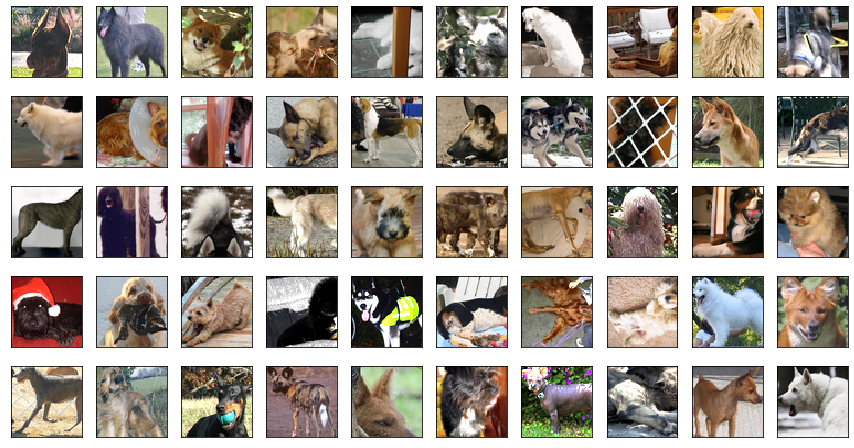

In [16]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picnames = []
randompics = []
picnum = 50

for i in range(picnum):
    filename = random.choice(notdog)
    print(filename)
    filepath = root_images + filename
    img = mpimg.imread(filepath)
    randompics.append(img)
    
    
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(randompics, axes.ravel()):
    ax.imshow(image)

['n02088364_2840.png' '430' 'False' 'False' '0.9983028' '0.0005422237']
['n02116738_10081.png' '275' 'False' 'False' '0.9999728' '4.530532e-19']
['n02090721_756.png' '386' 'False' 'False' '0.9999465' '1.664758e-09']
['n02116738_3422.png' '104' 'False' 'False' '0.99658716' '3.647651e-20']
['n02100236_2314.png' '616' 'False' 'False' '0.9966979' '3.9008154e-11']
['n02115641_12922.png' '273' 'False' 'False' '1.0' '1.41263286e-08']
['n02088094_3051.png' '286' 'False' 'False' '0.52554387' '0.00039139073']
['n02095570_6176.png' '397' 'False' 'False' '0.99993134' '3.6411914e-13']
['n02093256_8205.png' '287' 'False' 'False' '0.9978302' '2.259627e-06']
['n02105056_3394.png' '297' 'False' 'False' '0.9999999' '1.4071337e-09']
['n02116738_3692.png' '275' 'False' 'False' '1.0' '5.1688097e-19']
['n02091244_2464.png' '273' 'False' 'False' '0.9999931' '6.926293e-06']
['n02116738_431.png' '275' 'False' 'False' '1.0' '5.189561e-21']
['n02096051_3317.png' '122' 'False' 'False' '0.99950206' '0.00049801165'

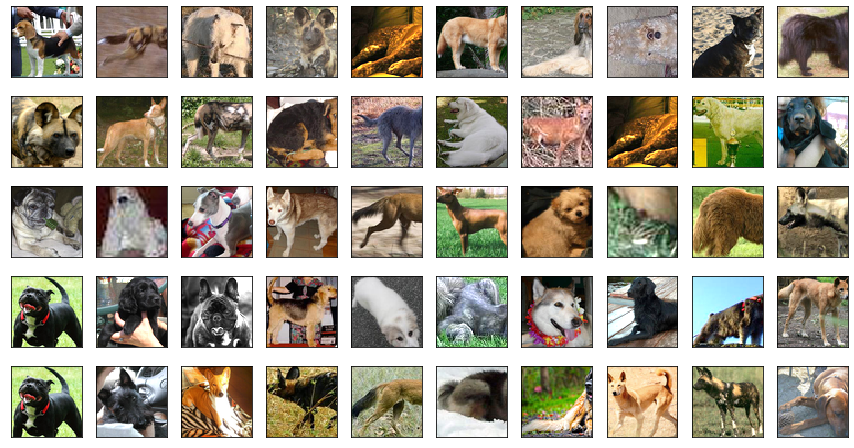

In [17]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picnames = []
randompics = []
picnum = 50

for i in range(picnum):
    filename = random.choice(notdog)
    ind = list(res[:,0]).index(filename)
    print(res[ind])

    filepath = root_images + filename
    img = mpimg.imread(filepath)
    randompics.append(img)
    
    
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(randompics, axes.ravel()):
    ax.imshow(image)

In [18]:
count = {}

for i in range(1000):
    count[i] = list(res[:,1]).count(str(i))

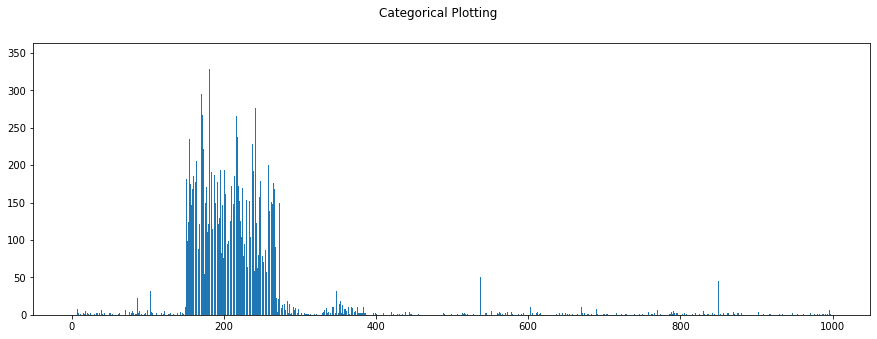

In [19]:
plt.figure(figsize=(15, 5))

plt.bar(count.keys(), count.values())
plt.suptitle('Categorical Plotting')
plt.show()

# 151~268 are dogs